# For this lab, I will start from the end of the previous lab (lab-revisiting-machine-learning). This lab, lab-feature-engineering, starts from cell #17

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('files_for_labs/learningSet.csv')
data.columns = [columns_name.lower() for columns_name in data.columns]
data.columns = [columns_name.replace(' ', '_') for columns_name in data.columns]
data.shape

(95412, 481)

In [3]:
# Dividing the DF between numerical and categorical features
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(object)
categorical

osource state    zip mailcode pvastate noexch recinhse recp3 recpgvg  \
0         GRI    IL  61081                        0                          
1         BOA    CA  91326                        0                          
2         AMH    NC  27017                        0                          
3         BRY    CA  95953                        0                          
4                FL  33176                        0        X     X           
...       ...   ...    ...      ...      ...    ...      ...   ...     ...   
95407     ASE    AK  99504                        0                          
95408     DCD    TX  77379                        0                          
95409     MBC    MI  48910                        0              X           
95410     PRV    CA  91320                        0        X                 
95411     MCC    NC  28409                        0        X             X   

      recsweep  ... rfa_21 rfa_22 rfa_23 rfa_24 rfa_2r rfa_2a mdmaud_r  \
0               ...    S4E    S4E    S4E    S4E      L      E        X   
1               ...    N1E    N1E           F1E      L      G        X   
2               ...           S4D    S4D    S3D      L      E        X   
3               ...    A1D    A1D                    L      E        X   
4               ...    A3D    I4E    A3D    A3D      L      F        X   
...        ...  ...    ...    ...    ...    ...    ...    ...      ...   
95407           ...                                  L      G        X   
95408           ...                                  L      F        X   
95409           ...    P1D    P1D                    L      E        X   
95410           ...    A1F    A1F    S2F    S3F      L      F        X   
95411           ...    S3G    S3G    S3G    S3G      L      G        C   

      mdmaud_f mdmaud_a geocode2  
0            X        X        C  
1            X        X        A  
2            X        X        C  
3            X        X        C  
4            X        X        A  
...        ...      ...      ...  
95407        X        X        C  
95408        X        X        A  
95409        X        X        B  
95410        X        X        A  
95411        1        C        C  

[95412 rows x 74 columns]

In [4]:
# Checking if there is any null values in the categorical columns
categorical.isnull().values.any()

True

In [5]:
# Checking the number of categorical columns with nulls
num_ccols_with_nan = (categorical.isna().sum() > 0).sum()
ccols_with_nan = categorical.columns[categorical.isna().sum() > 0].tolist
print('Number of categorical columns with NaN values:', num_ccols_with_nan)
print('Categorical columns with NaN values:', ccols_with_nan)

Number of categorical columns with NaN values: 1
Categorical columns with NaN values: <bound method IndexOpsMixin.tolist of Index(['geocode2'], dtype='object')>


# Since we have only one categorical column with NAN´s, I will proceed managing the nulls as the lab indicates but for the whole DF

In [6]:
# Not very helpful here...
data.isna().sum()

odatedw       0
osource       0
tcode         0
state         0
zip           0
           ... 
mdmaud_r      0
mdmaud_f      0
mdmaud_a      0
cluster2    132
geocode2    132
Length: 481, dtype: int64

In [7]:
# Checking the number of columns with nulls
num_cols_with_nan = (data.isna().sum() > 0).sum()
print('Number of columns with NaN values:', num_cols_with_nan)

Number of columns with NaN values: 92


In [8]:
# Identifying the names of the columns that have NaN values
cols_with_nan = data.columns[data.isna().sum() > 0].tolist
print('Columns with NaN values:', cols_with_nan)

Columns with NaN values: <bound method IndexOpsMixin.tolist of Index(['age', 'numchld', 'income', 'wealth1', 'mbcraft', 'mbgarden', 'mbbooks',
       'mbcolect', 'magfaml', 'magfem', 'magmale', 'pubgardn', 'pubculin',
       'pubhlth', 'pubdoity', 'pubnewfn', 'pubphoto', 'pubopp', 'wealth2',
       'msa', 'adi', 'dma', 'adate_3', 'adate_4', 'adate_5', 'adate_6',
       'adate_7', 'adate_8', 'adate_9', 'adate_10', 'adate_11', 'adate_12',
       'adate_13', 'adate_14', 'adate_15', 'adate_16', 'adate_17', 'adate_18',
       'adate_19', 'adate_20', 'adate_21', 'adate_22', 'adate_23', 'adate_24',
       'rdate_3', 'rdate_4', 'rdate_5', 'rdate_6', 'rdate_7', 'rdate_8',
       'rdate_9', 'rdate_10', 'rdate_11', 'rdate_12', 'rdate_13', 'rdate_14',
       'rdate_15', 'rdate_16', 'rdate_17', 'rdate_18', 'rdate_19', 'rdate_20',
       'rdate_21', 'rdate_22', 'rdate_23', 'rdate_24', 'ramnt_3', 'ramnt_4',
       'ramnt_5', 'ramnt_6', 'ramnt_7', 'ramnt_8', 'ramnt_9', 'ramnt_10',
       'ramnt_11', '

In [9]:
# Total sumation of all null values in the DF
data.isnull().sum().sum()

5158796

In [10]:
# Creating a new list and appending the columns indicated by the lab
drop_list = []
drop_list.extend(['osource', 'zip'])
drop_list

['osource', 'zip']

In [11]:
# Identifying columns with over 85% missing values
percent_nan = data.isna().sum() * 100 / len(data)
max_nan_df = pd.DataFrame(percent_nan[percent_nan > 85], columns = ['Percentage']).sort_values('Percentage', ascending = False)
max_nan_df

Percentage
rdate_5    99.990567
ramnt_5    99.990567
rdate_3    99.746363
ramnt_3    99.746363
rdate_4    99.705488
ramnt_4    99.705488
rdate_6    99.186685
ramnt_6    99.186685
ramnt_15   92.388798
rdate_15   92.388798
rdate_23   91.763091
ramnt_23   91.763091
rdate_20   91.732696
ramnt_20   91.732696
ramnt_7    90.677273
rdate_7    90.677273
rdate_17   90.146942
ramnt_17   90.146942
rdate_21   90.029556
ramnt_21   90.029556
rdate_10   89.035970
ramnt_10   89.035970
rdate_13   87.160944
ramnt_13   87.160944
numchld    87.018404

In [12]:
# Adding the columns with over 85% missing values to the already created list
max_nan = percent_nan[percent_nan > 85].index
drop_list.extend(max_nan)
drop_list

['osource',
 'zip',
 'numchld',
 'rdate_3',
 'rdate_4',
 'rdate_5',
 'rdate_6',
 'rdate_7',
 'rdate_10',
 'rdate_13',
 'rdate_15',
 'rdate_17',
 'rdate_20',
 'rdate_21',
 'rdate_23',
 'ramnt_3',
 'ramnt_4',
 'ramnt_5',
 'ramnt_6',
 'ramnt_7',
 'ramnt_10',
 'ramnt_13',
 'ramnt_15',
 'ramnt_17',
 'ramnt_20',
 'ramnt_21',
 'ramnt_23']

In [13]:
# Removing the columns included in the list from the DF
data.drop(columns = drop_list, axis = 1, inplace = True)
data.shape

(95412, 454)

In [14]:
data['gender'].isna().sum()

0

In [15]:
print(data['gender'].value_counts())

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: gender, dtype: int64


In [16]:
# After the previous check, we proceed to reduce the number of categories in the column 'gender': 'F', 'M' and 'Other'
data['gender'].replace(['U', 'J', 'C', 'A', ' '], 'Other', inplace = True)
print(data['gender'].value_counts())

F        51277
M        39094
Other     5041
Name: gender, dtype: int64


# lab-feature-engineering

In [17]:
# To see if for example we have a datetime column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 454 entries, odatedw to geocode2
dtypes: float64(72), int64(310), object(72)
memory usage: 330.5+ MB


In [18]:
# We have already removed columns with more than 85% of nulls. Let´s see which columns have equal or more than half of missing values
percent_nan = data.isna().sum() * 100 / len(data)
mid_nan_df = pd.DataFrame(percent_nan[percent_nan >= 50], columns = ['Percentage']).sort_values('Percentage', ascending = False)
mid_nan_df

Percentage
rdate_11   84.551209
ramnt_11   84.551209
ramnt_19   83.359535
rdate_19   83.359535
rdate_9    82.461326
ramnt_9    82.461326
rdate_24   81.409047
ramnt_24   81.409047
rdate_18   79.270951
ramnt_18   79.270951
rdate_22   78.123297
ramnt_22   78.123297
ramnt_8    77.495493
rdate_8    77.495493
ramnt_14   75.561774
rdate_14   75.561774
ramnt_12   73.064185
rdate_12   73.064185
ramnt_16   71.707961
rdate_16   71.707961
adate_15   68.625540
adate_23   58.975810
mbcolect   55.458433
magfem     55.395548
magfaml    55.395548
mbbooks    55.395548
pubculin   55.395548
magmale    55.395548
pubhlth    55.395548
pubgardn   55.395548
mbgarden   55.395548
pubopp     55.395548
pubphoto   55.395548
pubnewfn   55.395548
pubdoity   55.395548
mbcraft    55.395548
adate_20   52.613927

### The strategy that we will follow to deal with nulls is to remove all columns with 50% or more null values. Then we will deal with the missing values of the columns indicated by the lab, and for the remaining ones (24 columns) we will mention some actions that could be done with further analysis-future labs (drop, mean/median imputation, bucketing, extending one of the values of the column to the missing values, etc.).

In [19]:
# Removing the remaining columns with 50% or more null values from the DF
drop_list2 = []
mid_nan = percent_nan[percent_nan >= 50].index
drop_list2.extend(mid_nan)
data.drop(columns = drop_list2, axis = 1, inplace = True)
data.shape

(95412, 417)

In [20]:
# Let´s see which columns have less that 50% of nulls
percent_nan = data.isna().sum() * 100 / len(data)
low_nan_df = pd.DataFrame(percent_nan[(percent_nan > 0) & (percent_nan <= 50)], columns=['Percentage']).sort_values('Percentage', ascending = False)
low_nan_df

Percentage
wealth1    46.882992
wealth2    45.930281
adate_13   42.152979
adate_24   38.750891
adate_21   36.905211
adate_5    35.205215
adate_10   34.322727
adate_17   28.979583
adate_22   26.881315
adate_19   25.657150
age        24.802960
income     22.309563
adate_18   22.285457
adate_16   21.343227
adate_14   19.774242
adate_9    11.785729
adate_11   10.923154
nextdate   10.452564
timelag    10.452564
adate_12    9.352073
adate_7     9.300717
adate_6     3.728043
adate_8     3.679831
adate_4     2.296357
adate_3     2.043768
dma         0.138347
adi         0.138347
msa         0.138347
cluster2    0.138347
geocode2    0.138347

## Within this final group of features with null values we have geocode2, wealth1, adi, dma and msa, the columns mentioned in the lab

#### geocode2 - County Size Code. Since we already have geographical info (e.g., state and geocode), maybe we could drop the column, however, as displayed just below, its value counts show values A, B, C, and D, so perhaps we could replace nulls with a letter E. But, as we don't know the location of those people, and the code associated to it, we will fill those nulls with 'Undetermined'.

In [21]:
data['geocode2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: geocode2, dtype: int64

In [22]:
data['geocode2'].replace([' '], 'Undetermined', inplace = True)
data['geocode2'].fillna('Undetermined', inplace=True)
print(data['geocode2'].value_counts())

A               34484
B               28505
D               16580
C               15524
Undetermined      319
Name: geocode2, dtype: int64


#### wealth1 - Wealth Rating. Since we do not have outliers (see boxplot below) we could maybe replace null values with the mean of the column. Nevertheless, since we will also see below, wealth1 and wealth2 columns -that according to the documentation are the same, and look the same seeing their .value_counts()- are extremely correlated. So, we will drop one of them, specifically wealth1, since it has more null values than wealth2 as we saw in the percentages above, we will keep wealth 2 and replace nulls with the median of the column because, even though it does not present outliers, the distribution does not follow the pattern of a normal one (also see below), and median imputation is more robust statistically sepaking than mean imputation.

In [23]:
data['wealth1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: wealth1, dtype: int64

In [24]:
data['wealth2'].value_counts()

9.0    6523
8.0    5975
7.0    5684
6.0    5497
5.0    5351
4.0    5074
3.0    5046
2.0    4971
1.0    4191
0.0    3277
Name: wealth2, dtype: int64

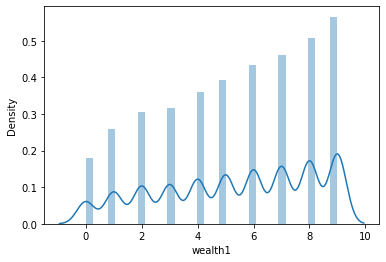

In [25]:
sns.distplot(data['wealth1'])
plt.show()

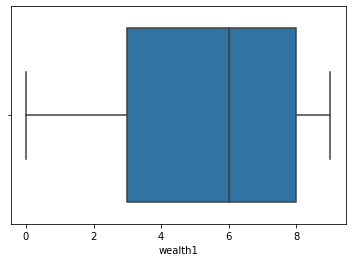

In [26]:
sns.boxplot(data['wealth1'])
plt.show()

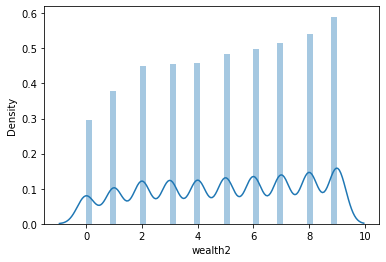

In [27]:
sns.distplot(data['wealth2'])
plt.show()

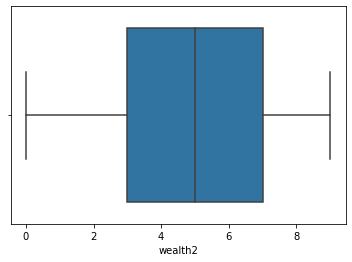

In [28]:
sns.boxplot(data['wealth2'])
plt.show()

In [29]:
# Wealth correlation
wealth_correlation = data['wealth1'].corr(data['wealth1'])
wealth_correlation

0.9999999999999999

In [30]:
# Dropping wealth1 column and replacing nulls in wealth1 column with the median
data.drop(['wealth1'], axis = 1, inplace = True)
data['wealth2'].fillna(np.median, inplace=True)

#### dma column - DMA Code. 
A Designated Market Area (often referred to as DMA) is an advertising term that stands for different regions in the United States divided into separate marketing areas. There are 210 distinct regions and each Designated Market Area has a 3-digit numeric code. Since it is a numerical column (float) and we already have geographical info (categoricals: state, geocode, and geocode2 -the latter for which we are replacing nulls with 'Other'), we will drop the column. With more time for this lab, we could try to infer the DMA from the other geographical information we have, and try to fill nulls with the corresponding DMA code, but the time is limited and we have to be pragmatic. 

#### adi column - ADI Code. 
Area Deprivation Index (ADI), it allows for rankings of neighborhoods by socioeconomic disadvantage in a region of interest (e.g. at the state or national level). It includes factors for the theoretical domains of income, education, employment, and housing quality. Since it is a numerical column (float) and we already have geographical info (categoricals: state, geocode, and geocode2 -the latter for which we are replacing nulls with 'Other'), we will drop the column. With more time for this lab, we could try to infer the ADI from the other geographical information we have, and try to fill nulls with the corresponding ADI code, but the time is limited and we have to be pragmatic.

#### msa column - MSA Code. 
A metropolitan statistical area (MSA) is determined by the U.S. Office of Management and Budget (OMB) as a location with at least one urbanized area and at least 50,000 people. MSAs are typically cities and their linked surrounding areas. Since it is a numerical column (float) and we already have geographical info (categoricals: state, geocode, and geocode2 -the latter for which we are replacing nulls with 'Other'), we will drop the column. With more time for this lab, we could try to infer the MSA from the other geographical information we have, and try to fill nulls with the corresponding MSA code, but the time is limited and we have to be pragmatic.

In [66]:
# Removing dma, adi, and msa columns
data.drop(['dma', 'adi', 'msa'], axis = 1, inplace = True)

#### We would still have null values in the columns:

adate_# (#: 13, 24, 21, 5, 10, 17, 22, 19, 18, 16, 14, 9, 11, 7, 6, 8, 4, 3, 12). They all refer to a date some previous promotion was send. For this group of columns, in a further analysis, we could assess the relevancy of them by assessing the redundacy of the columns (they all seem to provide the same information), and perhaps we could drop the ones with a higher percetange of nulls and leave one or few with lower percentage of null values. If we decided to keep one or more of them, the appropiate tranformations should be donde since now they present a dtype of float. Further analysis and assessment is needed.

age - The approach could be replacing by the median, as we have outliers (people < 10 years old), or first removing the outliers and then filling with the mean or median. We would have to keep in mind that other columns also show age information. Further analysis and assessment is needed.

income - All columns with ic at the beginning -ic#- are also data related with the income. The values must be points in a raking, due to being floats with only one digit after the decimal point. There are no outliers, but being related with income, seems more appropiated to replace nulls with the median that is a more robust statistically speaking, however, we couls also consider the possibiltiy of being households that did not have any income in the moment of data collecation. Further analysis and assessment is needed.

nextdate - Date of second gift. Perhaps we could assume that they didi not donate anything in second instance, and that is why is empty. Further analysis and assessment is needed.

timelag - Number of months between first and second gift. Maybe we could assume that they don´t donated anything the second time, and that is why is empty. Further analysis and assessment is needed.

cluster2 - Classic Cluster Code. The documentation says it is a nominal symbolic field. Further analysis and assessment is needed, but seems reasonable that we could drop it snce we already have cluster information from other column.

# Some more EDA

In [70]:
data.describe()

odatedw         tcode           dob           age        income  \
count  95412.000000  95412.000000  95412.000000  71747.000000  74126.000000   
mean    9141.363256     54.223117   2723.602933     61.611649      3.886248   
std      343.454752    953.844476   2132.241295     16.664199      1.854960   
min     8306.000000      0.000000      0.000000      1.000000      1.000000   
25%     8801.000000      0.000000    201.000000     48.000000      2.000000   
50%     9201.000000      1.000000   2610.000000     62.000000      4.000000   
75%     9501.000000      2.000000   4601.000000     75.000000      5.000000   
max     9701.000000  72002.000000   9710.000000     98.000000      7.000000   

                hit      malemili       malevet      vietvets      wwiivets  \
count  95412.000000  95412.000000  95412.000000  95412.000000  95412.000000   
mean       3.321438      1.048443     30.445332     29.702312     32.637719   
std        9.306899      5.065522     11.470554     15.097752     17.709065   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000     24.000000     20.000000     21.000000   
50%        0.000000      0.000000     31.000000     29.000000     32.000000   
75%        3.000000      0.000000     37.000000     39.000000     43.000000   
max      241.000000     99.000000     99.000000     99.000000     99.000000   

       ...      fistdate      nextdate       timelag       avggift  \
count  ...  95412.000000  85439.000000  85439.000000  95412.000000   
mean   ...   9135.651648   9151.022917      8.093739     13.347786   
std    ...    320.394019    294.257260      8.213242     10.769997   
min    ...      0.000000   7211.000000      0.000000      1.285714   
25%    ...   8810.000000   8903.000000      4.000000      8.384615   
50%    ...   9201.000000   9204.000000      6.000000     11.636364   
75%    ...   9409.000000   9409.000000     11.000000     15.477955   
max    ...   9603.000000   9702.000000   1088.000000   1000.000000   

            controln      target_b      target_d      hphone_d        rfa_2f  \
count   95412.000000  95412.000000  95412.000000  95412.000000  95412.000000   
mean    95778.176959      0.050759      0.793073      0.500618      1.910053   
std     55284.596094      0.219506      4.429725      0.500002      1.072749   
min         1.000000      0.000000      0.000000      0.000000      1.000000   
25%     47910.750000      0.000000      0.000000      0.000000      1.000000   
50%     95681.500000      0.000000      0.000000      1.000000      2.000000   
75%    143643.500000      0.000000      0.000000      1.000000      3.000000   
max    191779.000000      1.000000    200.000000      1.000000      4.000000   

           cluster2  
count  95280.000000  
mean      31.533711  
std       18.764614  
min        1.000000  
25%       15.000000  
50%       32.000000  
75%       49.000000  
max       62.000000  

[8 rows x 340 columns]

In [72]:
data.corr()

odatedw     tcode       dob       age    income       hit  \
odatedw   1.000000 -0.033214  0.099450 -0.309158  0.092271 -0.070752   
tcode    -0.033214  1.000000 -0.003527  0.011079 -0.005683 -0.002897   
dob       0.099450 -0.003527  1.000000 -0.999753  0.237440  0.023451   
age      -0.309158  0.011079 -0.999753  1.000000 -0.250397  0.124108   
income    0.092271 -0.005683  0.237440 -0.250397  1.000000  0.004738   
...            ...       ...       ...       ...       ...       ...   
target_b -0.032270  0.004941 -0.001703  0.009080  0.018688  0.006189   
target_d -0.006948  0.000158  0.002754  0.002282  0.032063  0.006648   
hphone_d -0.073435 -0.002025  0.076916  0.096668 -0.029094  0.213498   
rfa_2f   -0.065082  0.007835 -0.048517  0.058292 -0.079972 -0.000448   
cluster2 -0.060178  0.001131 -0.089878  0.057309 -0.375648 -0.053954   

          malemili   malevet  vietvets  wwiivets  ...  fistdate  nextdate  \
odatedw   0.037460 -0.038878  0.048536 -0.064767  ...  0.976866  0.967057   
tcode     0.004019 -0.003282 -0.007315  0.003068  ... -0.033189 -0.028885   
dob       0.008864  0.001605  0.127696 -0.089894  ...  0.098443  0.117962   
age      -0.056335  0.099326 -0.163264  0.197312  ... -0.307190 -0.307045   
income   -0.002653  0.007642  0.101555 -0.078939  ...  0.091900  0.095260   
...            ...       ...       ...       ...  ...       ...       ...   
target_b -0.002306  0.006108 -0.005570  0.006866  ... -0.032701 -0.025660   
target_d -0.002534  0.001622 -0.004208  0.002494  ... -0.007532 -0.004295   
hphone_d -0.009240  0.087242  0.022459  0.047928  ... -0.071569 -0.064820   
rfa_2f   -0.000755  0.006826 -0.010698  0.005740  ... -0.068630  0.044171   
cluster2 -0.001714 -0.026287 -0.087370  0.072913  ... -0.060073 -0.060201   

           timelag   avggift  controln  target_b  target_d  hphone_d  \
odatedw  -0.087904  0.216869  0.079036 -0.032270 -0.006948 -0.073435   
tcode     0.004964 -0.005778 -0.001920  0.004941  0.000158 -0.002025   
dob       0.020849  0.020828 -0.023648 -0.001703  0.002754  0.076916   
age      -0.009806 -0.089998 -0.029013  0.009080  0.002282  0.096668   
income    0.025956  0.114931  0.066211  0.018688  0.032063 -0.029094   
...            ...       ...       ...       ...       ...       ...   
target_b -0.010628 -0.032444  0.013165  1.000000  0.774232 -0.002626   
target_d  0.003612  0.044299  0.013366  0.774232  1.000000 -0.002432   
hphone_d  0.008872 -0.044323 -0.108747 -0.002626 -0.002432  1.000000   
rfa_2f   -0.132972 -0.277168 -0.016545  0.072311  0.000905  0.007607   
cluster2 -0.015929 -0.077253 -0.143371 -0.016400 -0.029087 -0.018316   

            rfa_2f  cluster2  
odatedw  -0.065082 -0.060178  
tcode     0.007835  0.001131  
dob      -0.048517 -0.089878  
age       0.058292  0.057309  
income   -0.079972 -0.375648  
...            ...       ...  
target_b  0.072311 -0.016400  
target_d  0.000905 -0.029087  
hphone_d  0.007607 -0.018316  
rfa_2f    1.000000  0.043062  
cluster2  0.043062  1.000000  

[340 rows x 340 columns]

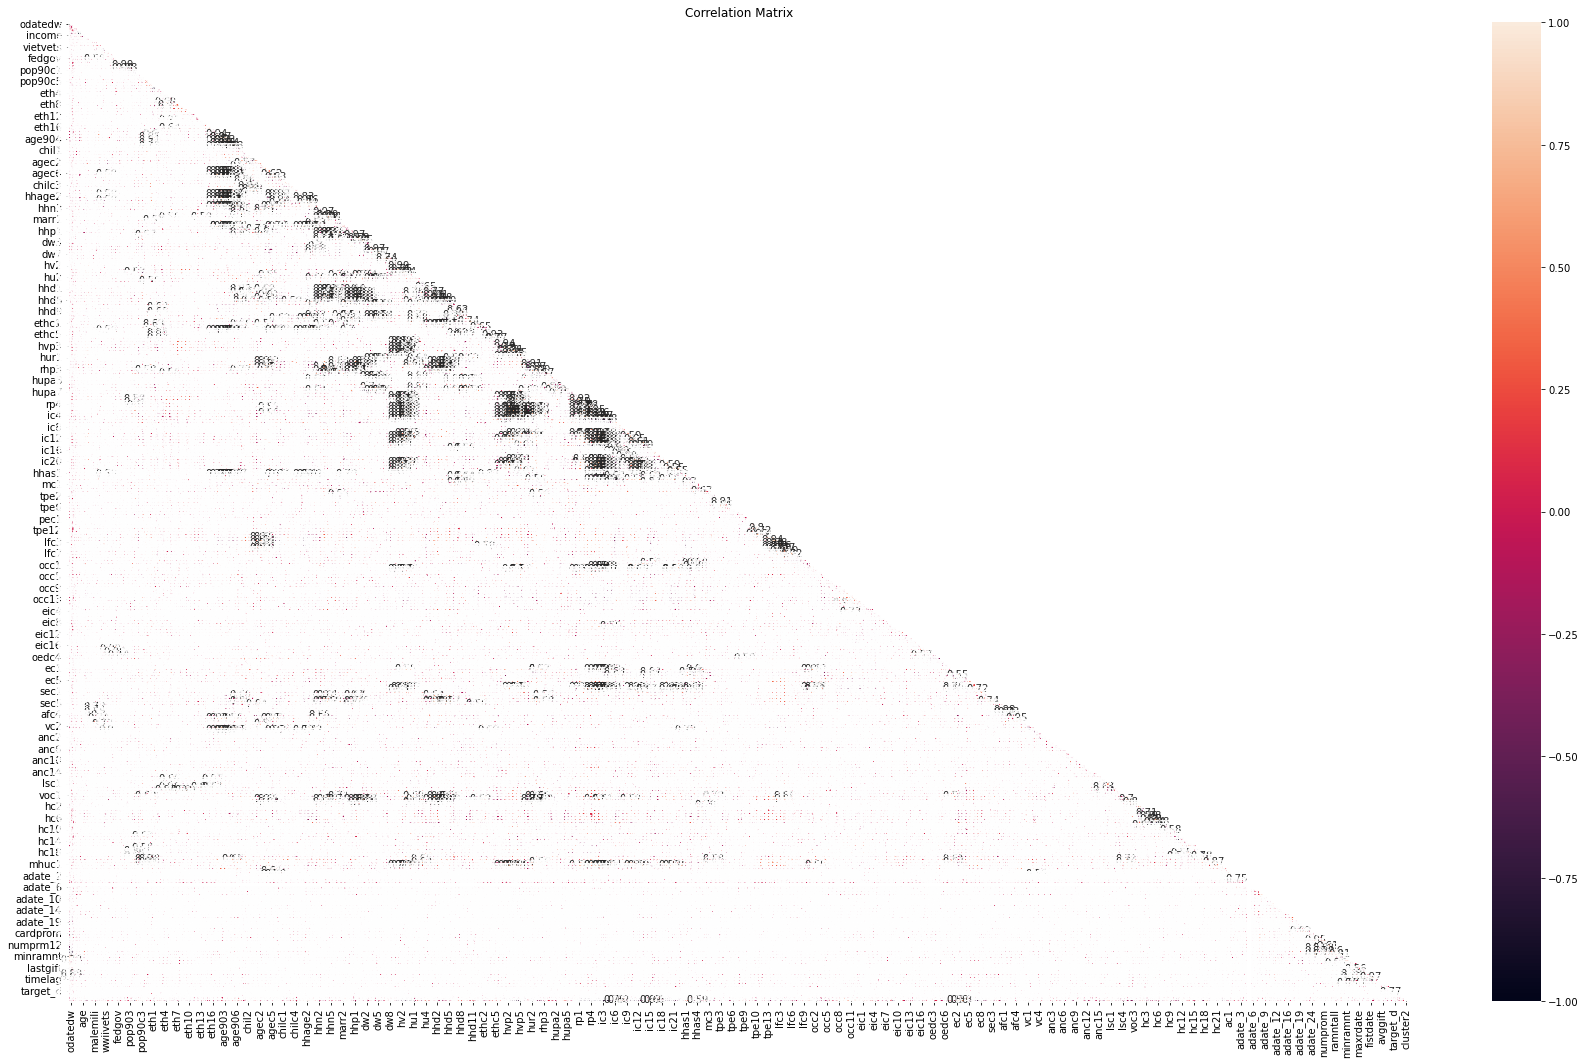

In [77]:
plt.figure(figsize=(30,18))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

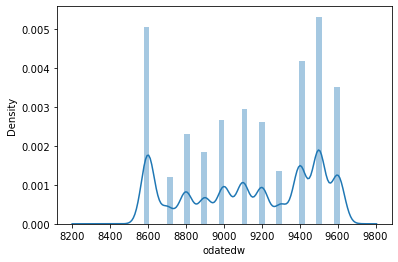

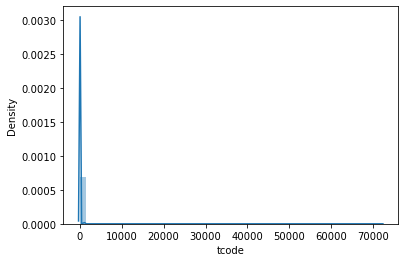

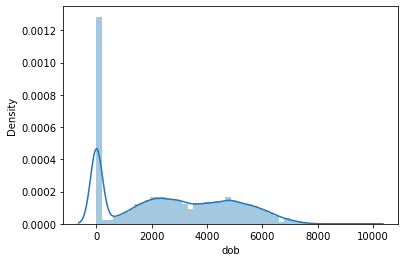

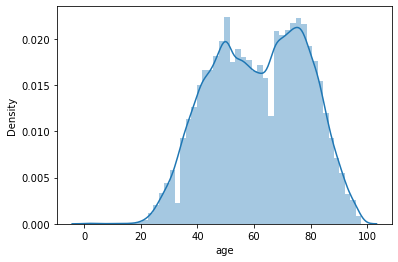

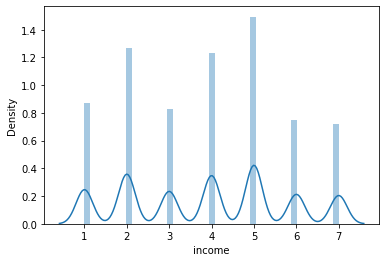

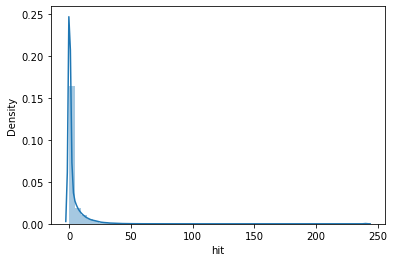

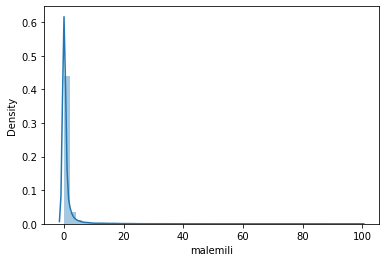

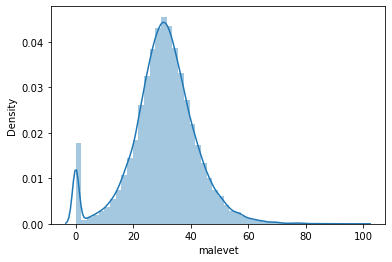

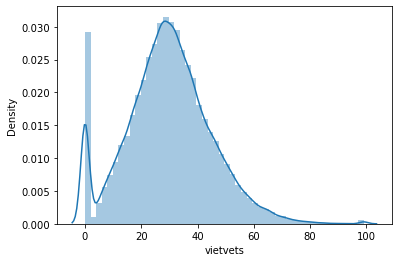

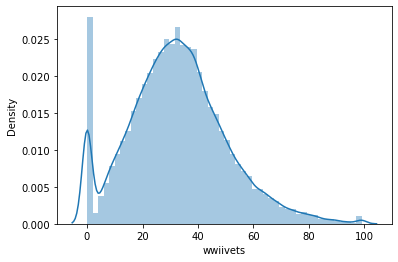

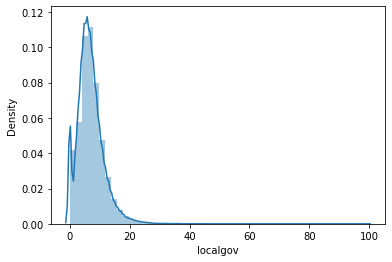

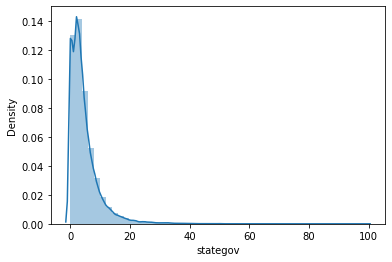

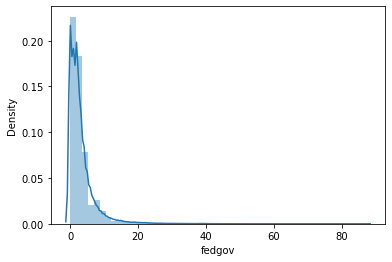

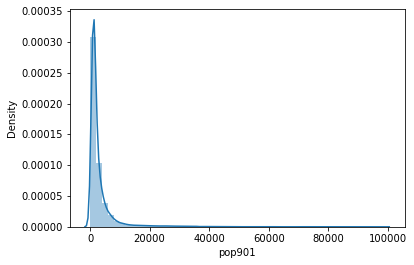

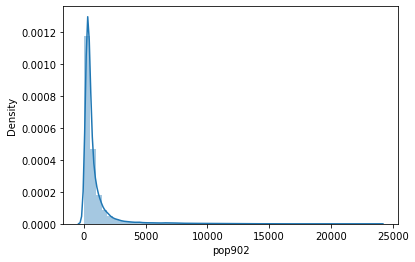

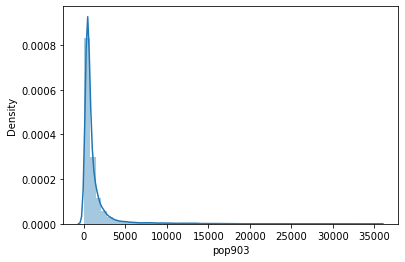

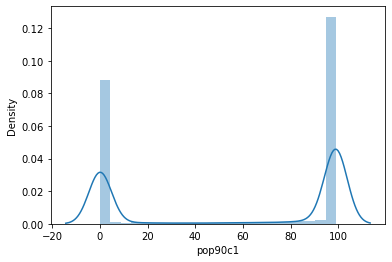

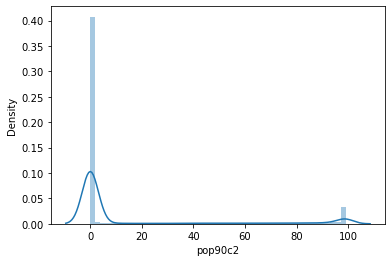

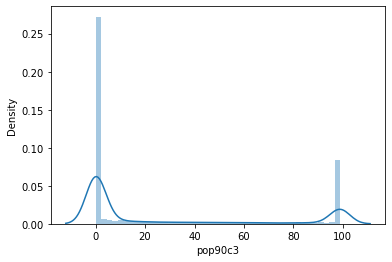

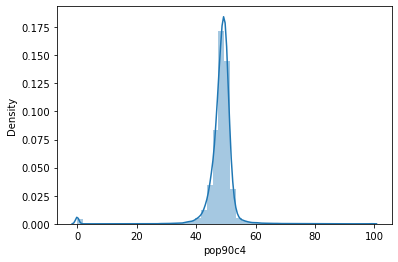

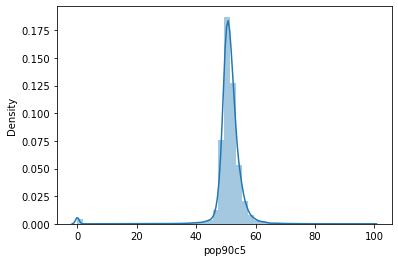

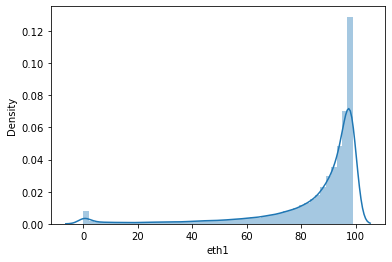

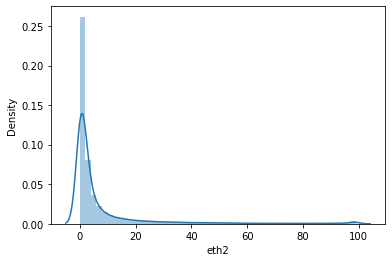

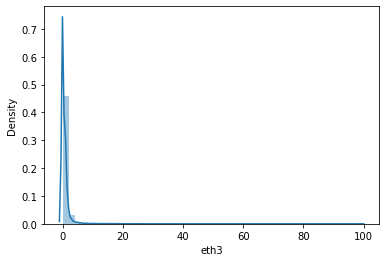

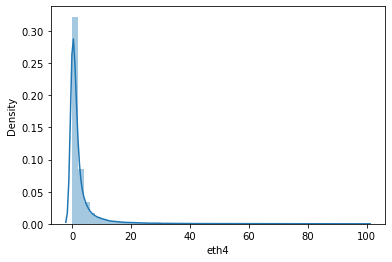

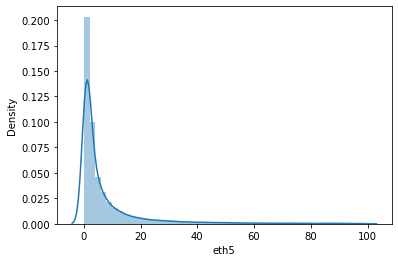

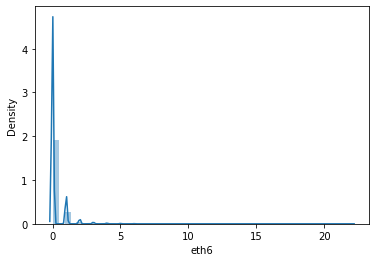

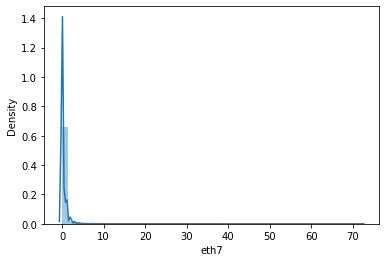

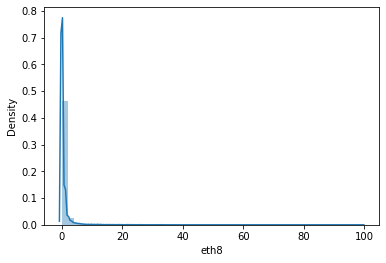

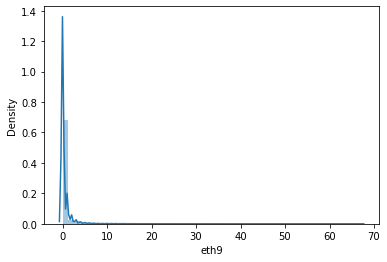

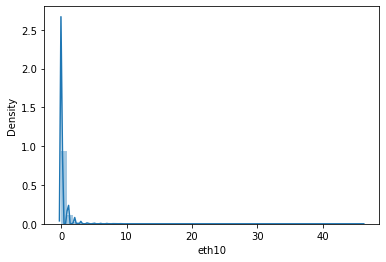

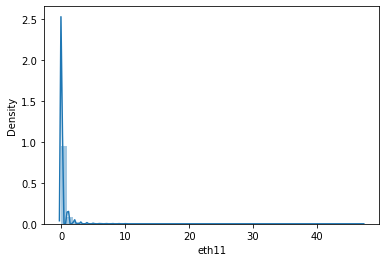

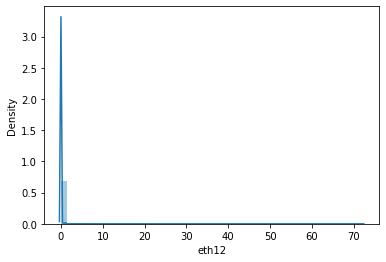

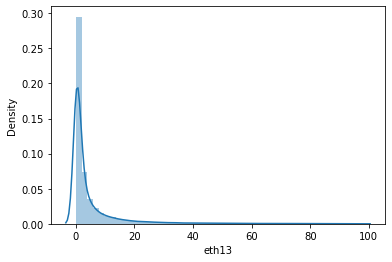

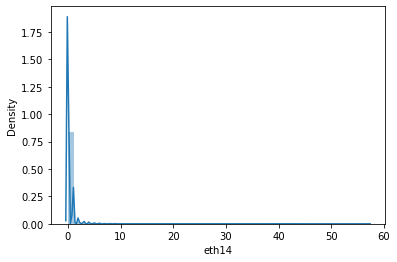

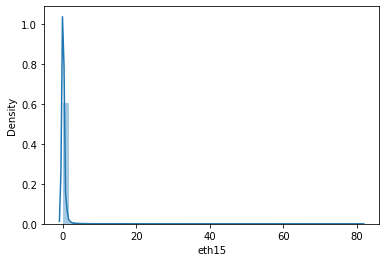

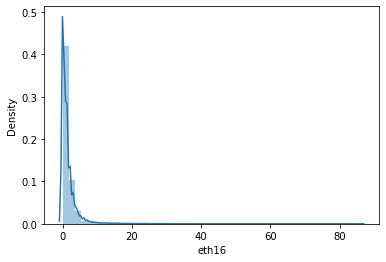

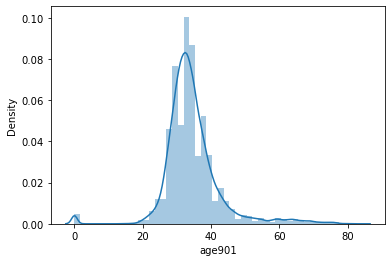

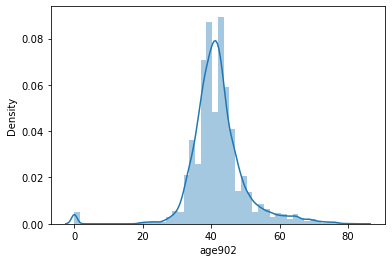

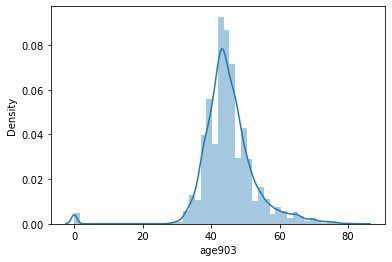

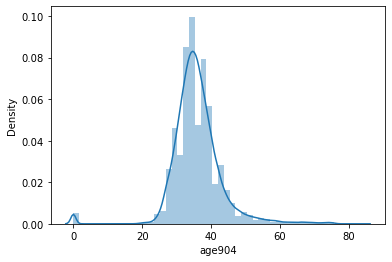

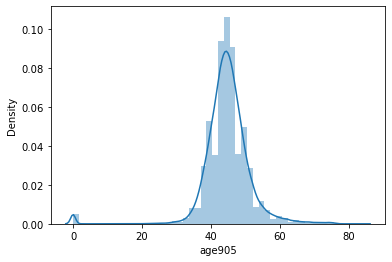

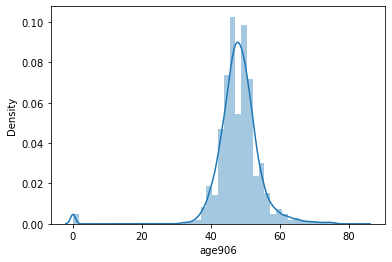

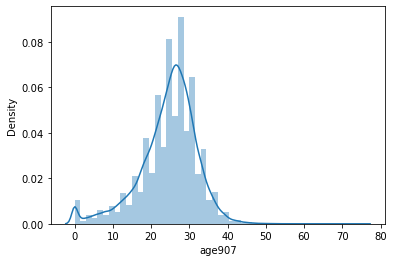

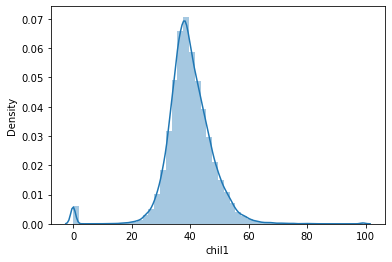

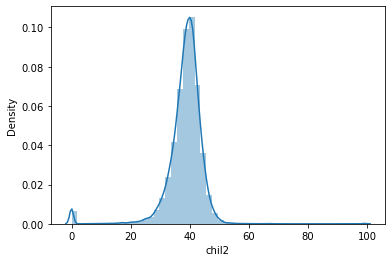

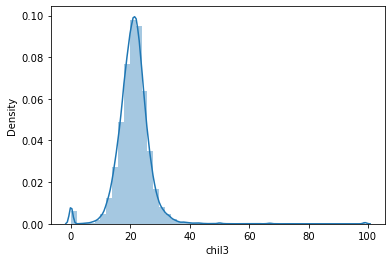

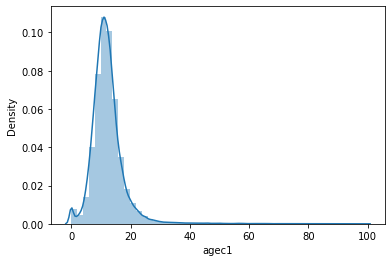

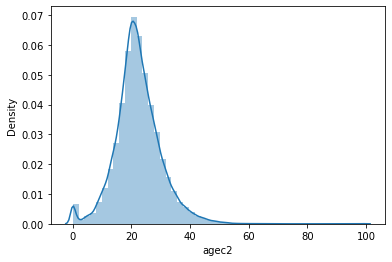

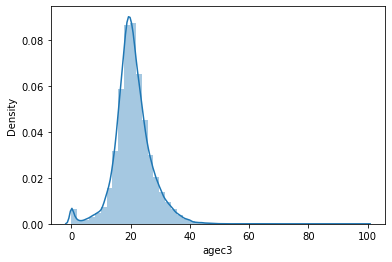

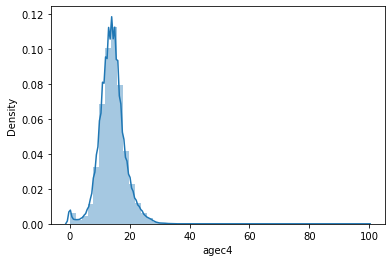

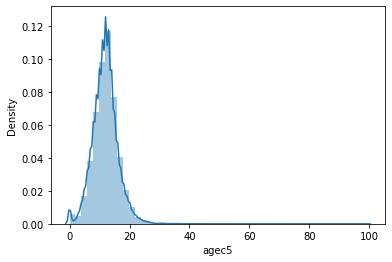

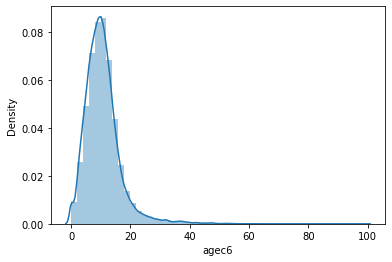

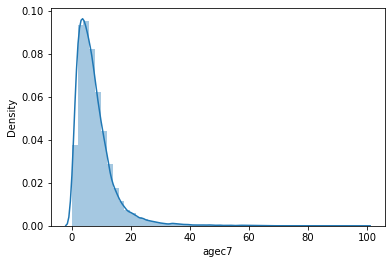

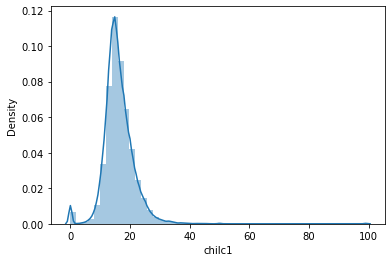

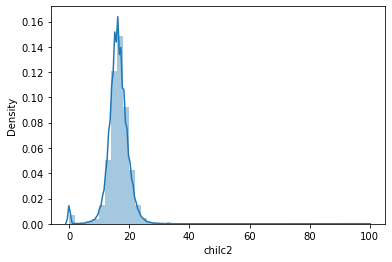

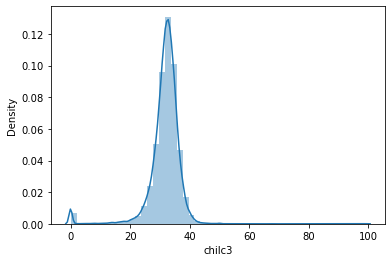

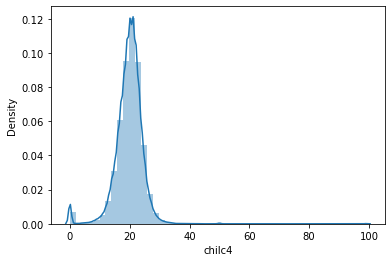

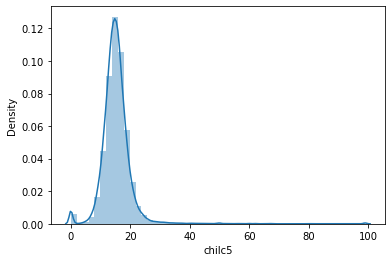

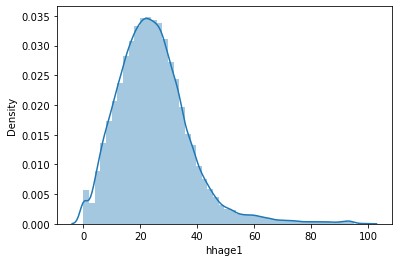

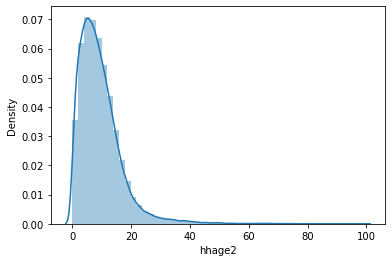

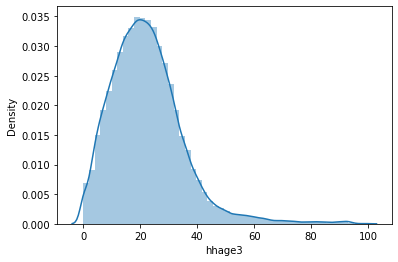

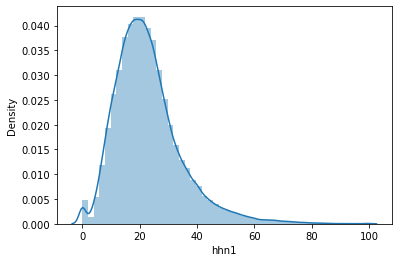

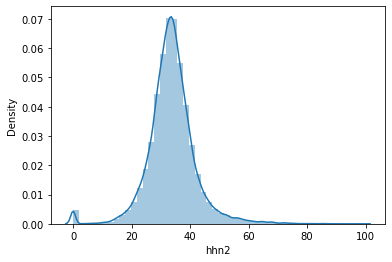

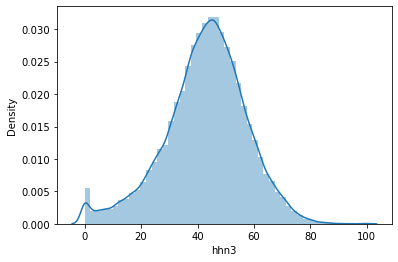

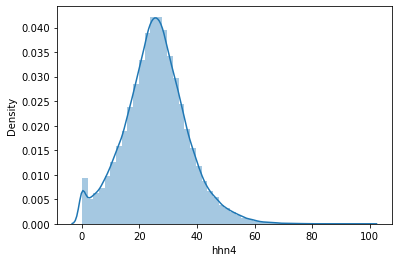

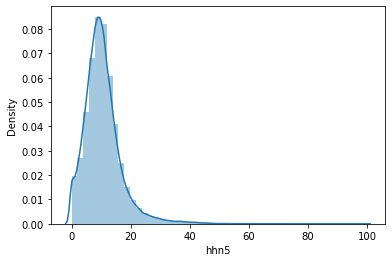

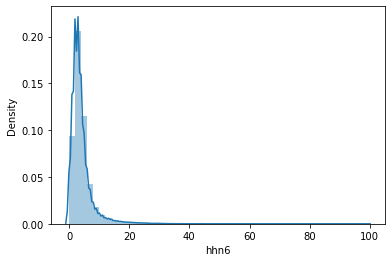

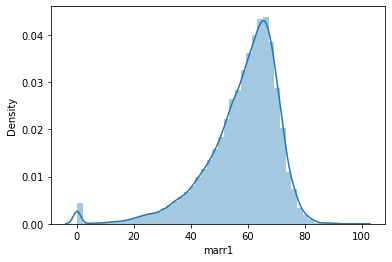

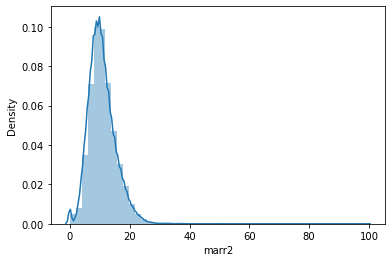

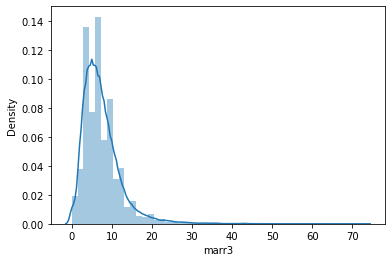

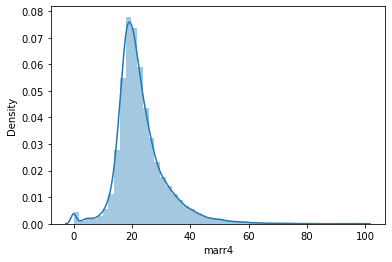

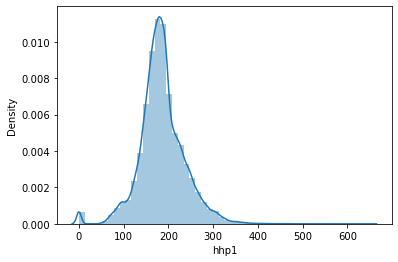

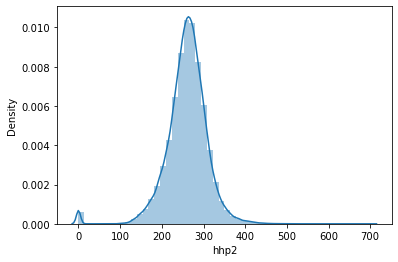

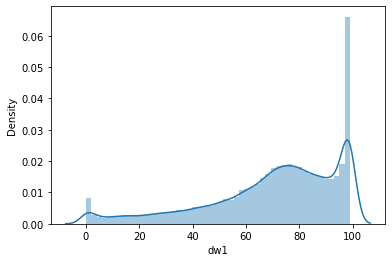

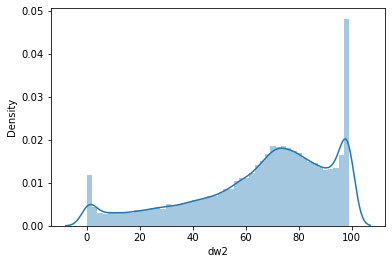

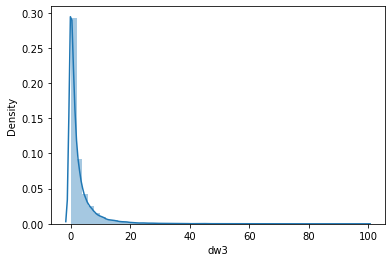

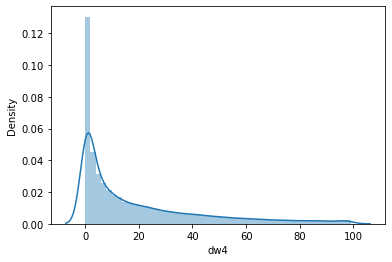

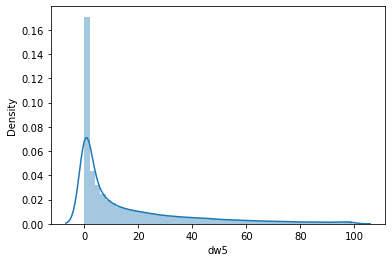

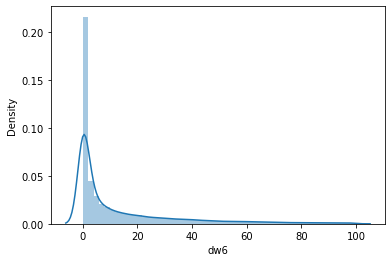

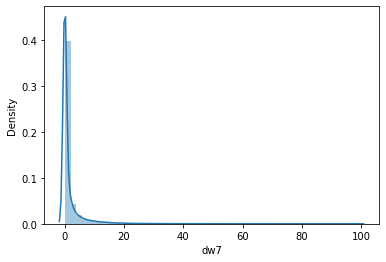

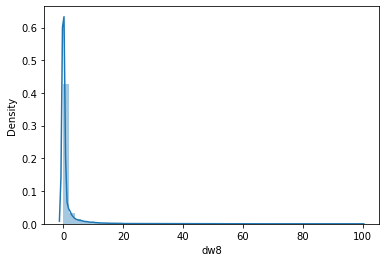

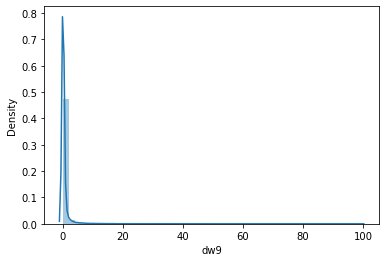

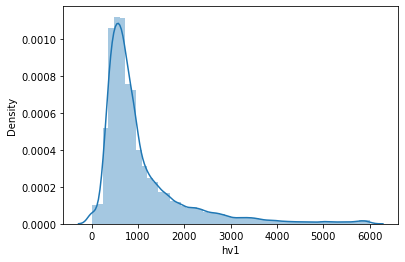

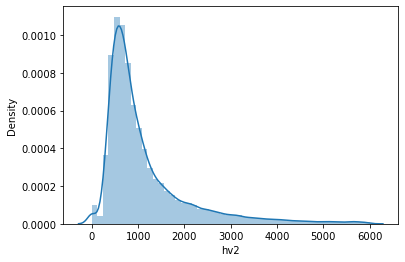

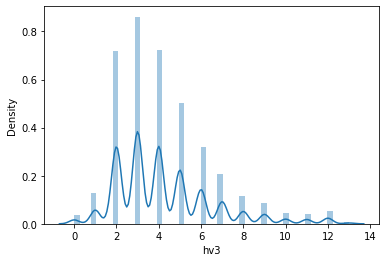

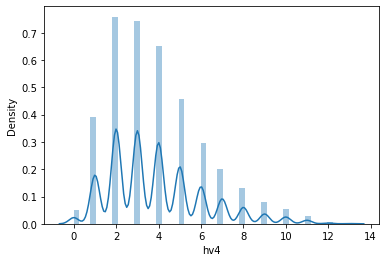

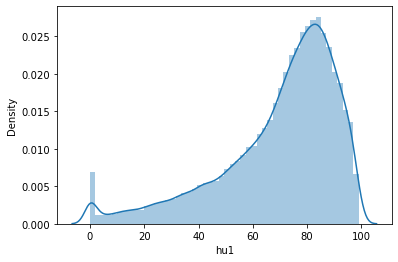

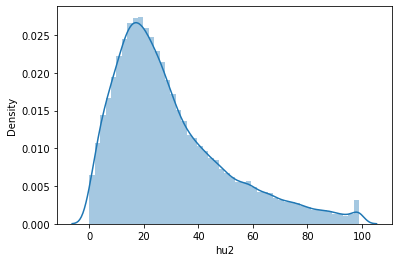

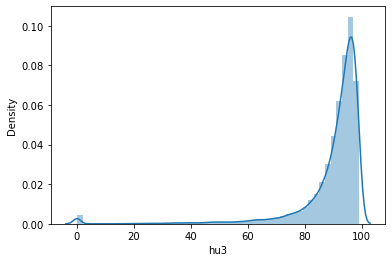

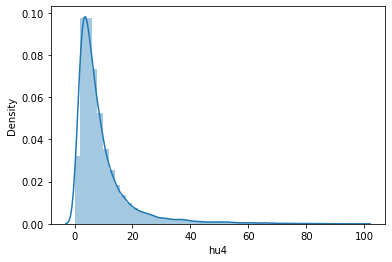

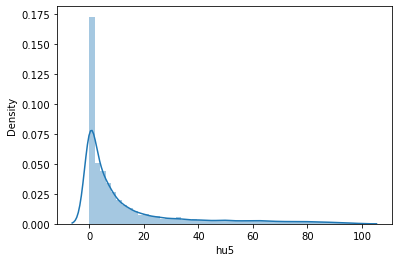

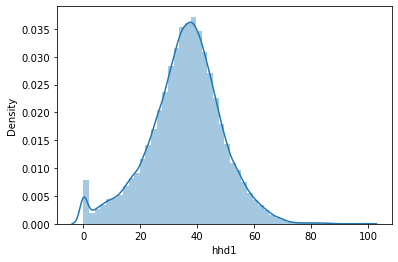

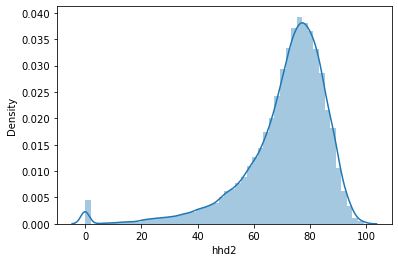

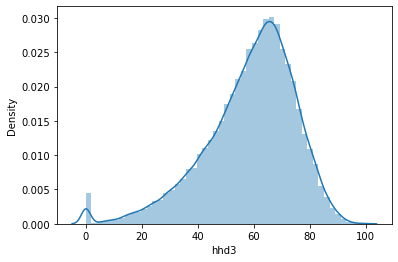

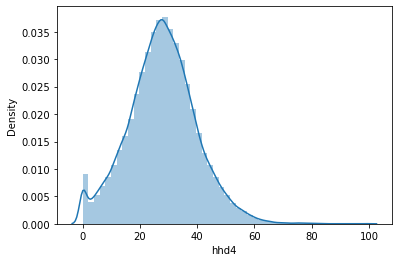

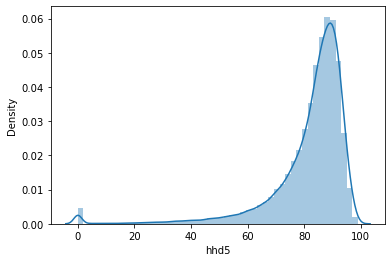

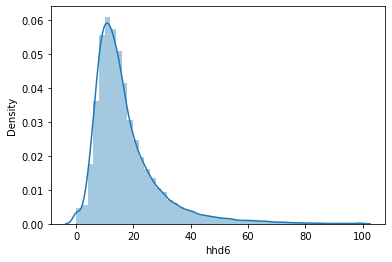

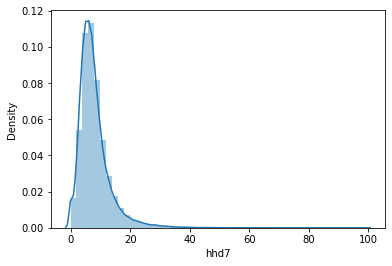

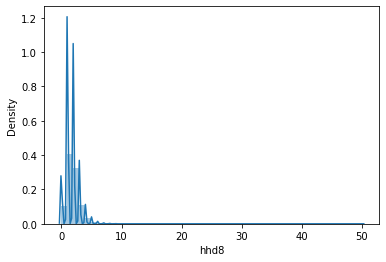

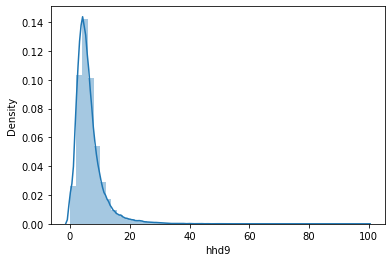

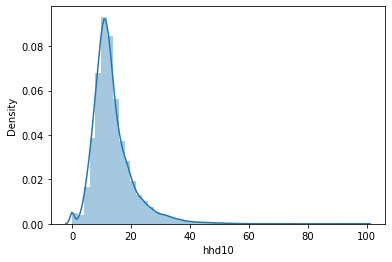

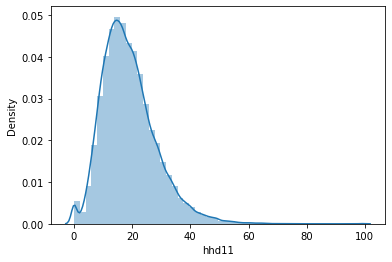

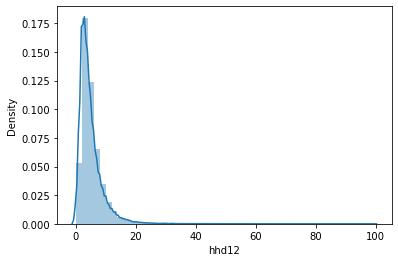

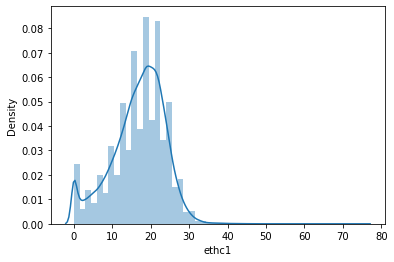

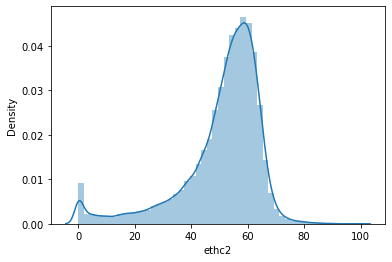

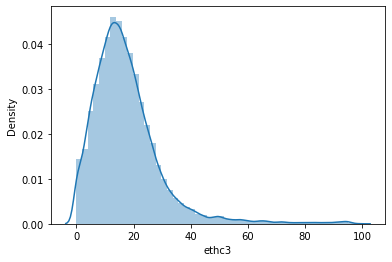

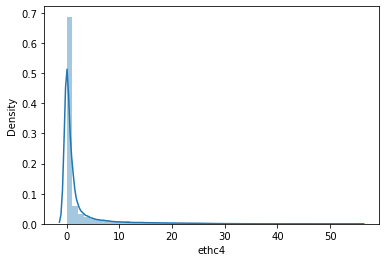

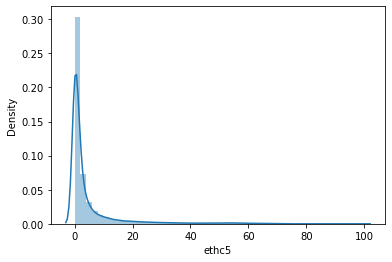

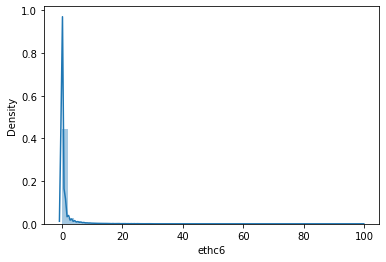

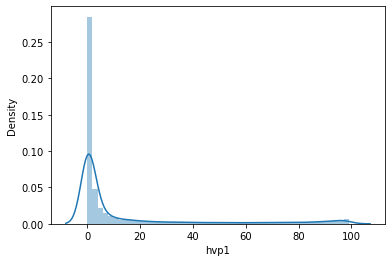

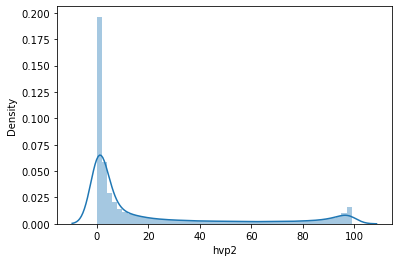

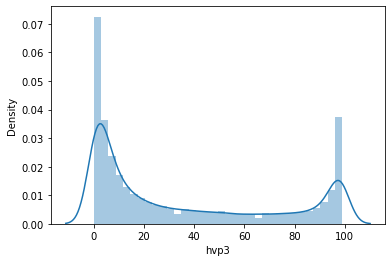

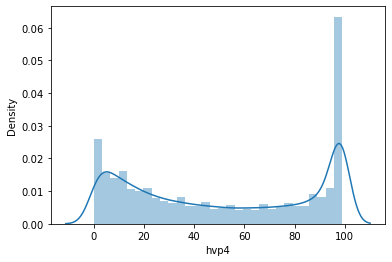

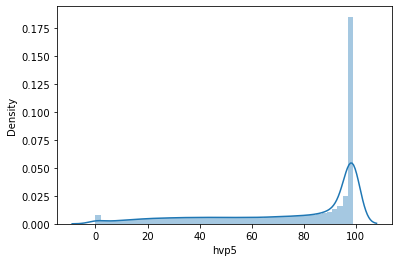

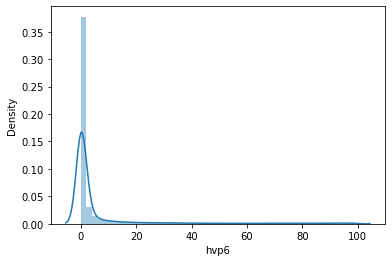

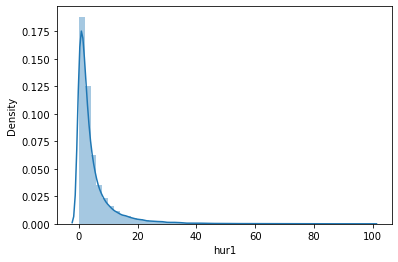

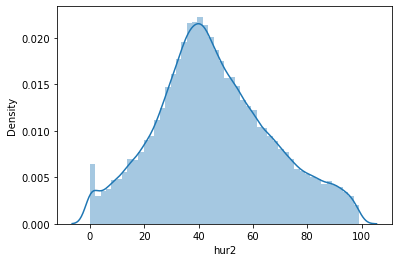

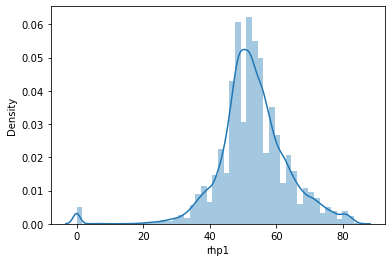

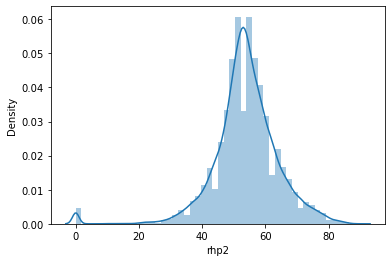

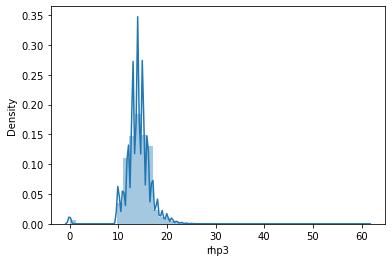

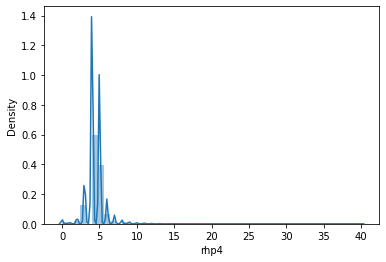

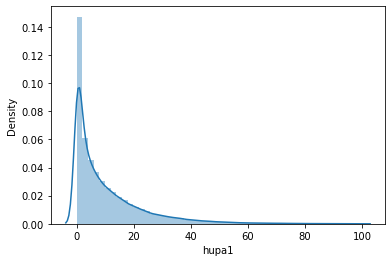

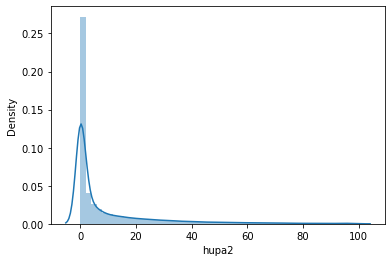

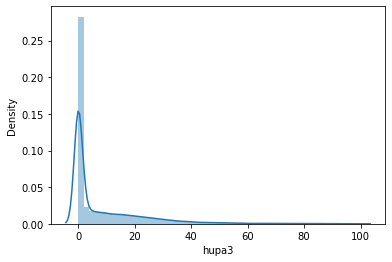

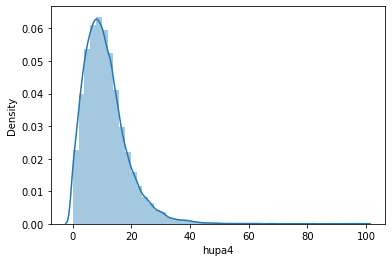

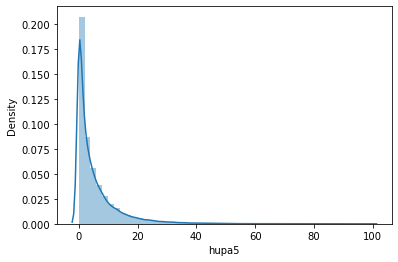

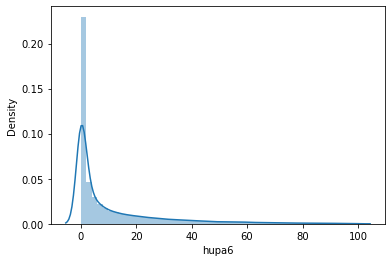

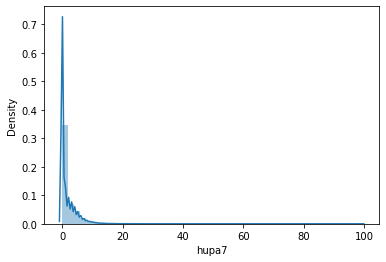

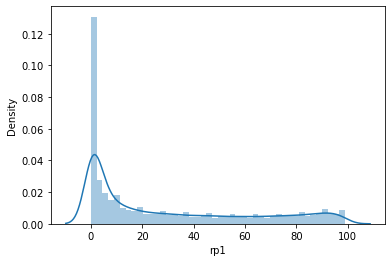

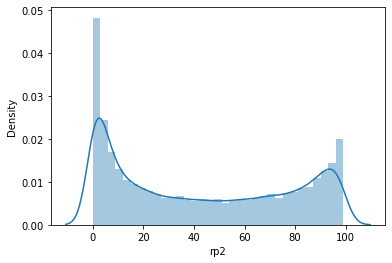

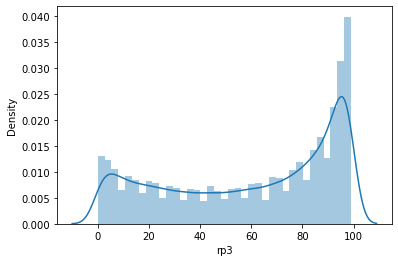

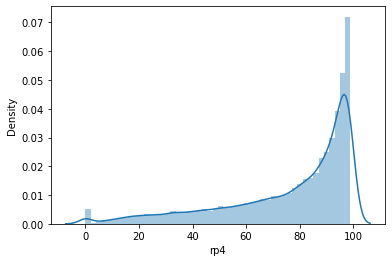

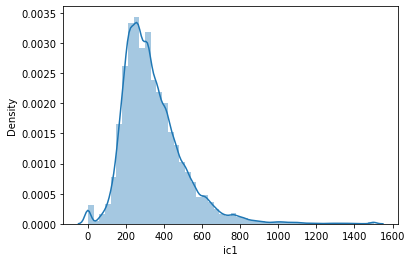

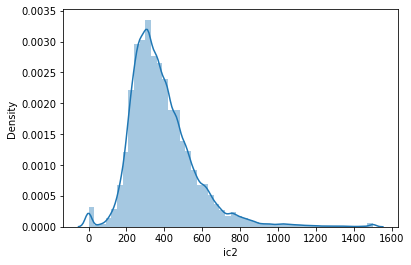

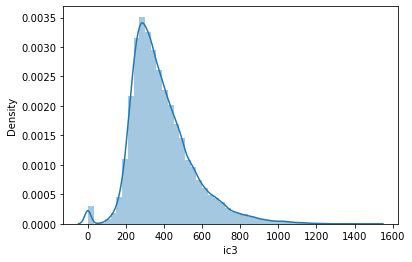

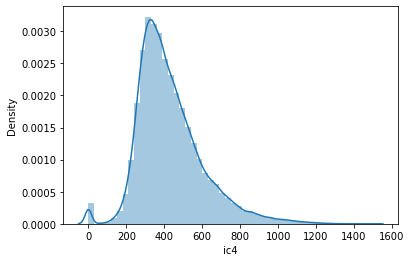

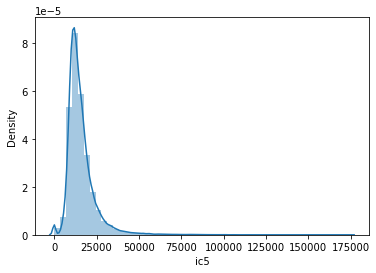

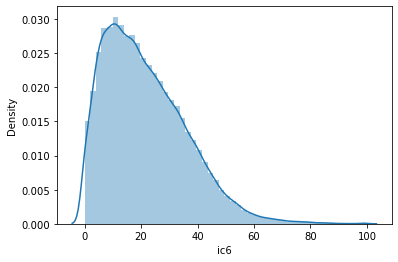

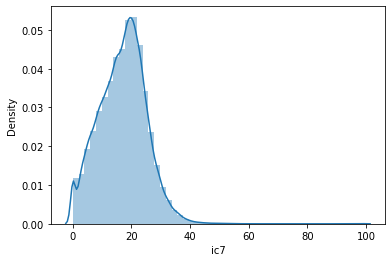

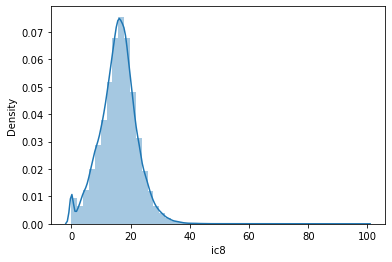

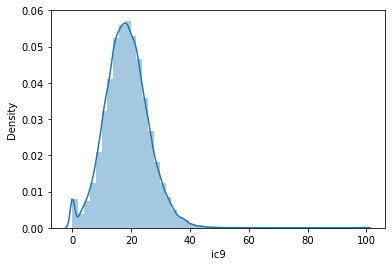

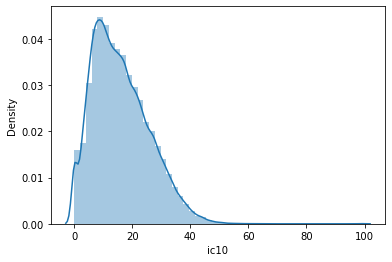

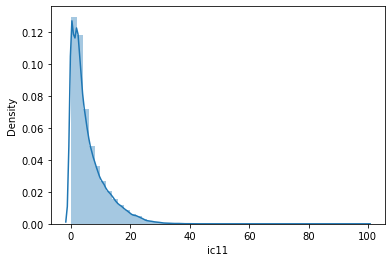

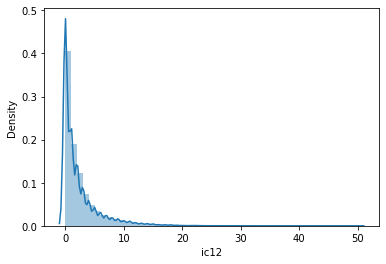

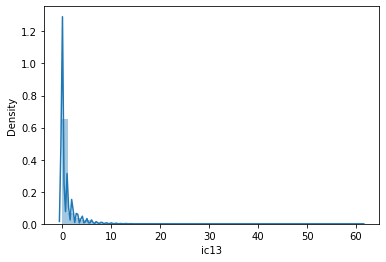

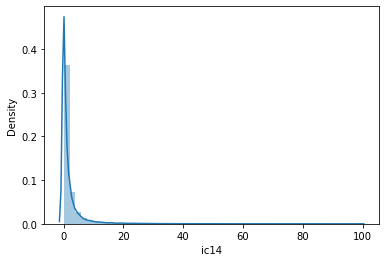

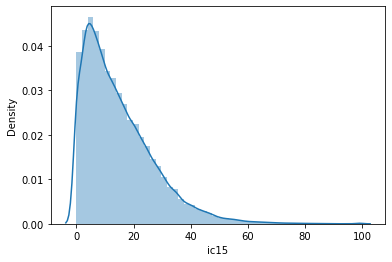

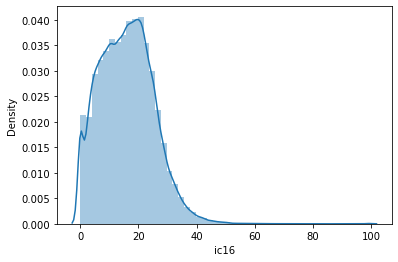

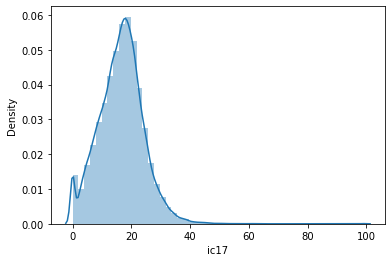

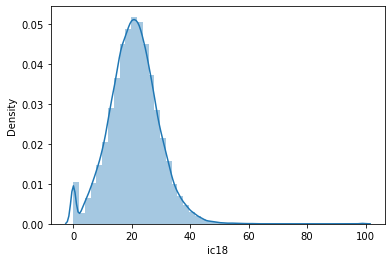

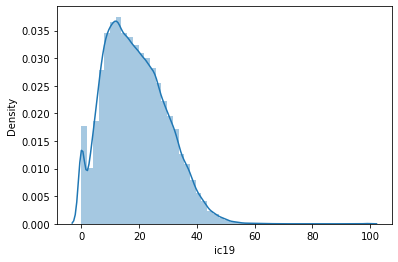

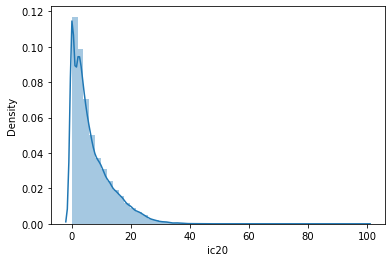

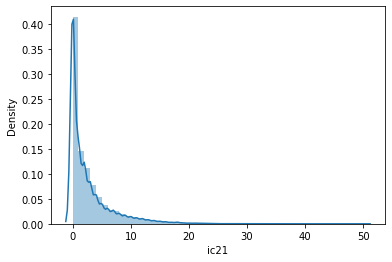

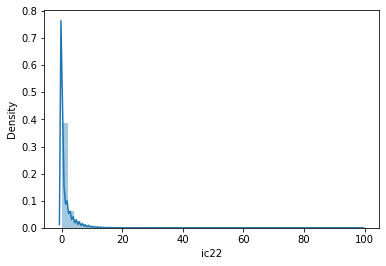

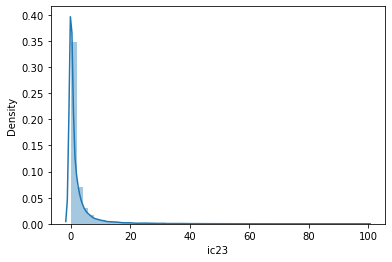

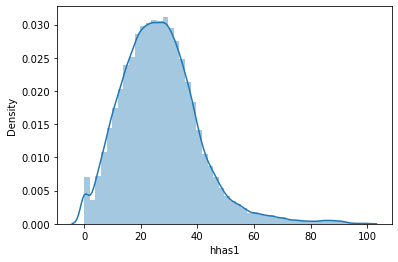

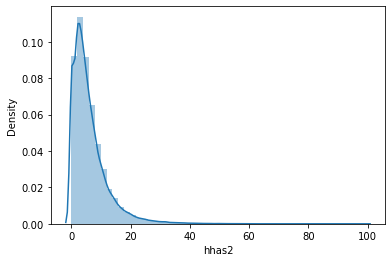

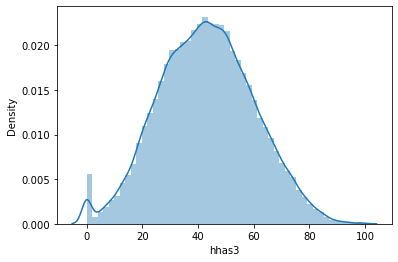

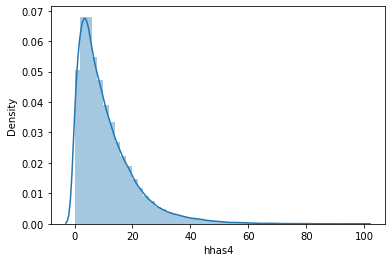

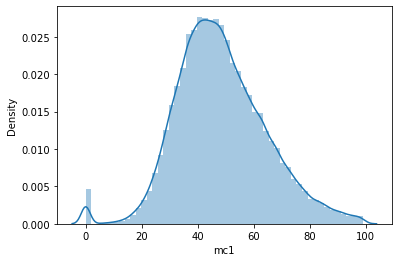

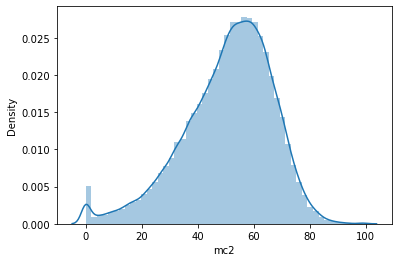

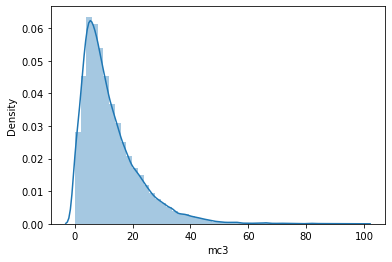

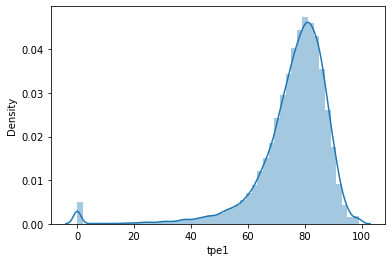

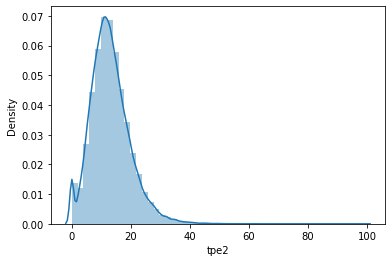

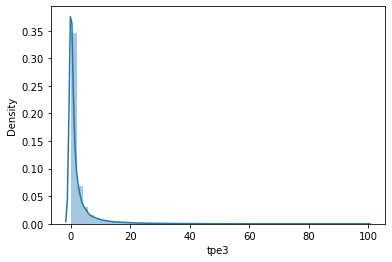

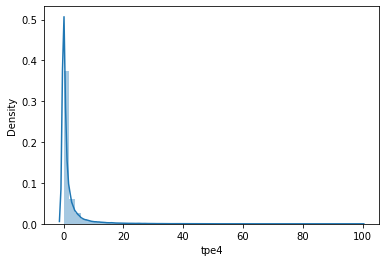

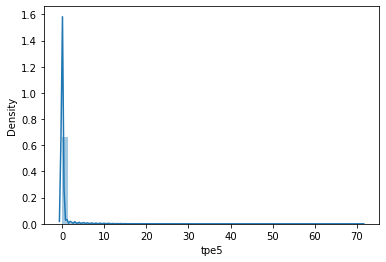

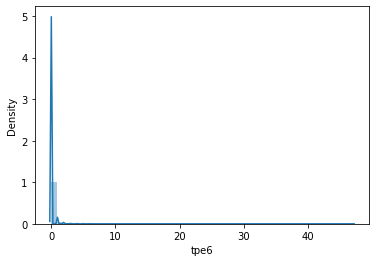

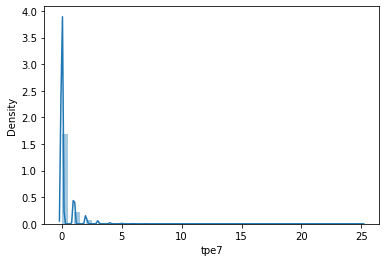

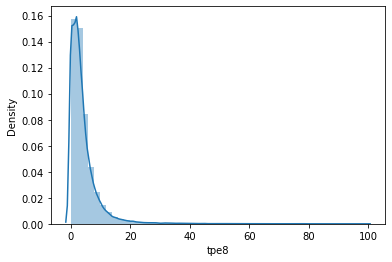

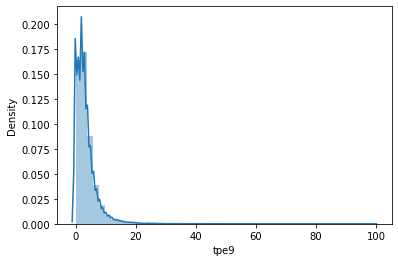

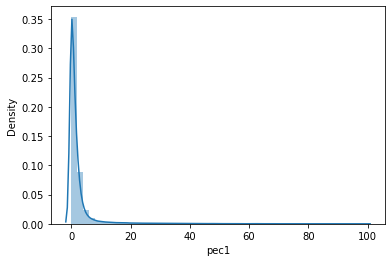

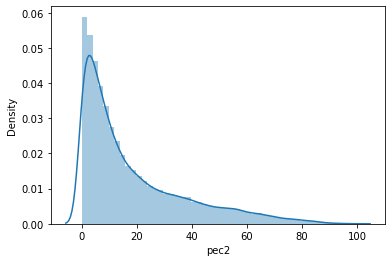

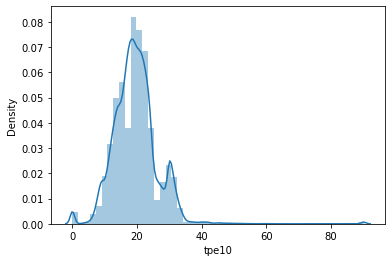

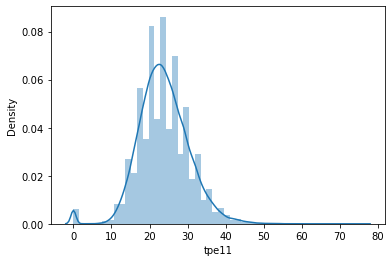

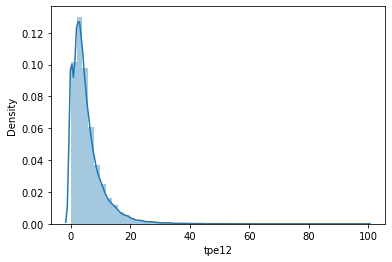

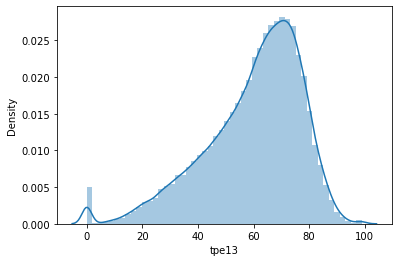

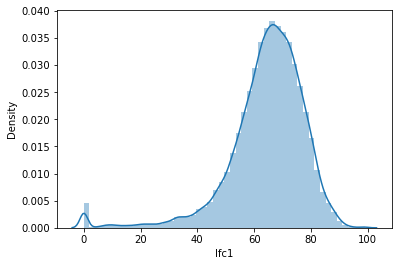

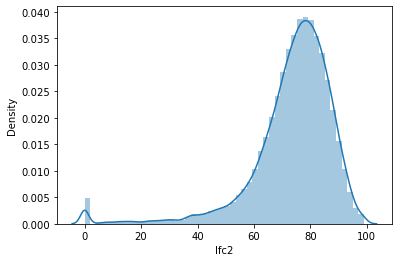

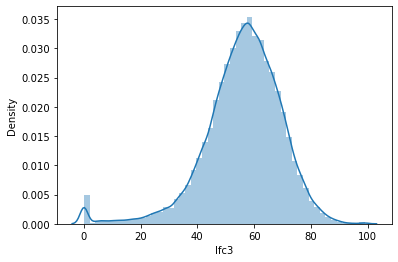

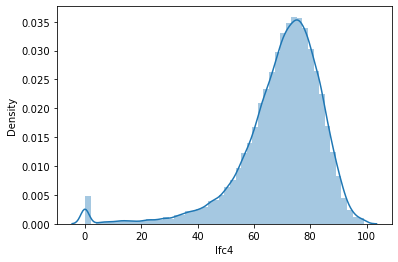

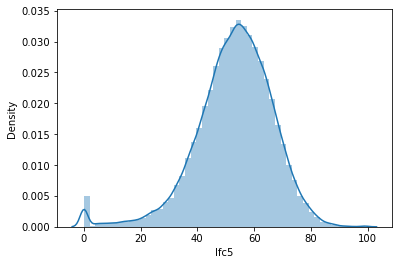

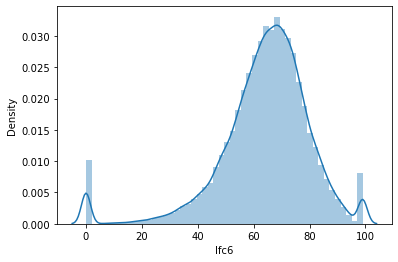

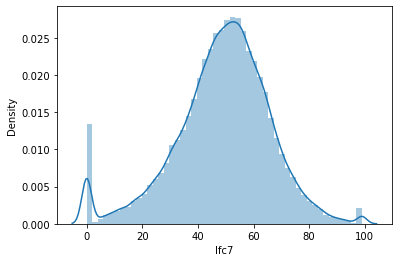

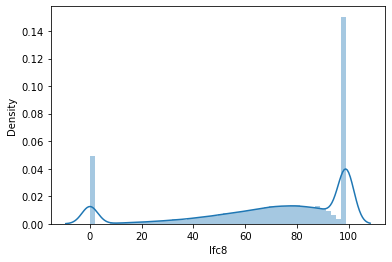

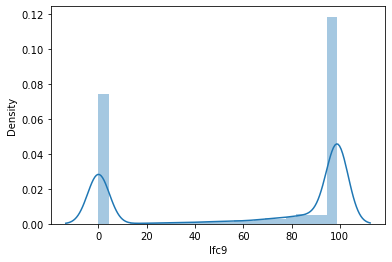

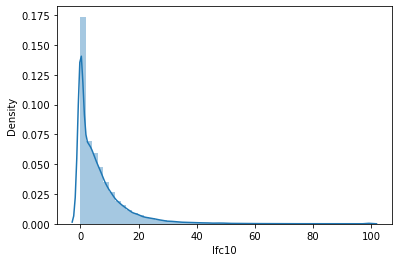

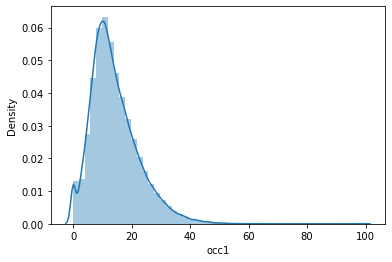

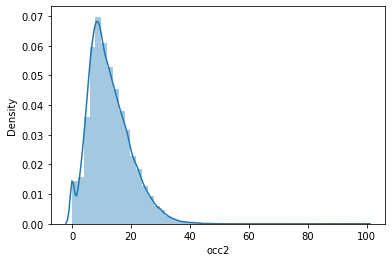

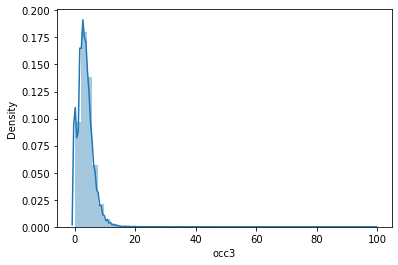

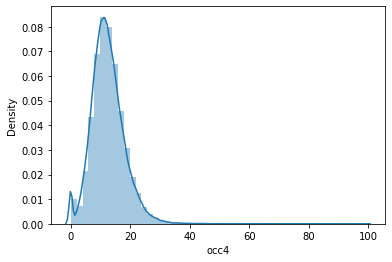

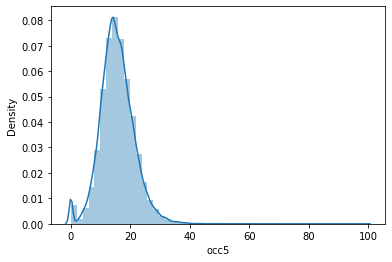

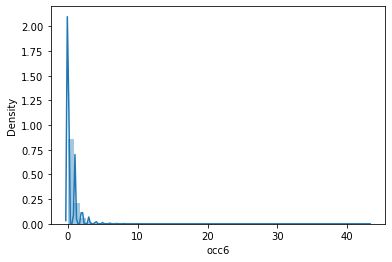

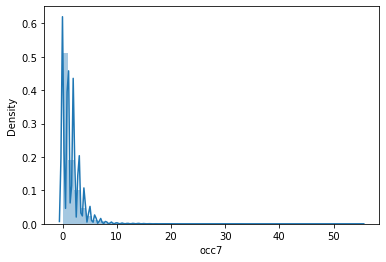

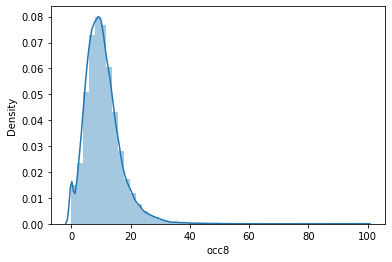

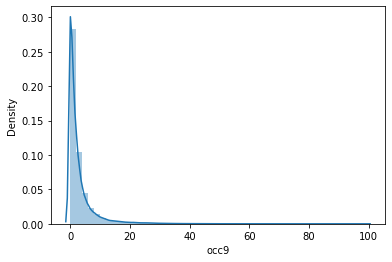

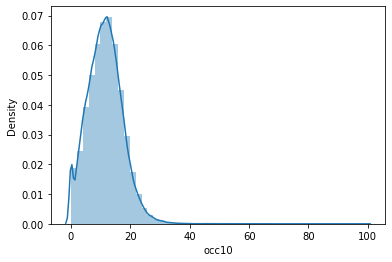

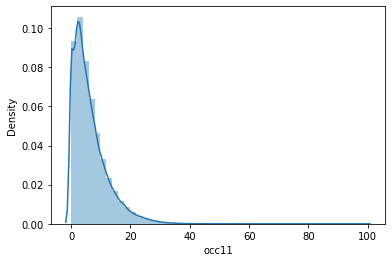

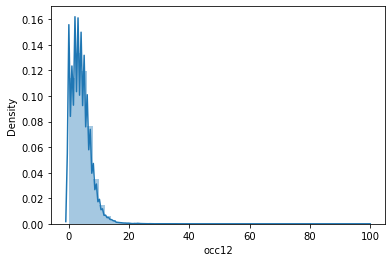

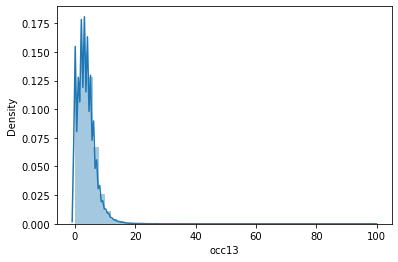

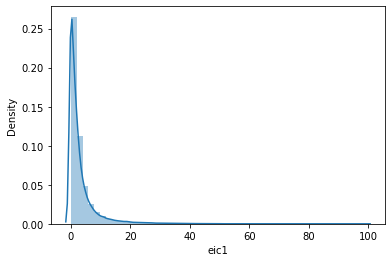

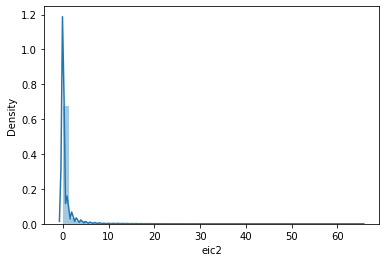

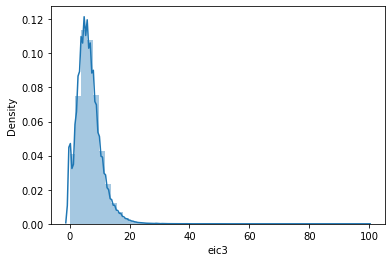

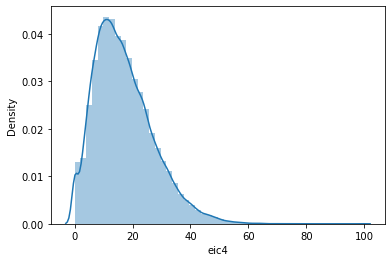

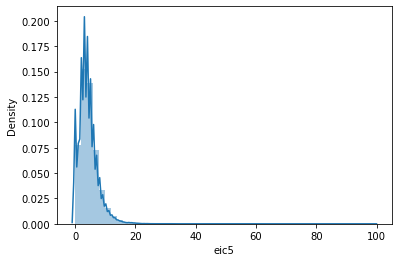

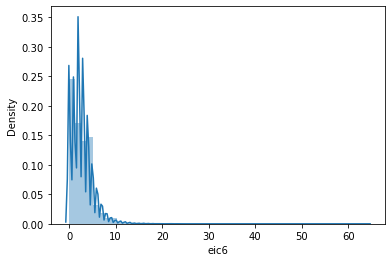

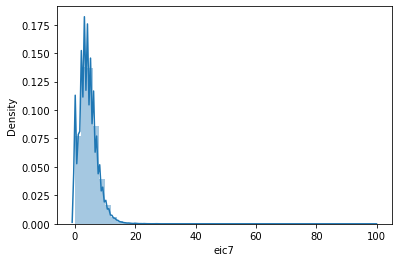

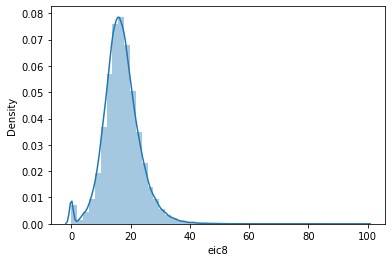

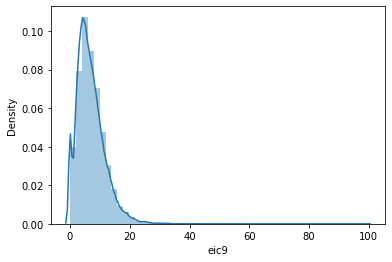

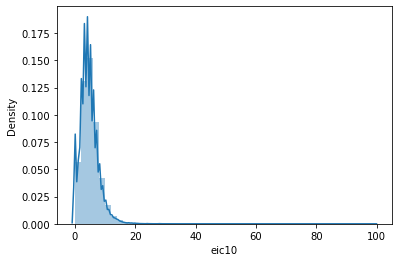

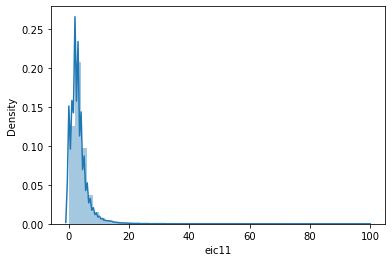

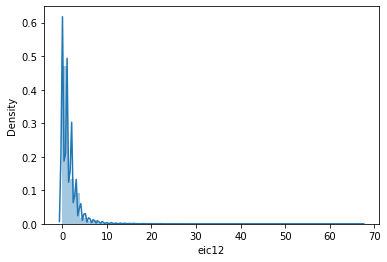

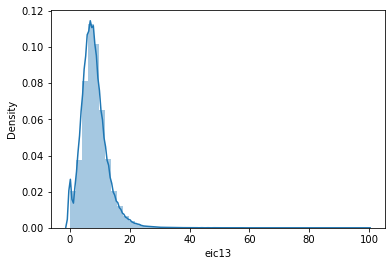

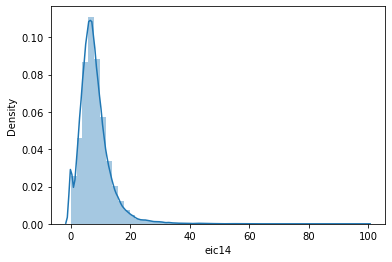

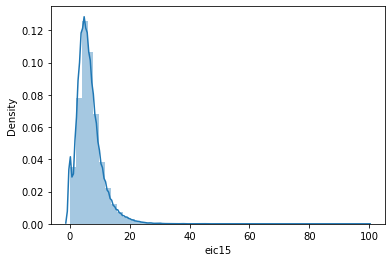

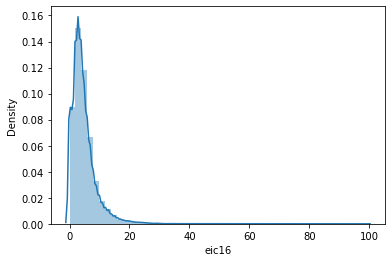

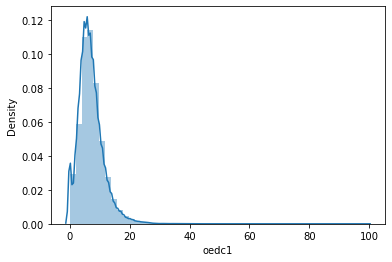

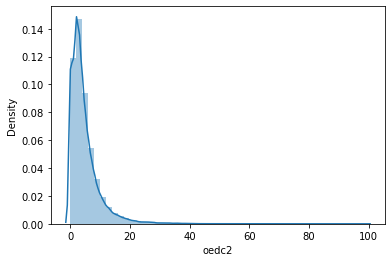

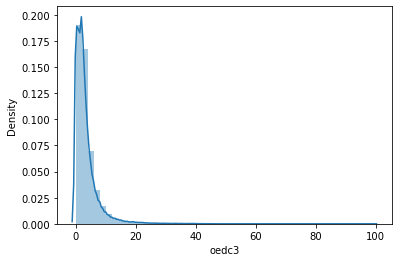

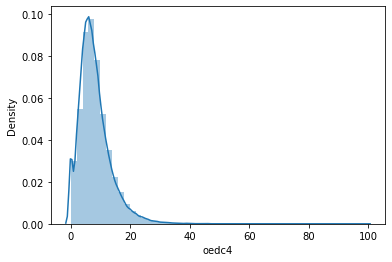

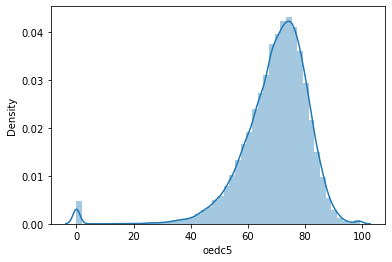

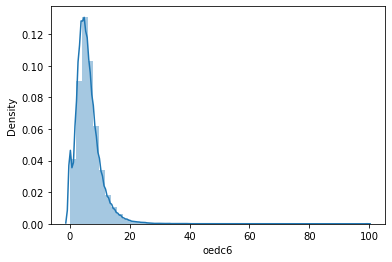

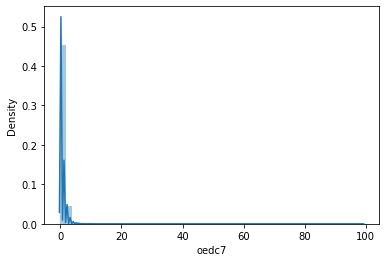

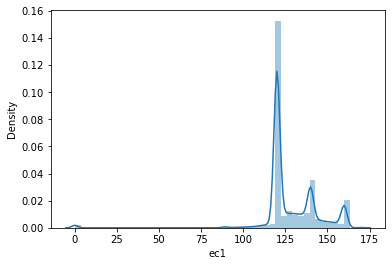

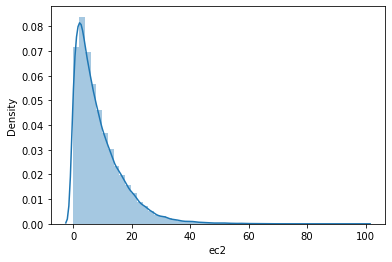

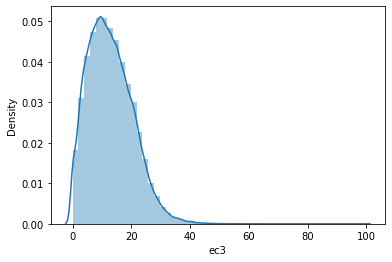

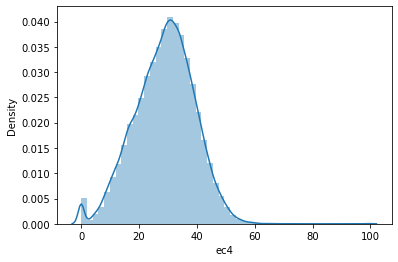

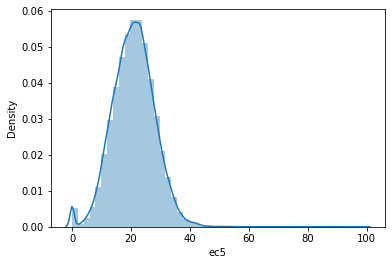

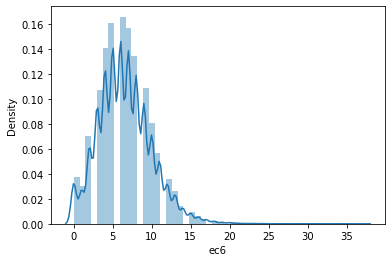

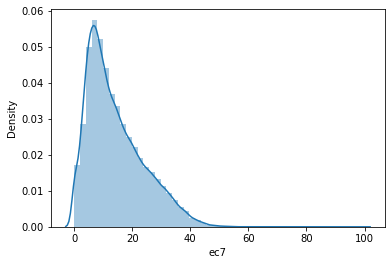

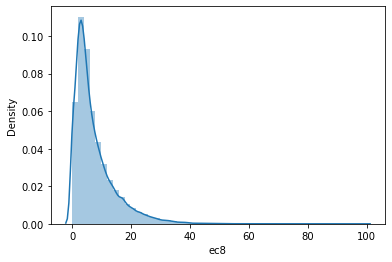

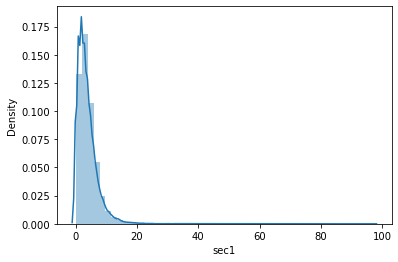

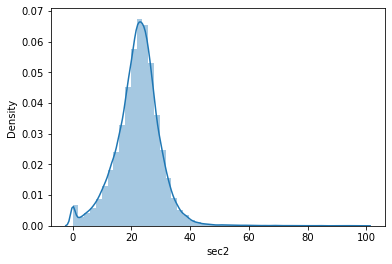

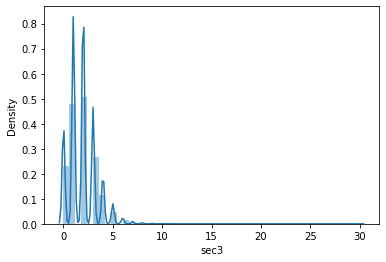

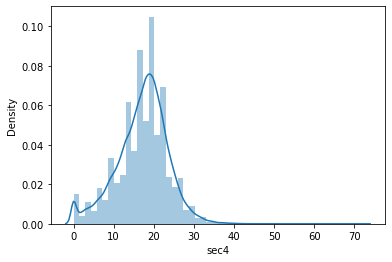

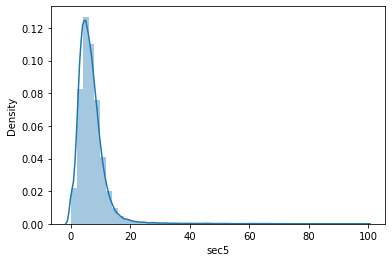

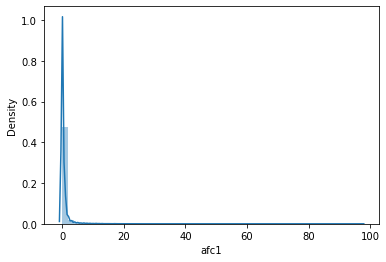

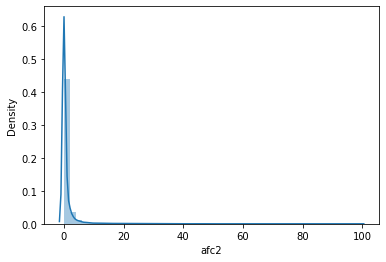

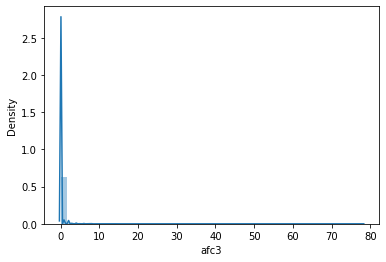

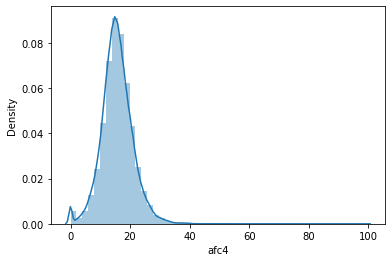

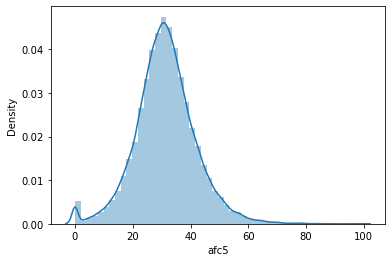

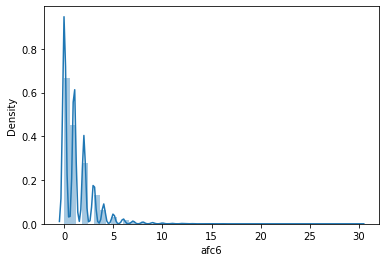

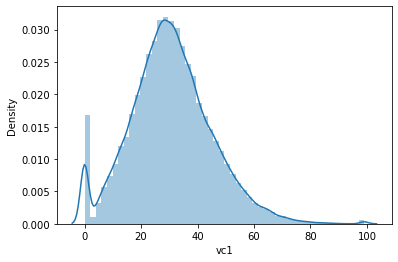

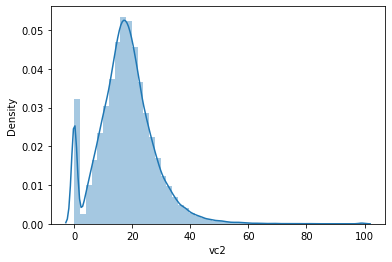

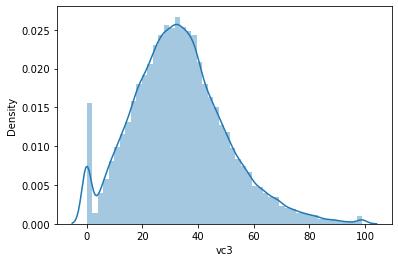

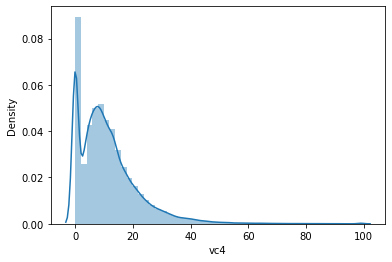

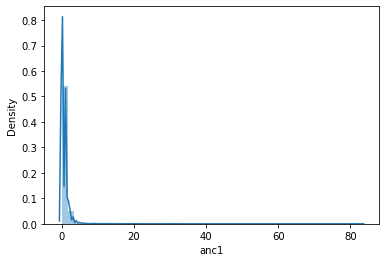

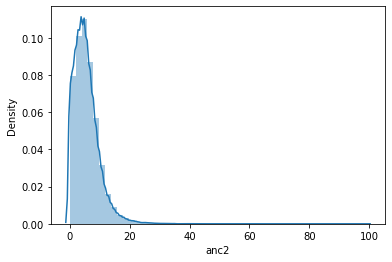

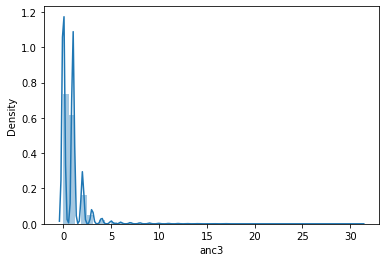

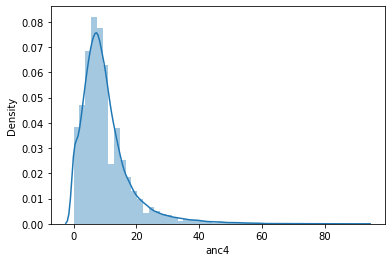

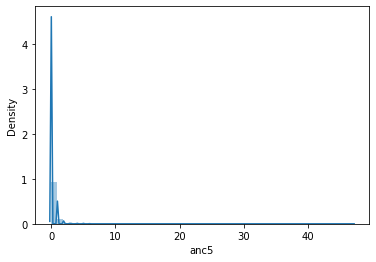

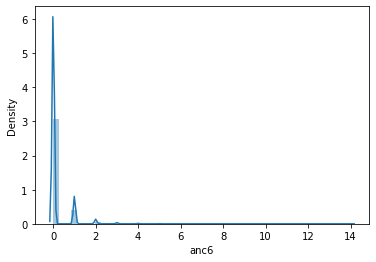

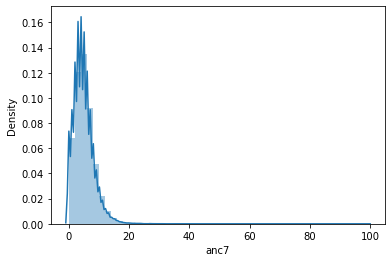

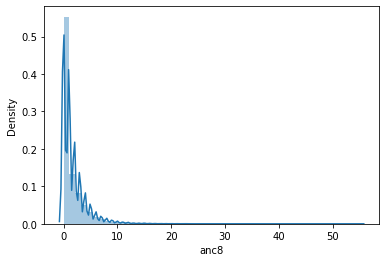

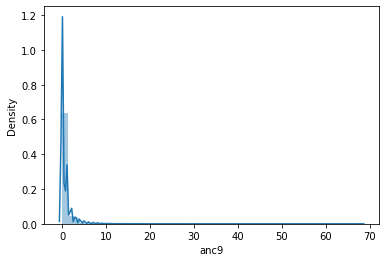

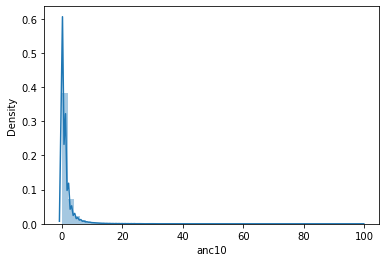

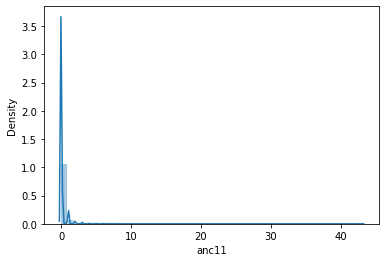

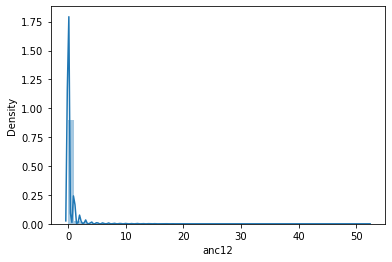

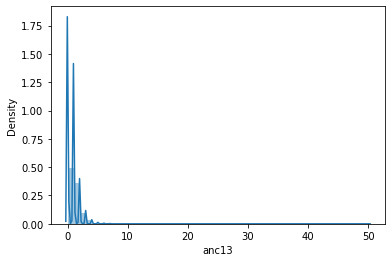

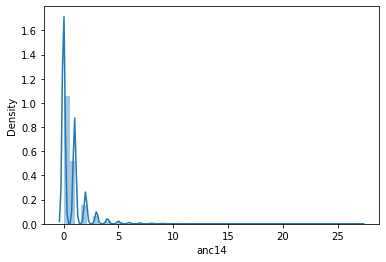

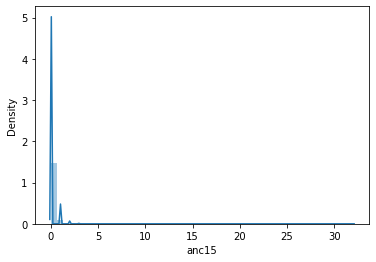

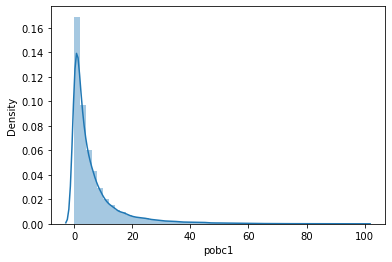

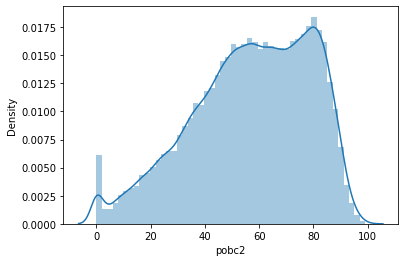

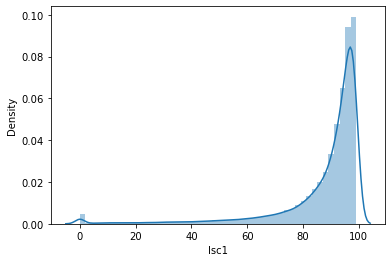

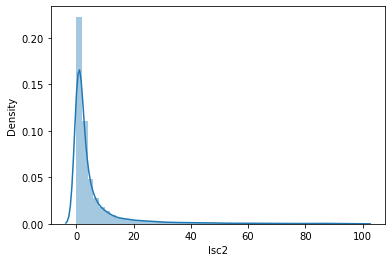

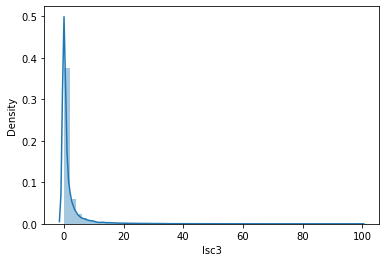

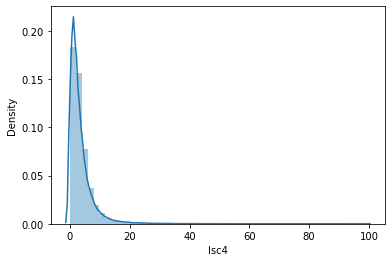

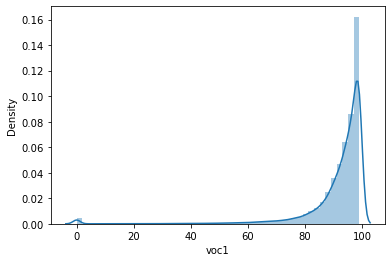

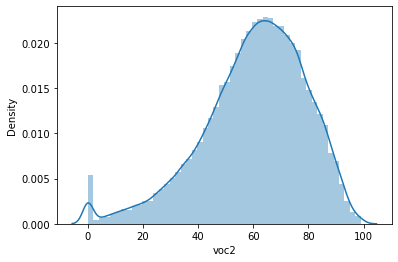

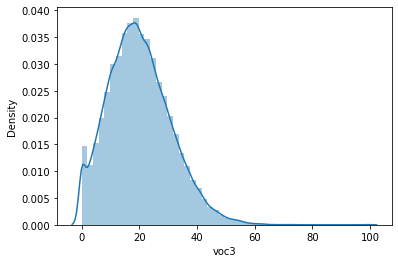

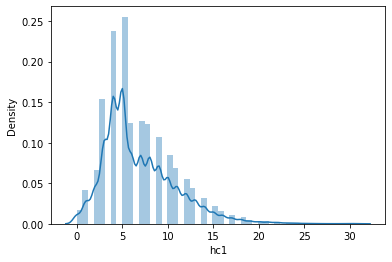

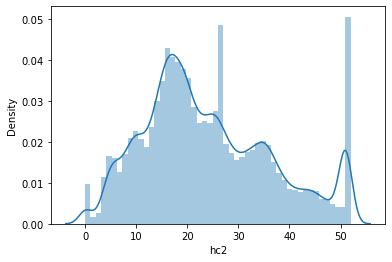

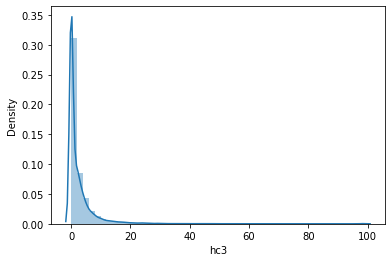

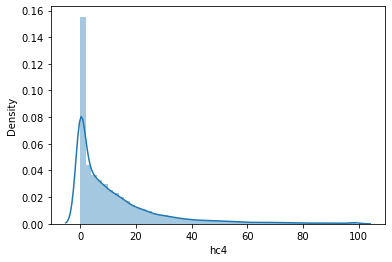

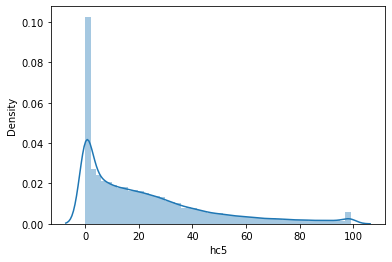

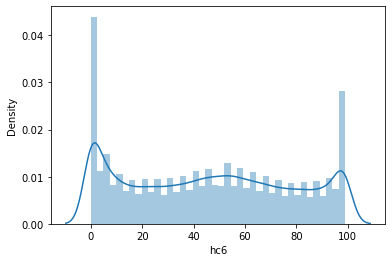

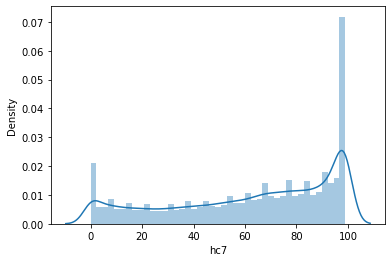

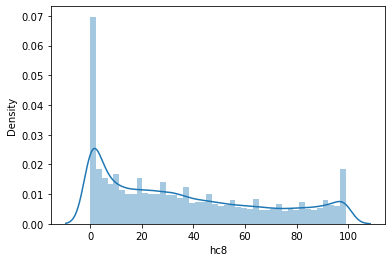

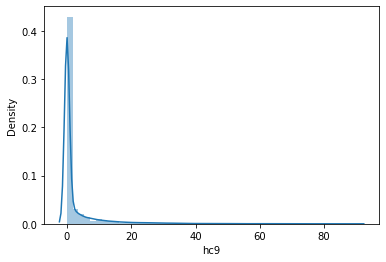

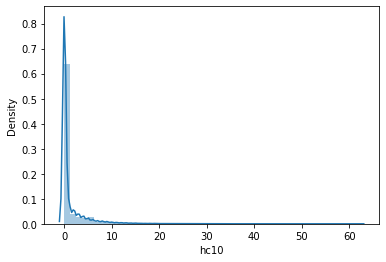

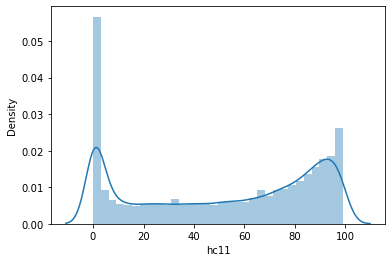

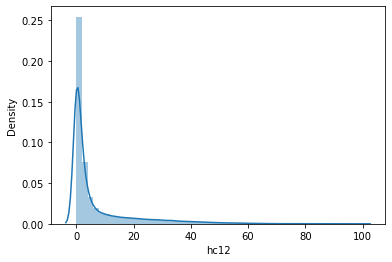

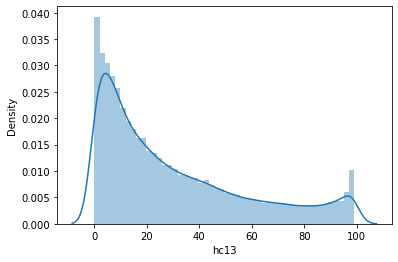

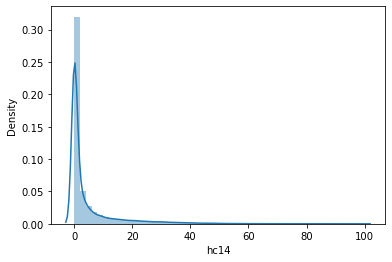

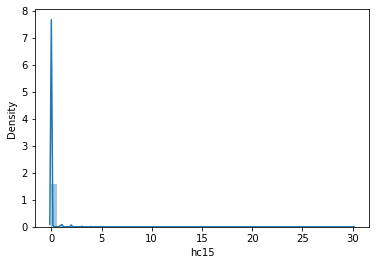

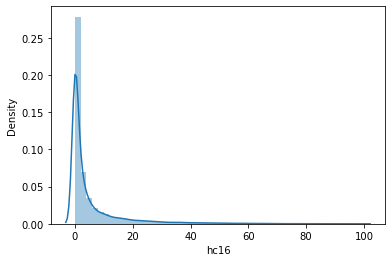

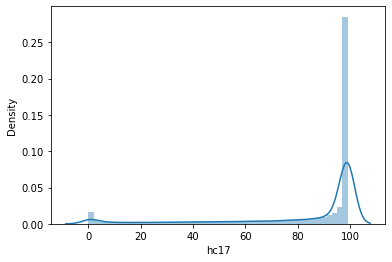

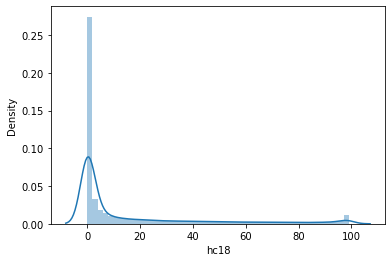

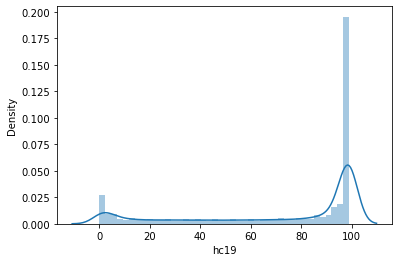

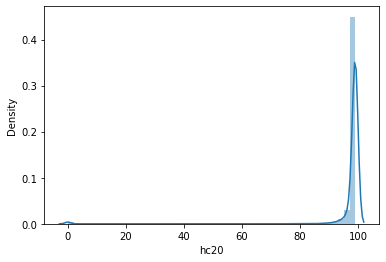

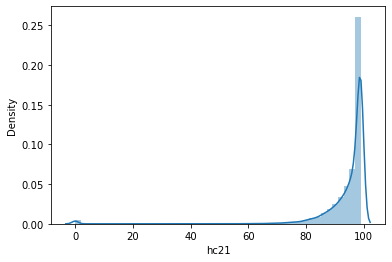

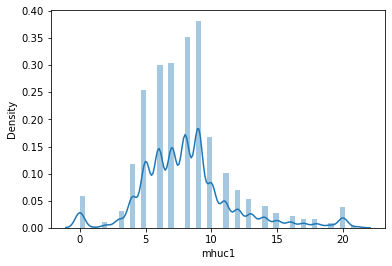

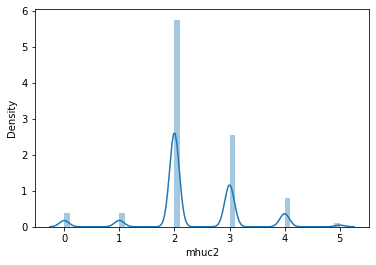

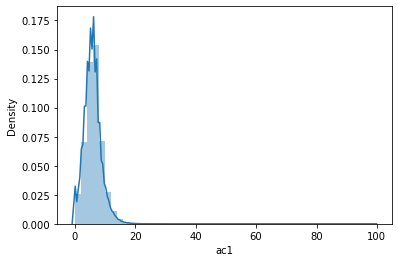

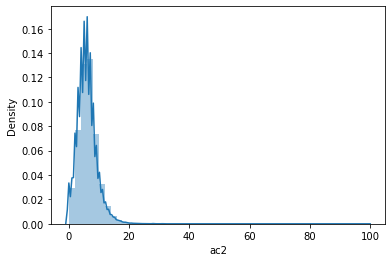

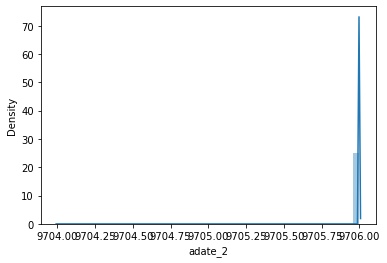

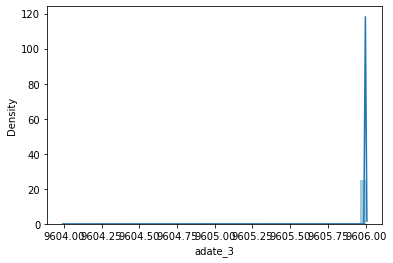

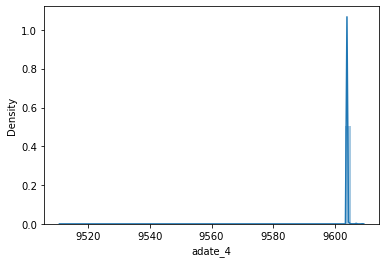

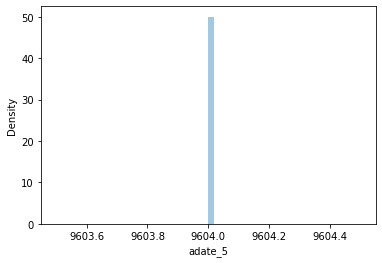

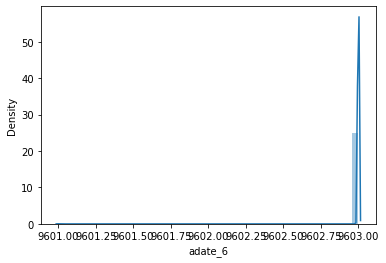

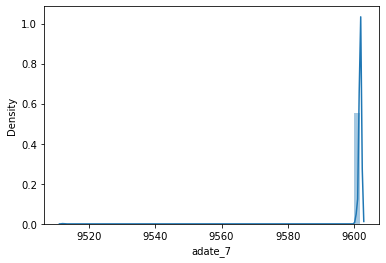

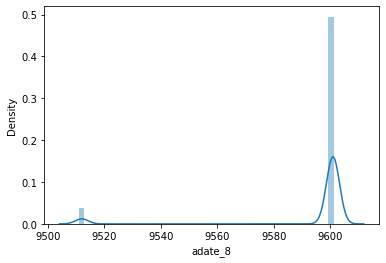

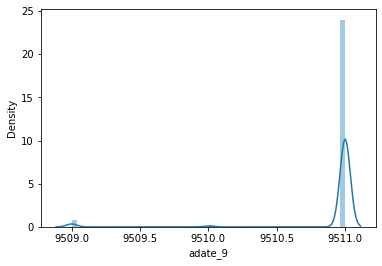

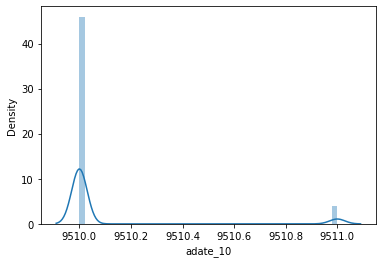

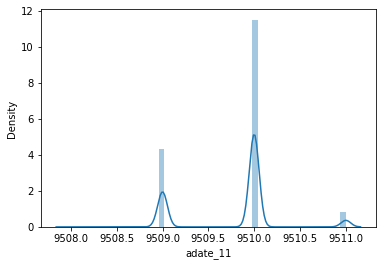

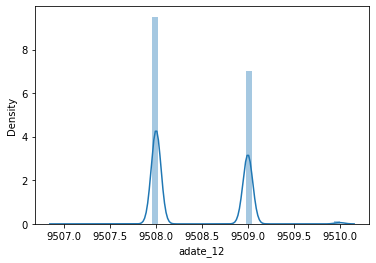

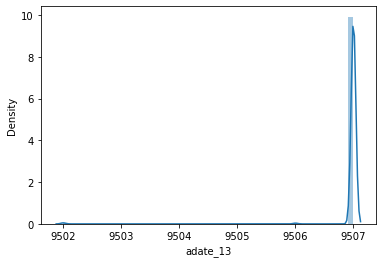

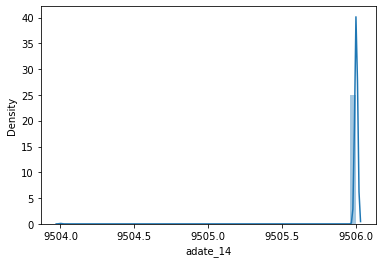

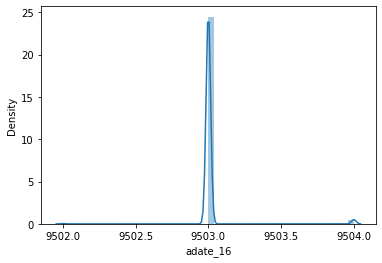

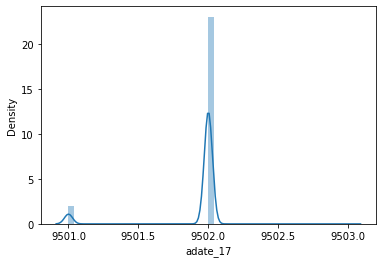

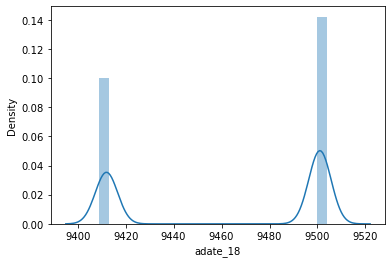

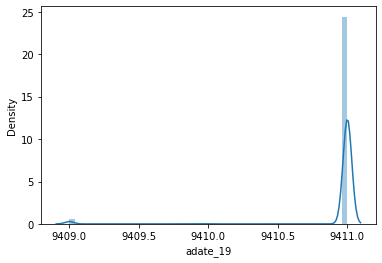

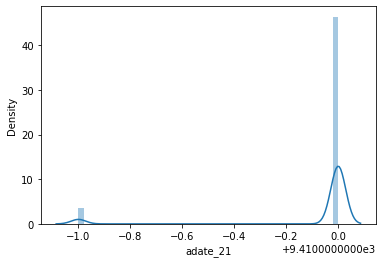

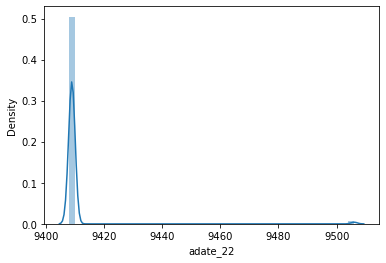

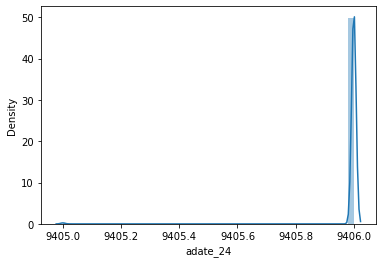

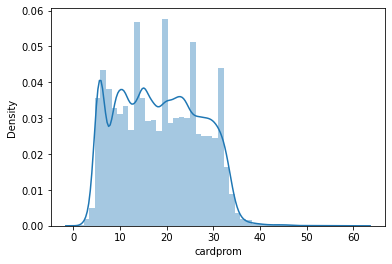

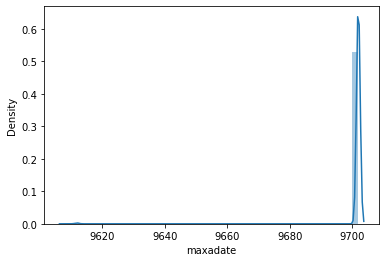

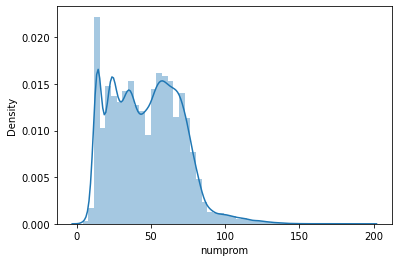

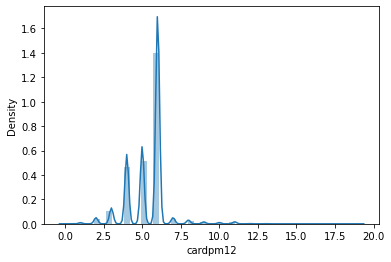

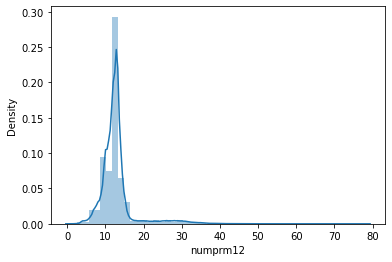

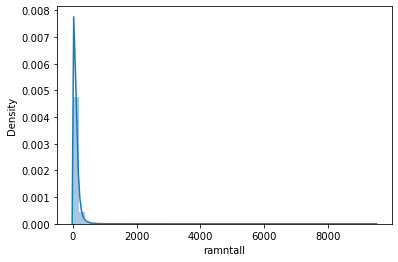

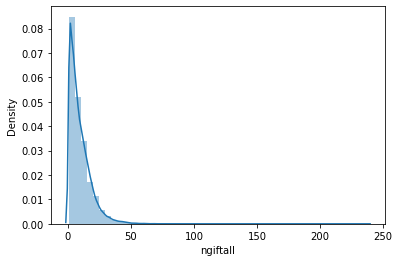

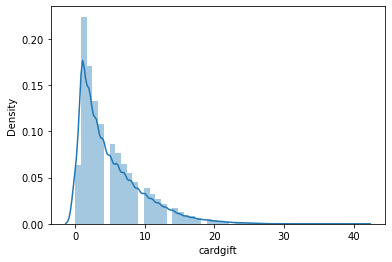

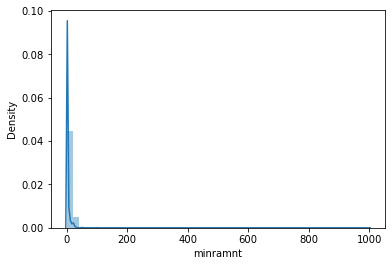

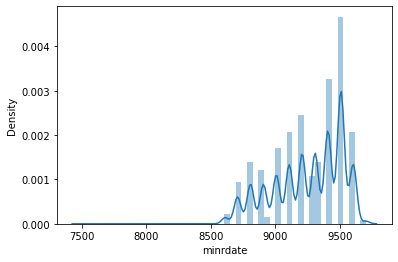

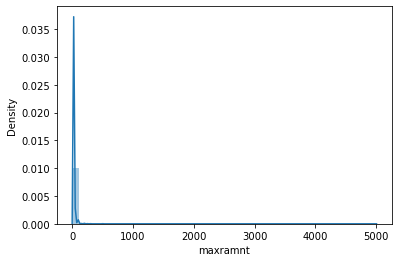

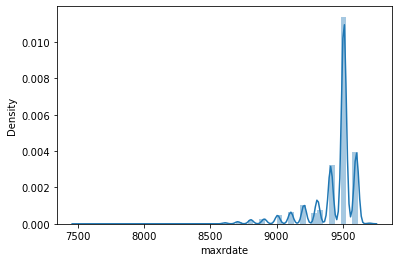

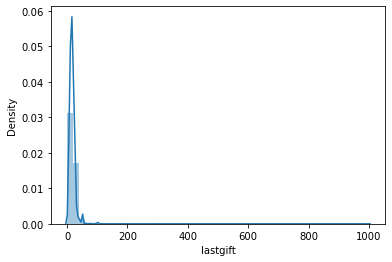

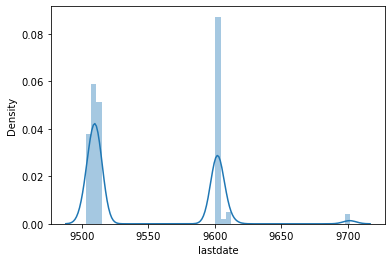

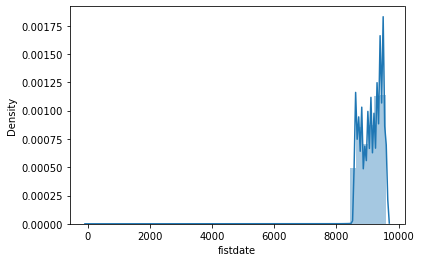

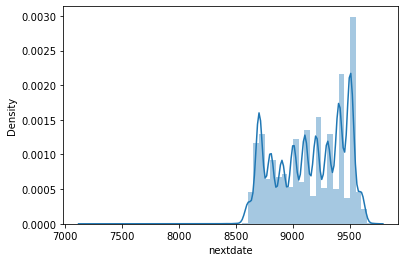

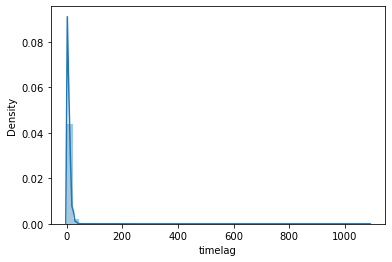

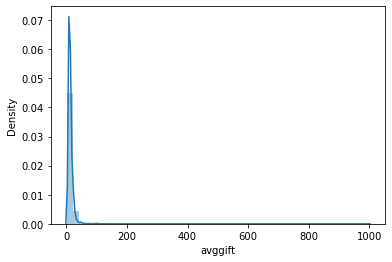

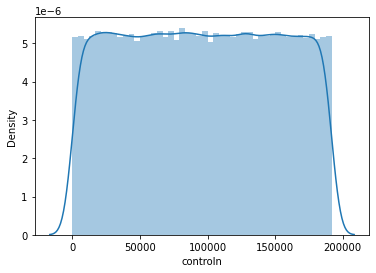

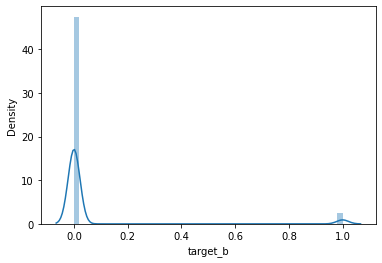

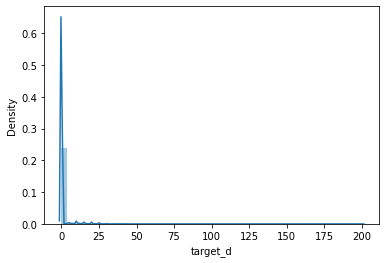

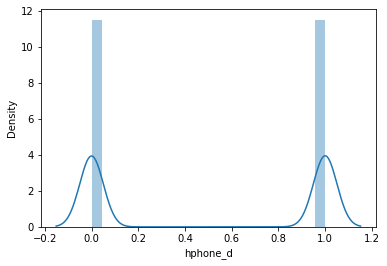

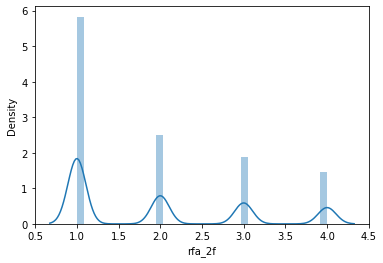

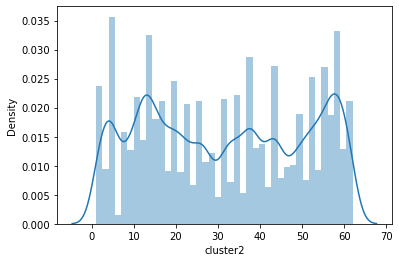

In [74]:
numerical = data.select_dtypes(np.number)
for col in numerical:
    sns.distplot(data[col])
    plt.show()

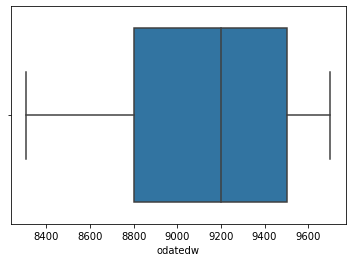

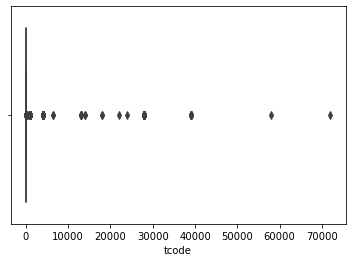

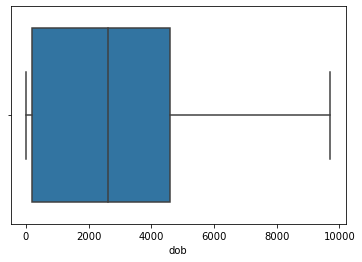

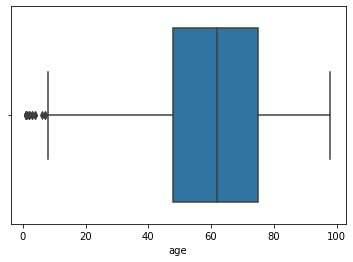

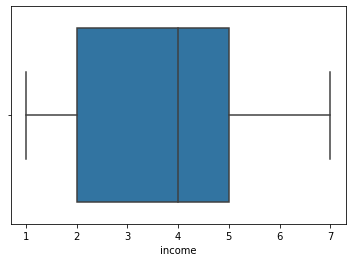

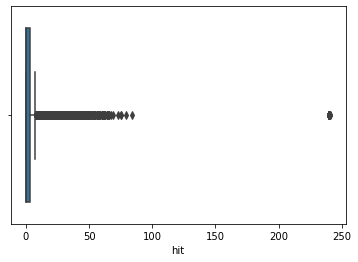

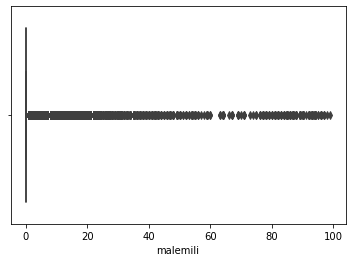

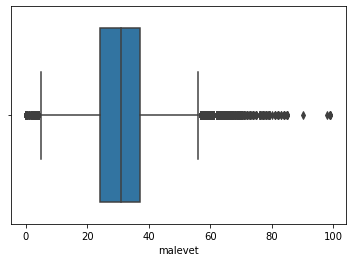

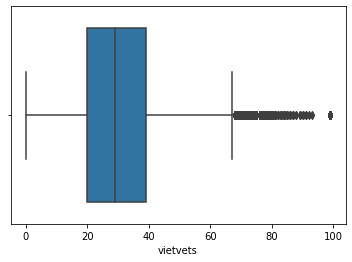

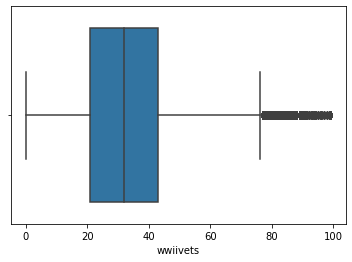

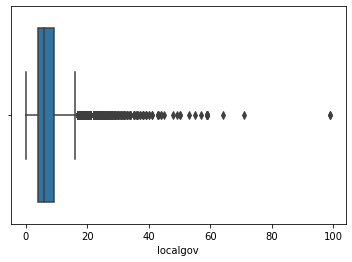

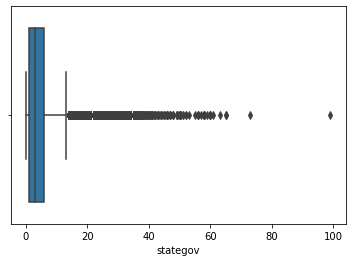

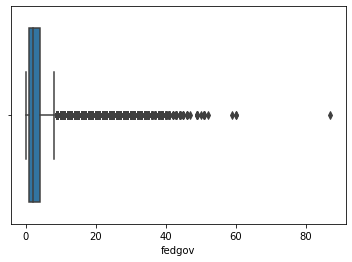

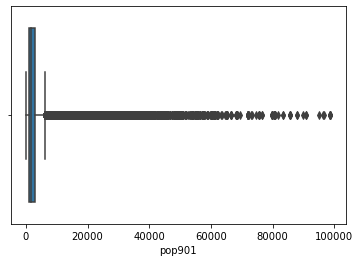

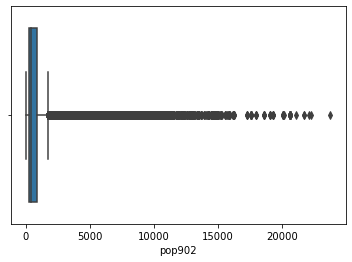

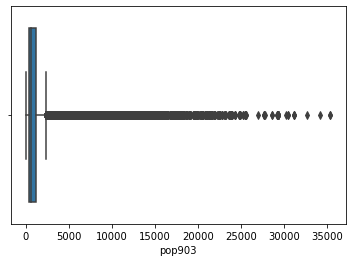

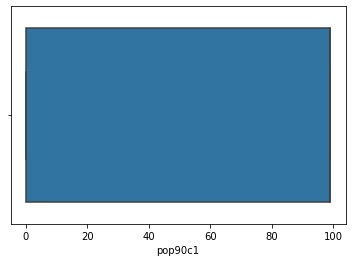

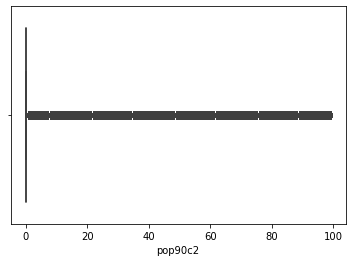

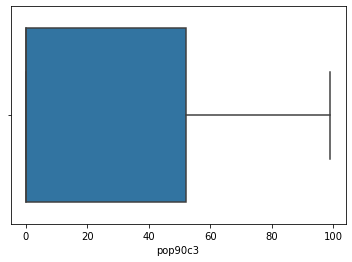

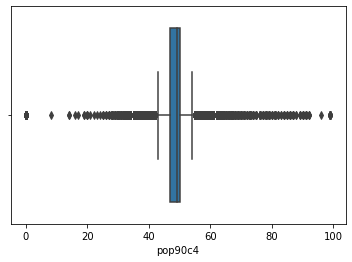

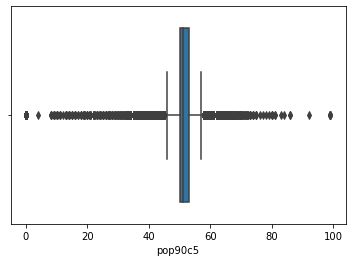

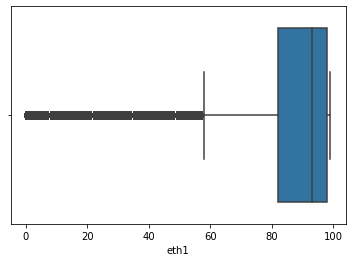

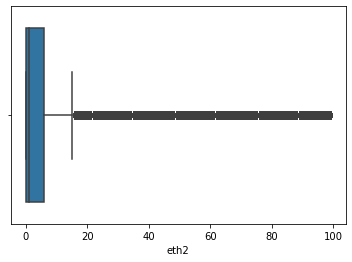

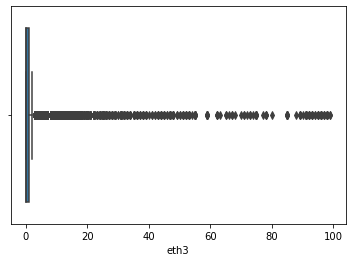

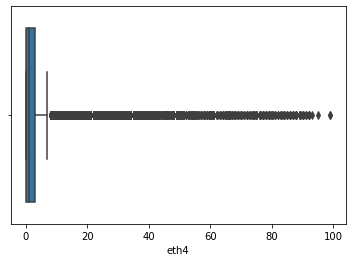

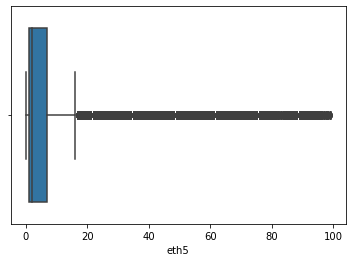

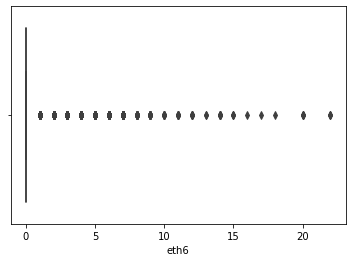

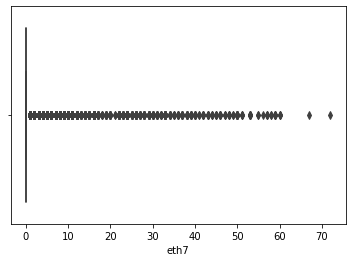

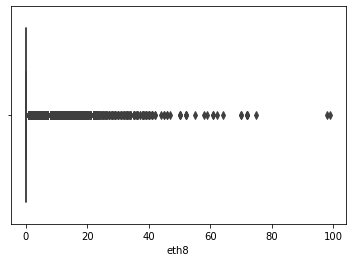

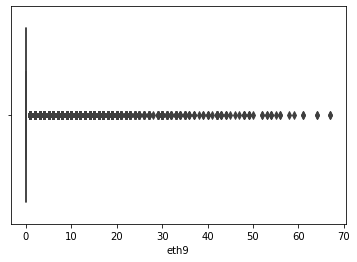

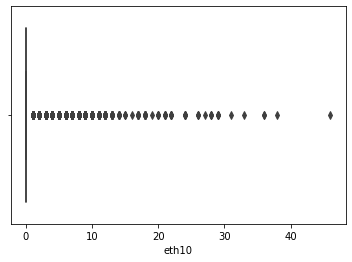

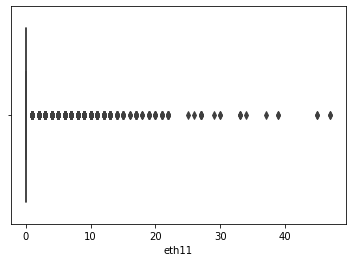

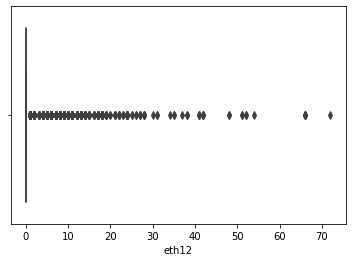

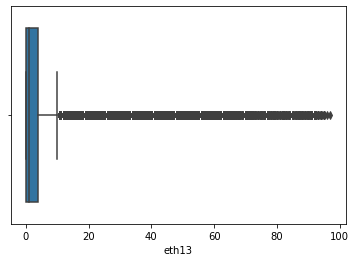

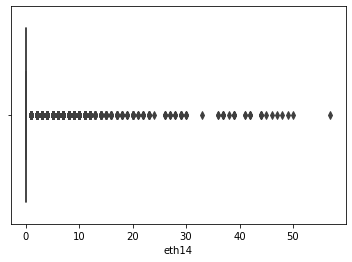

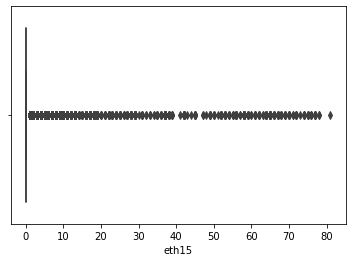

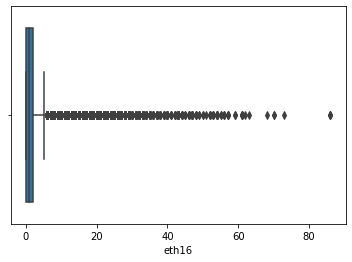

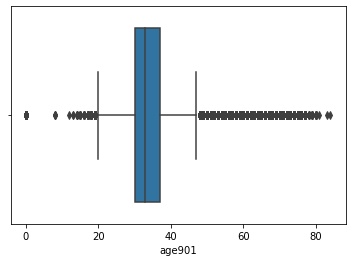

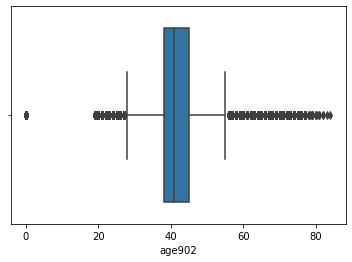

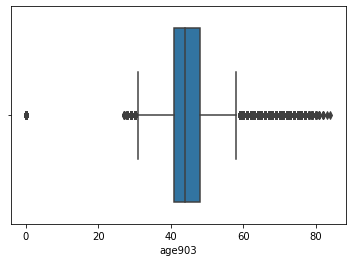

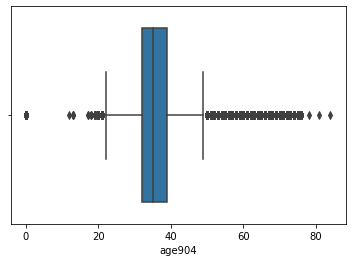

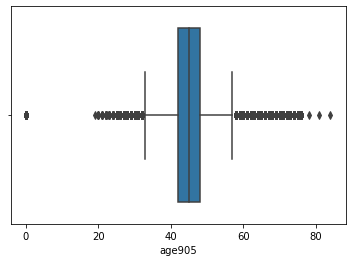

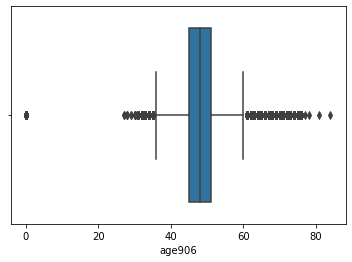

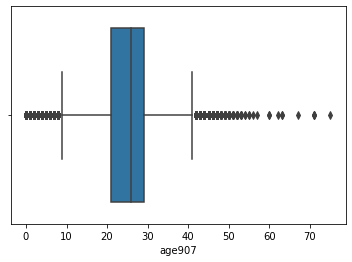

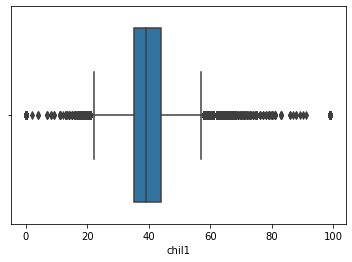

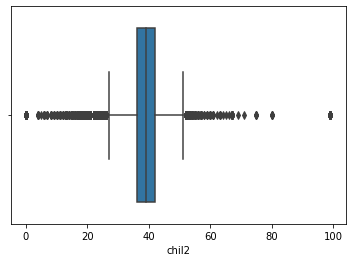

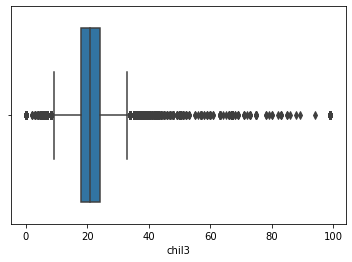

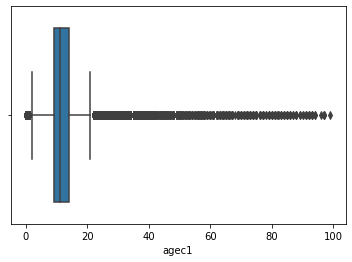

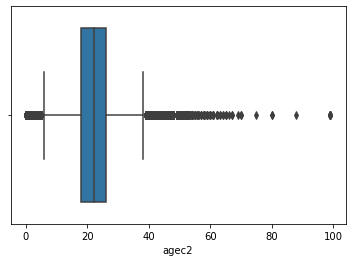

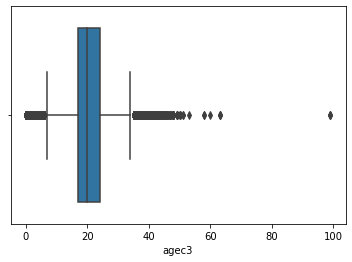

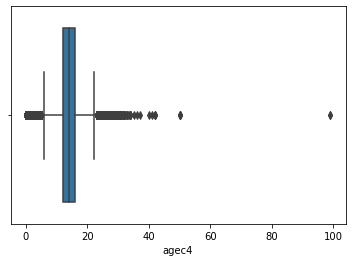

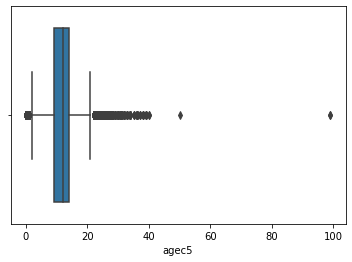

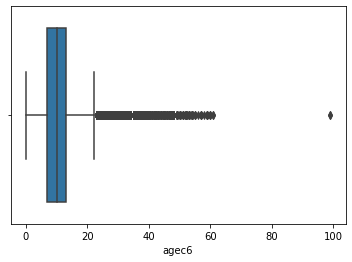

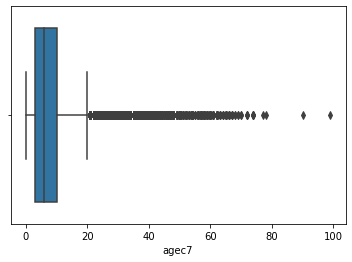

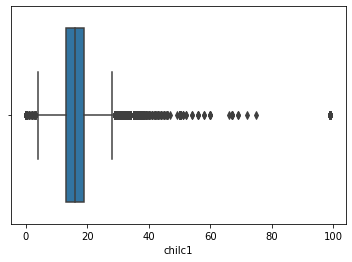

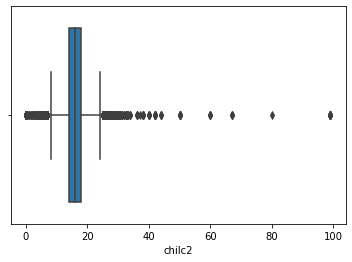

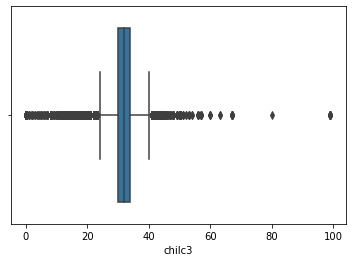

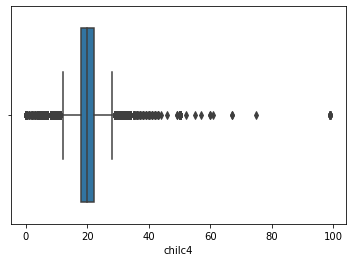

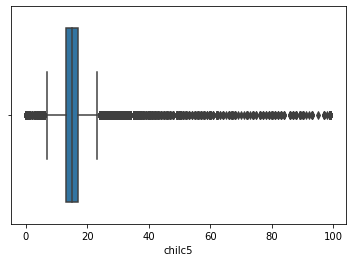

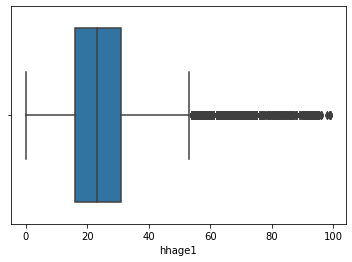

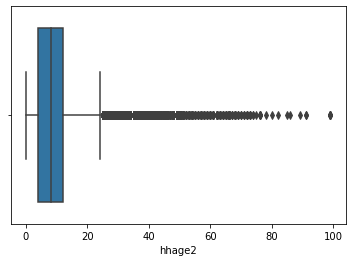

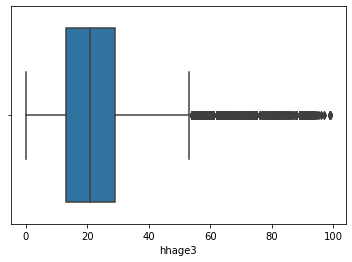

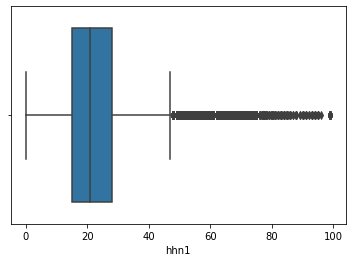

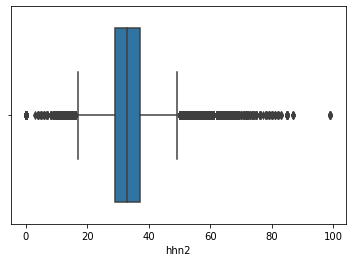

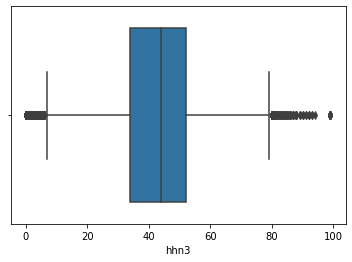

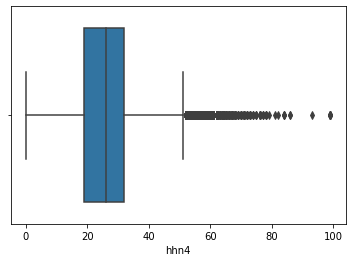

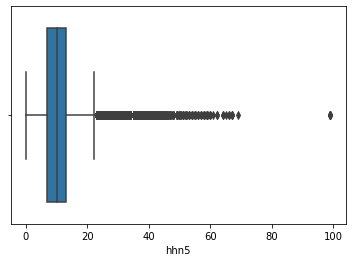

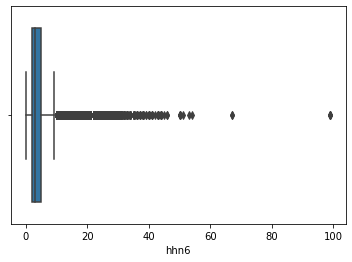

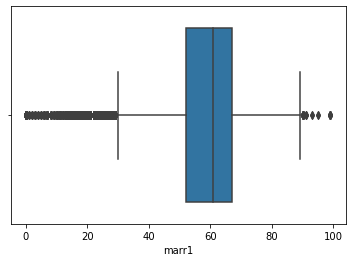

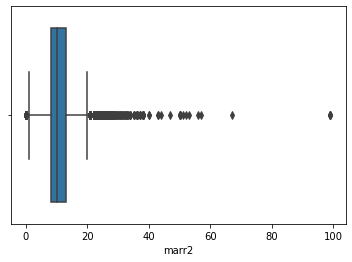

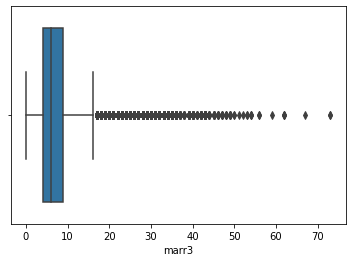

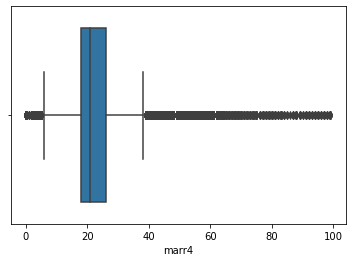

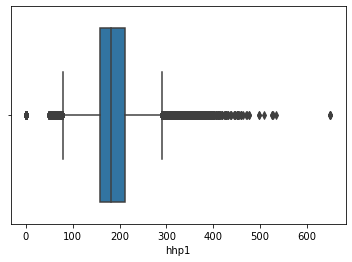

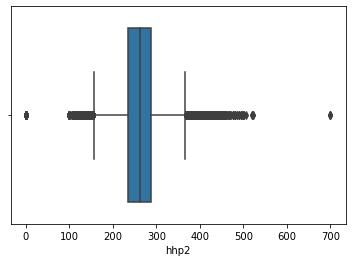

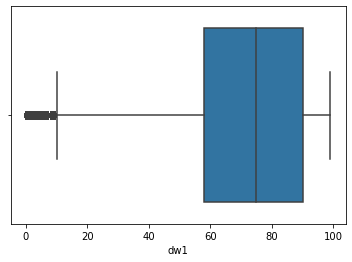

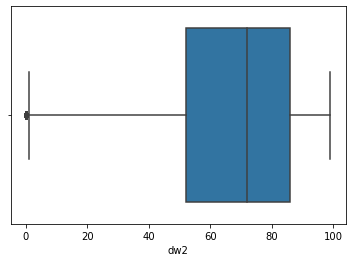

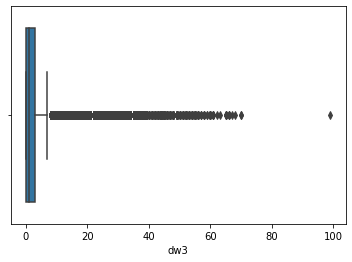

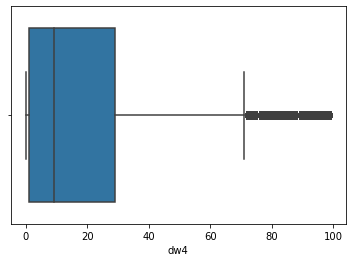

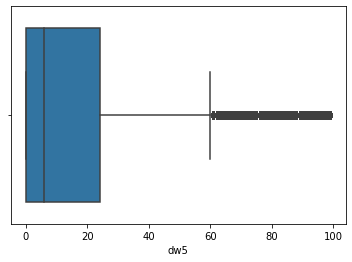

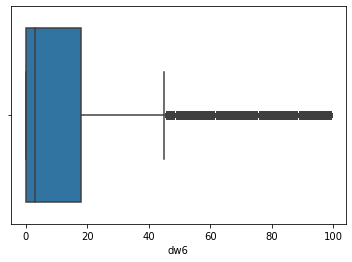

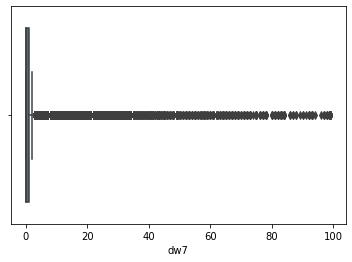

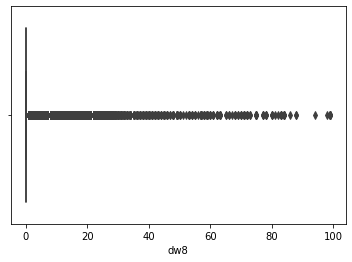

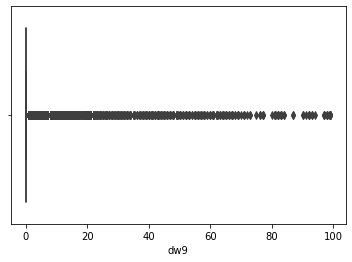

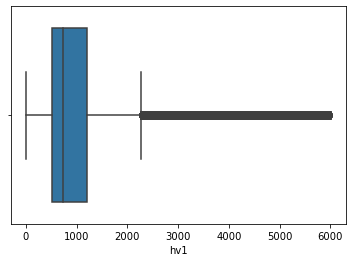

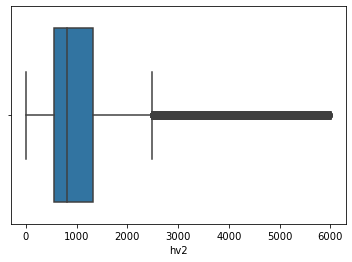

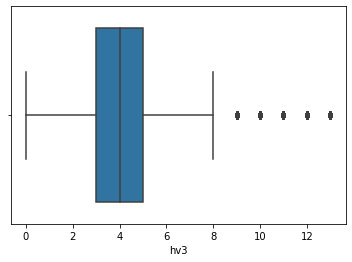

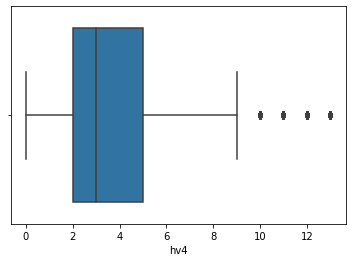

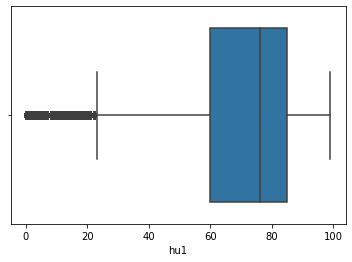

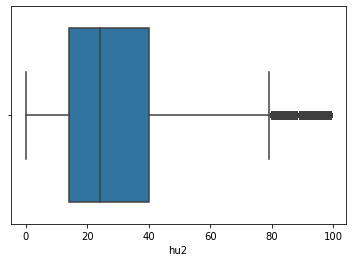

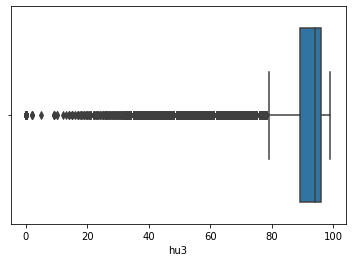

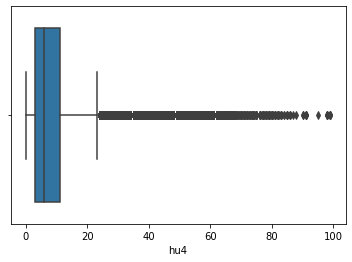

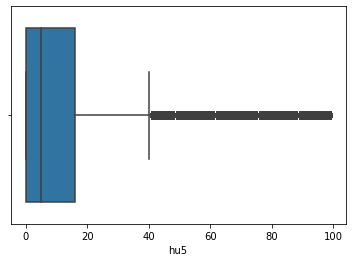

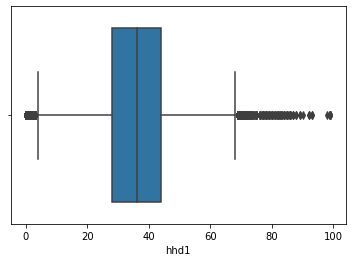

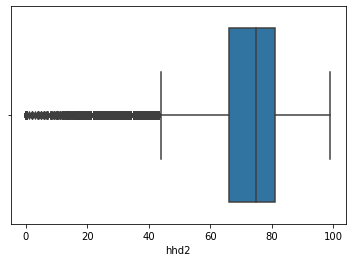

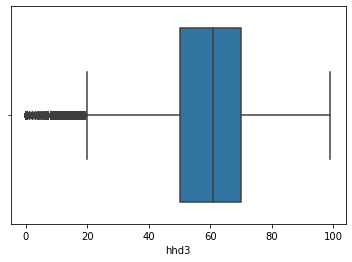

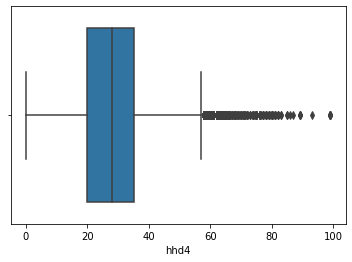

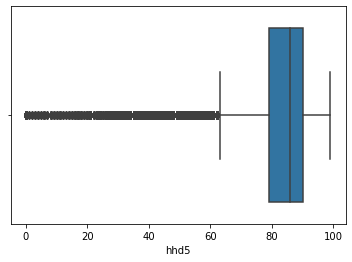

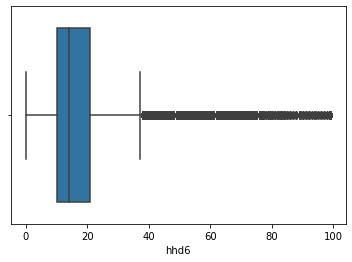

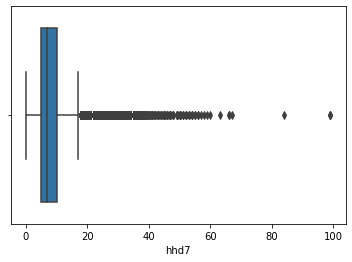

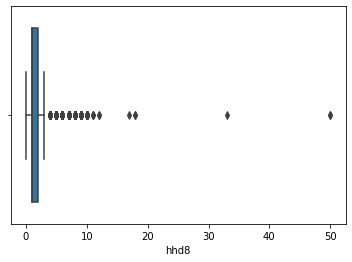

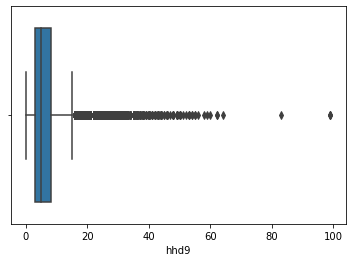

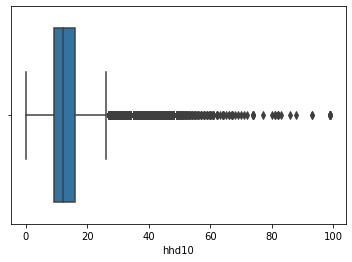

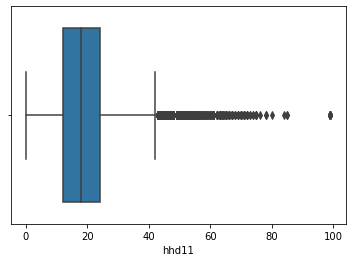

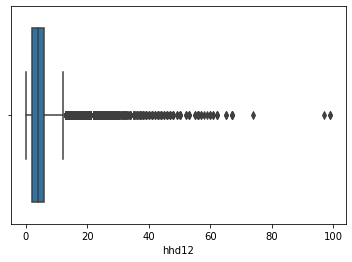

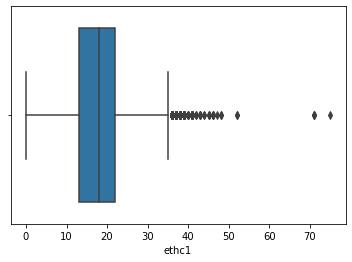

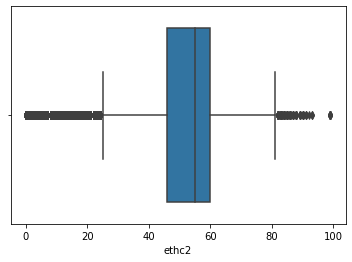

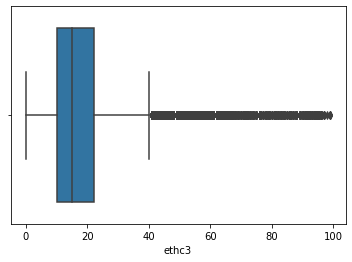

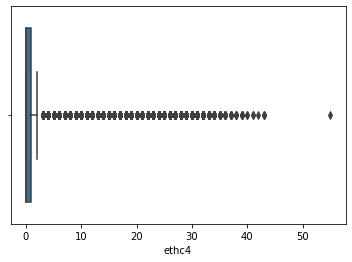

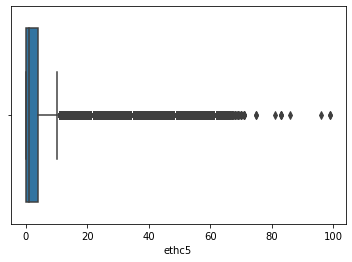

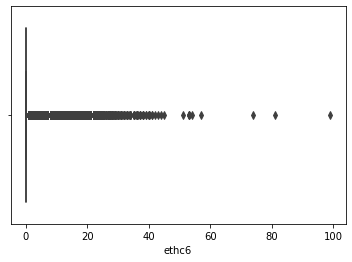

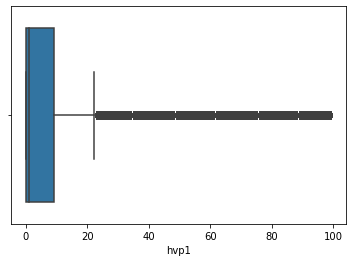

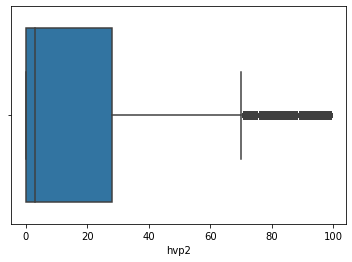

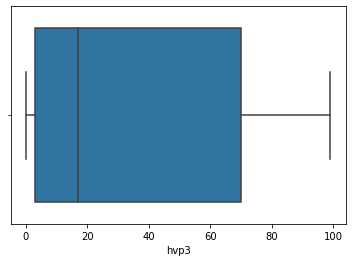

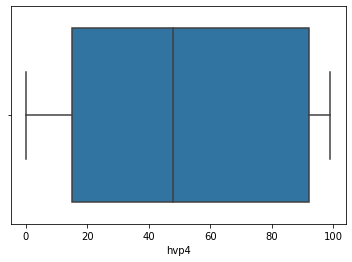

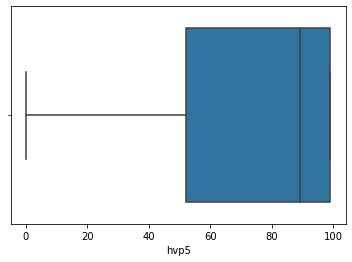

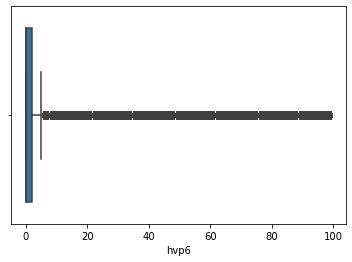

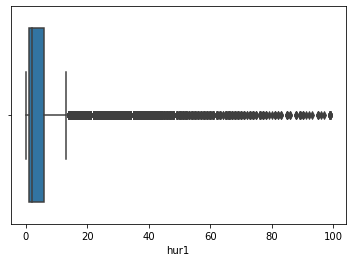

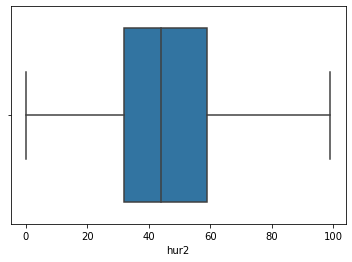

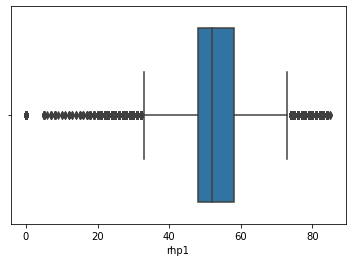

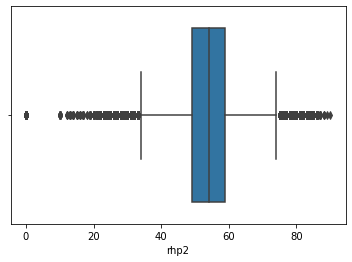

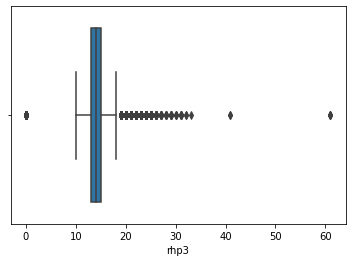

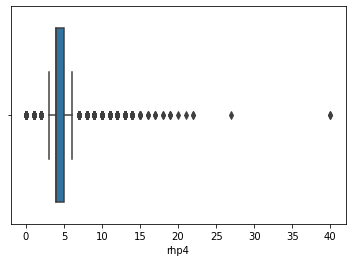

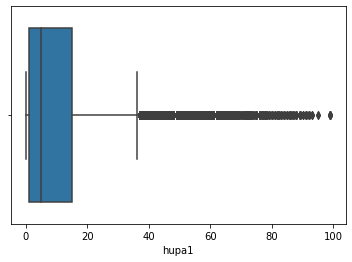

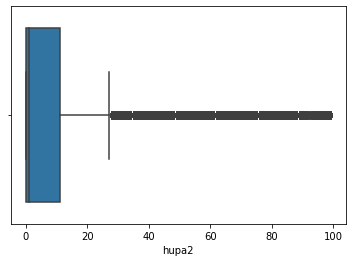

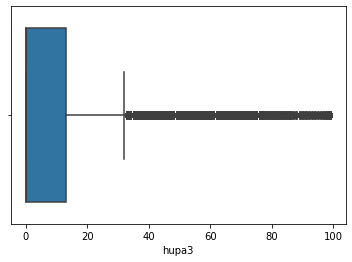

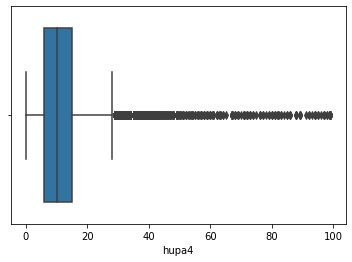

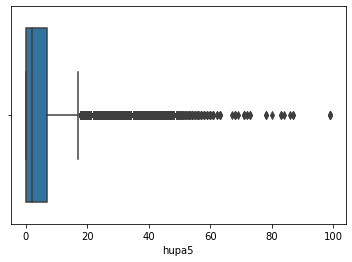

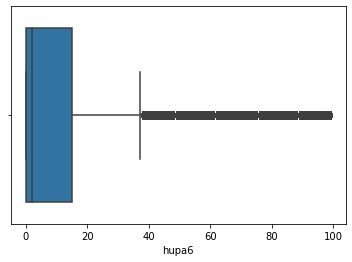

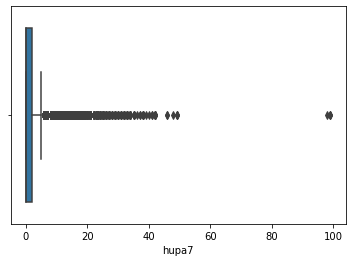

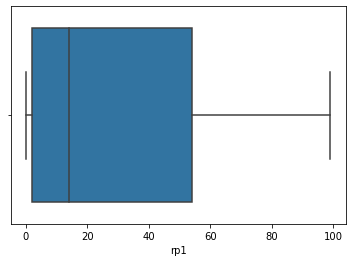

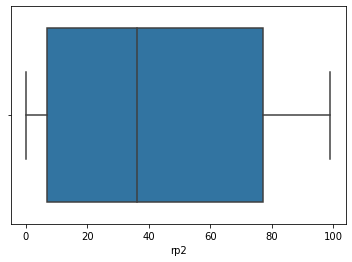

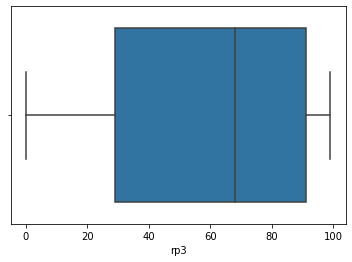

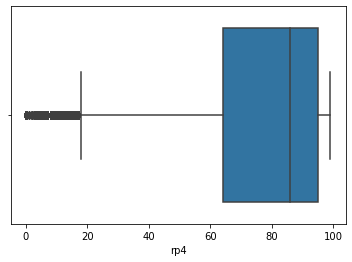

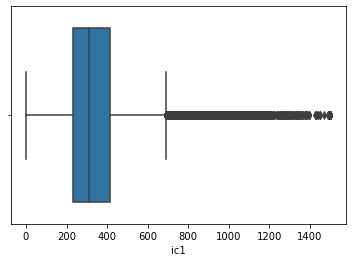

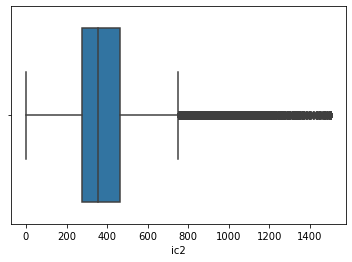

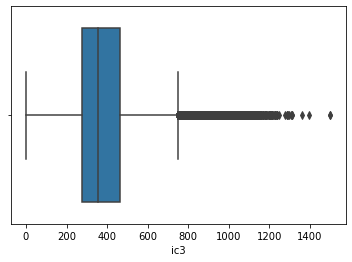

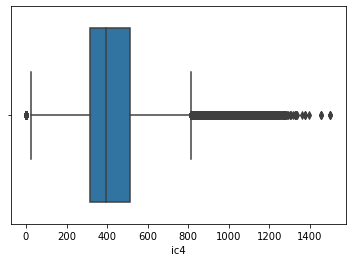

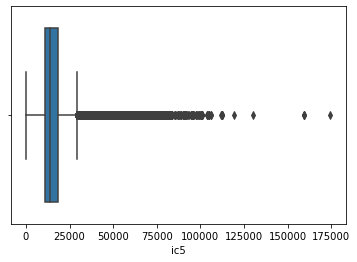

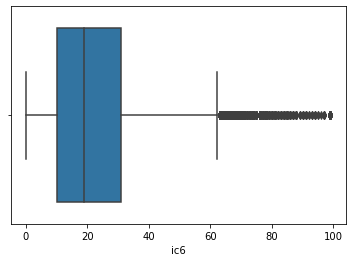

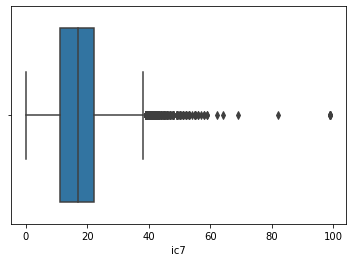

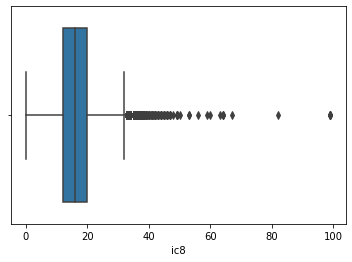

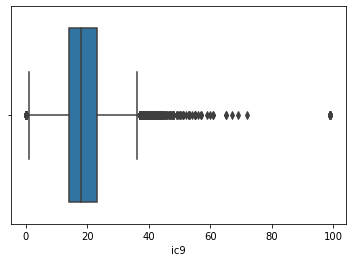

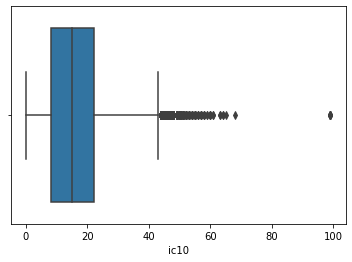

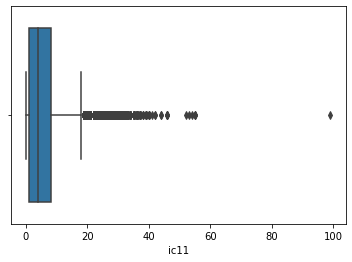

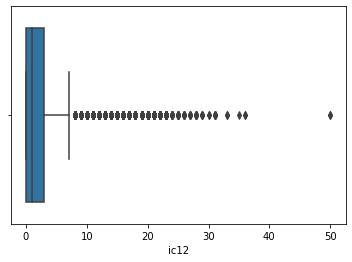

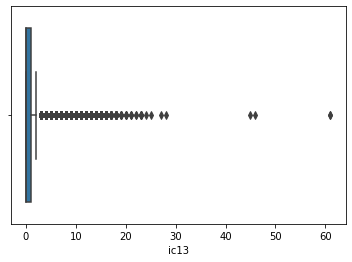

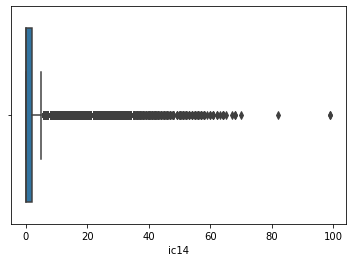

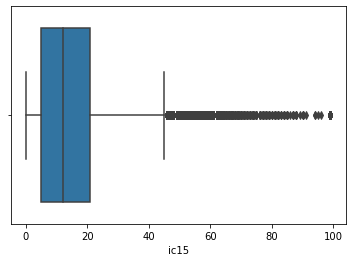

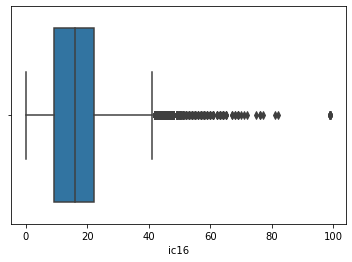

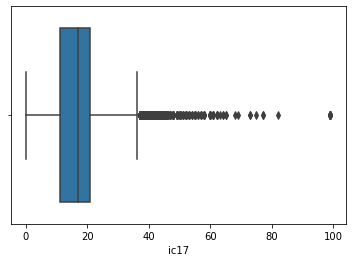

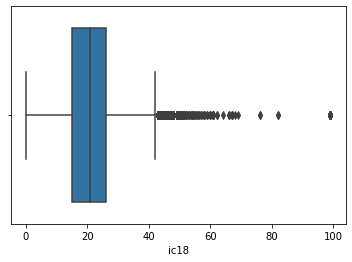

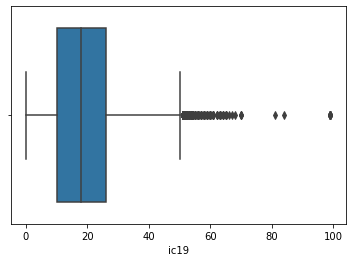

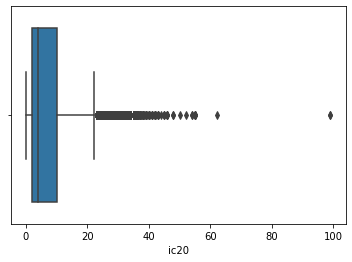

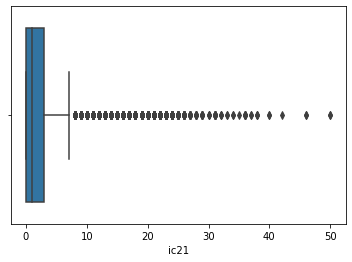

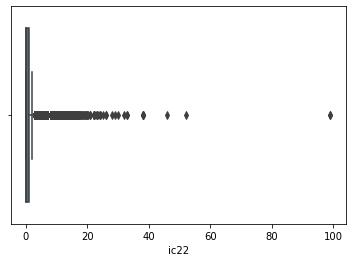

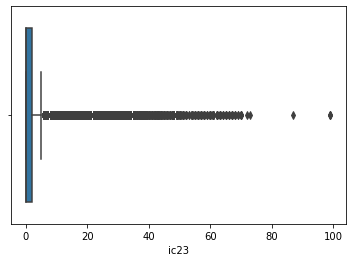

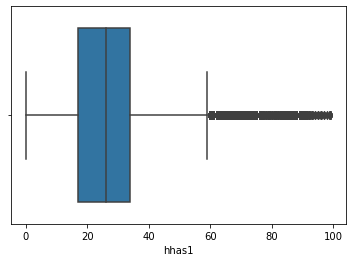

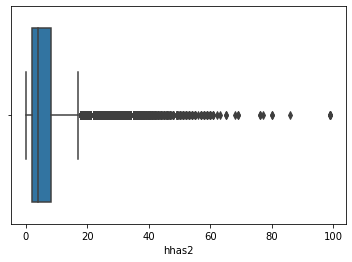

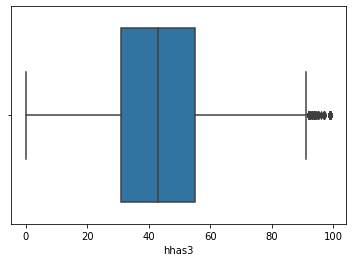

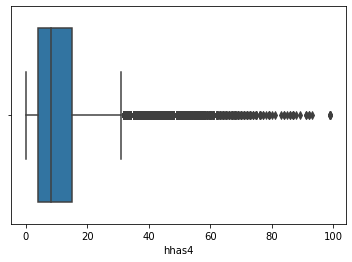

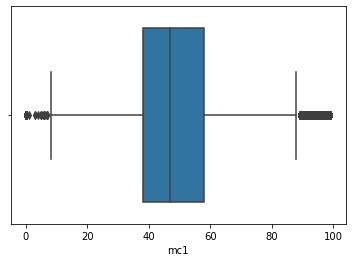

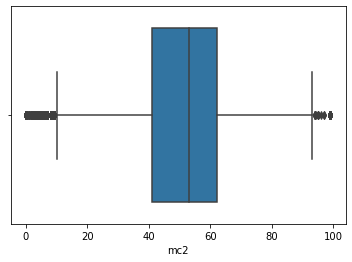

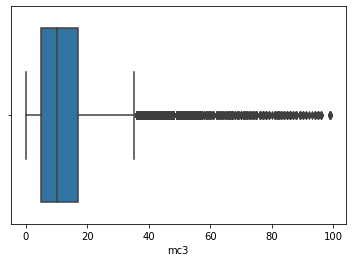

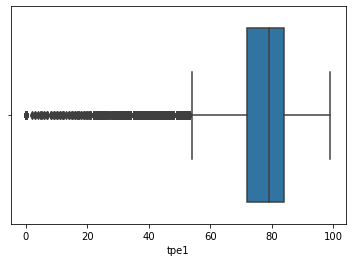

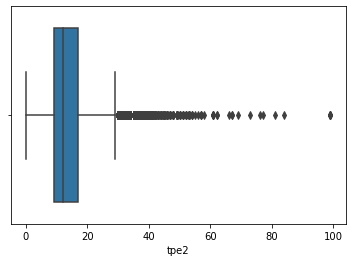

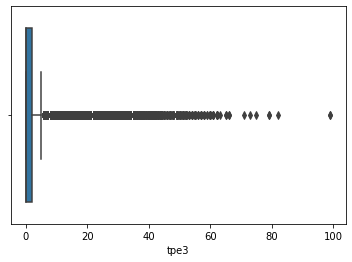

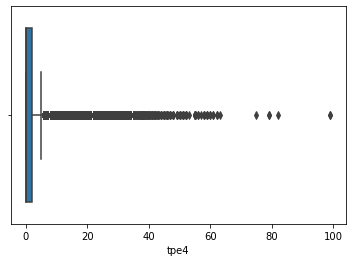

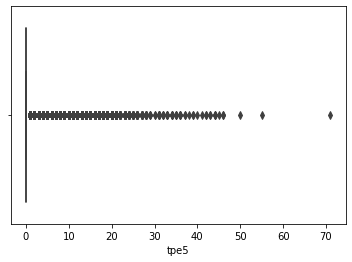

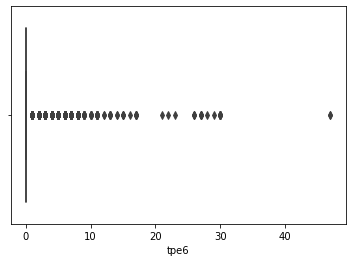

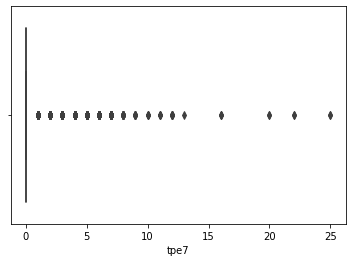

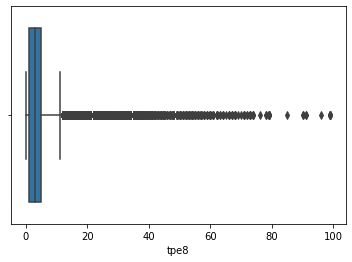

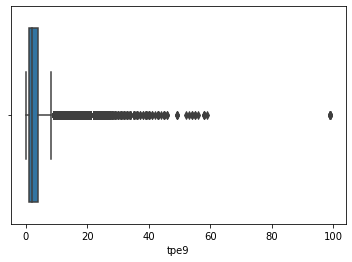

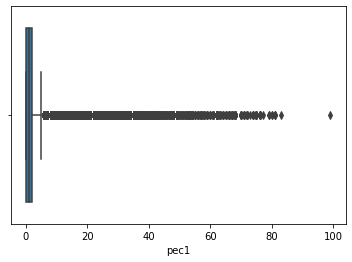

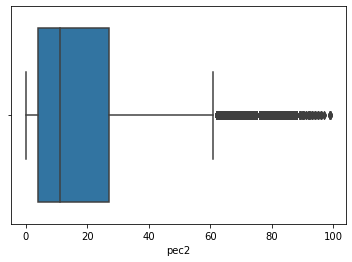

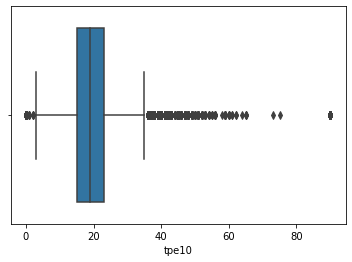

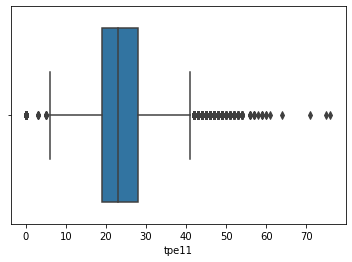

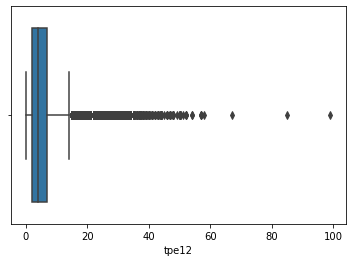

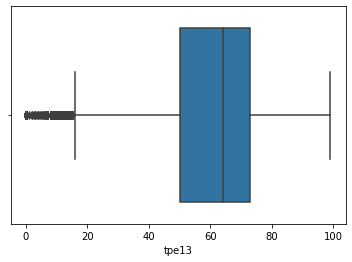

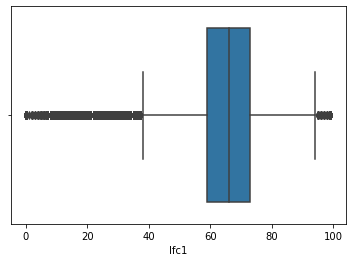

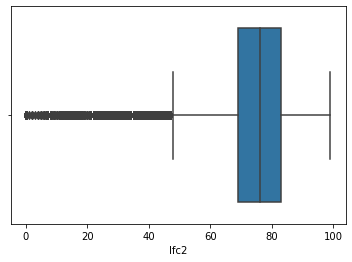

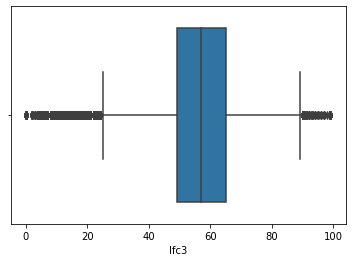

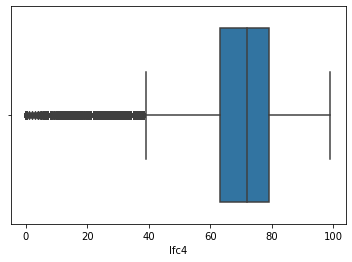

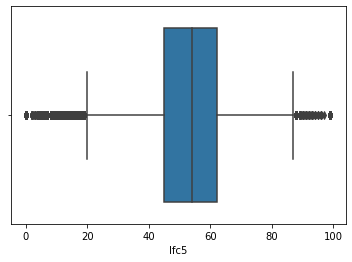

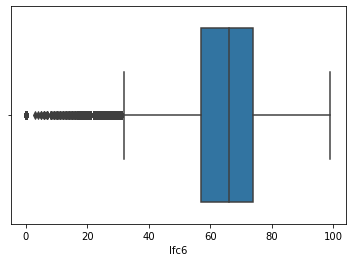

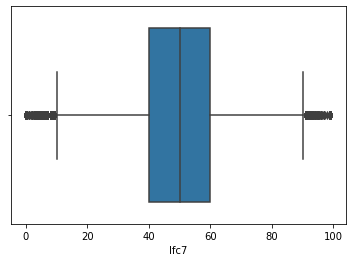

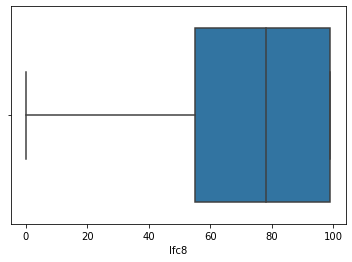

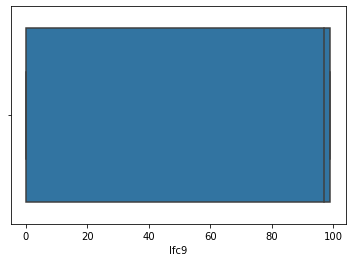

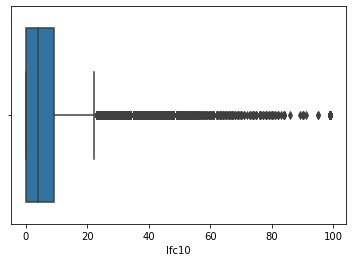

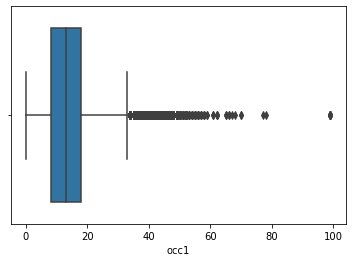

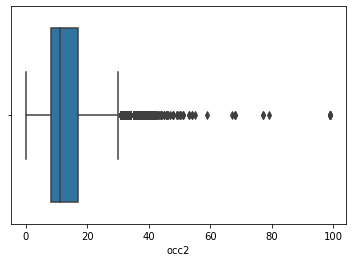

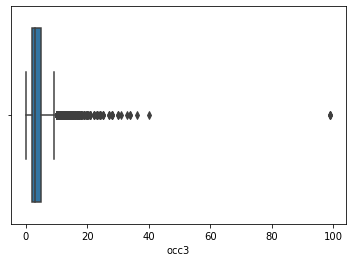

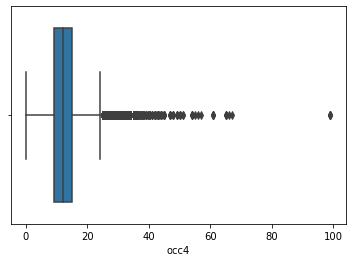

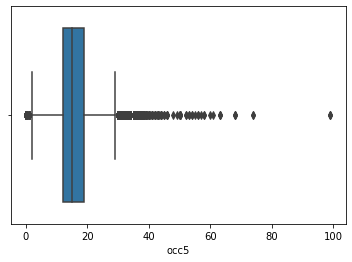

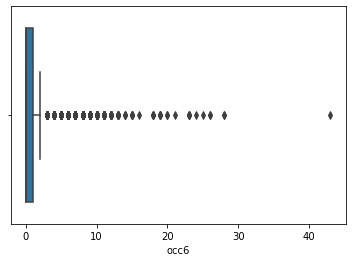

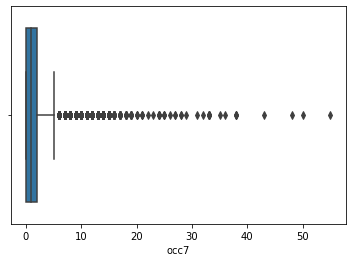

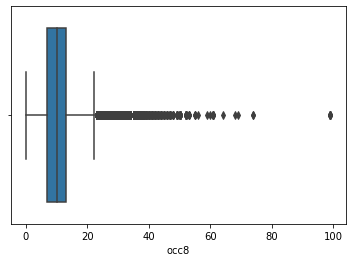

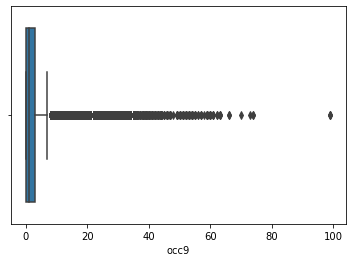

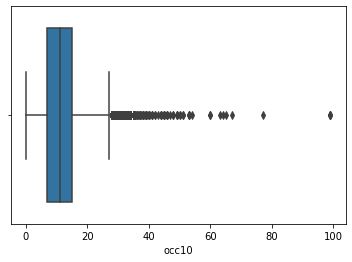

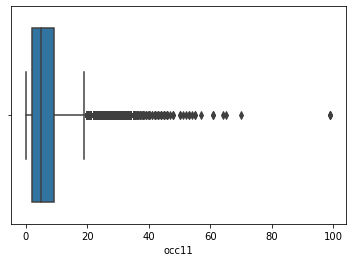

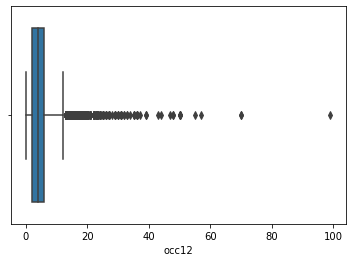

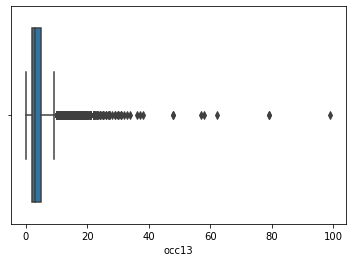

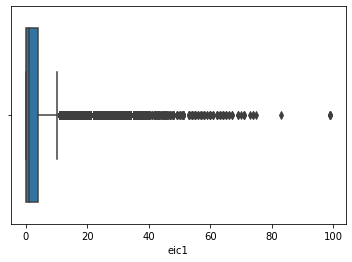

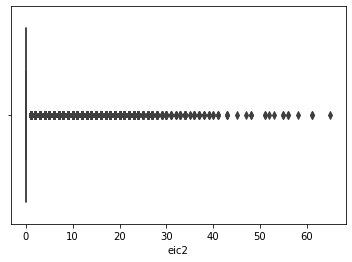

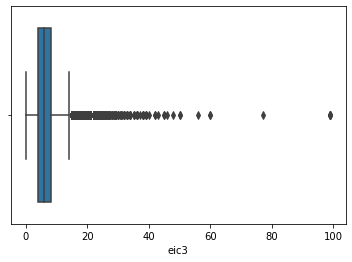

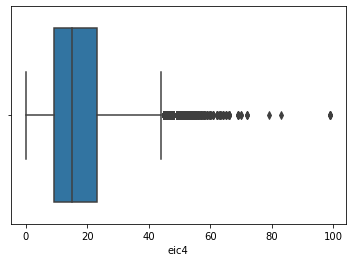

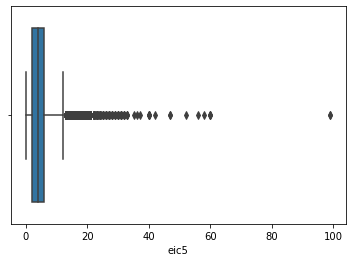

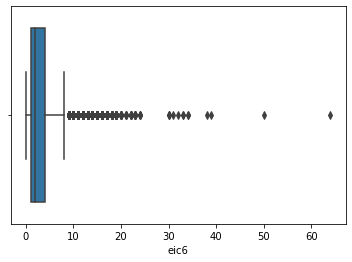

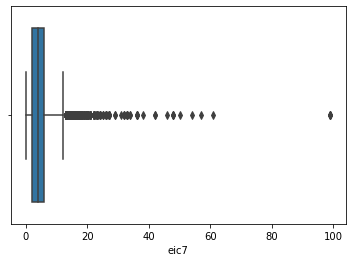

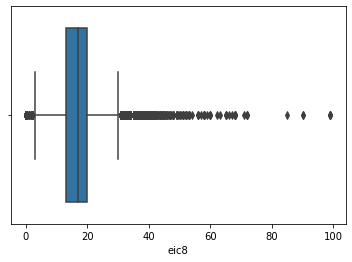

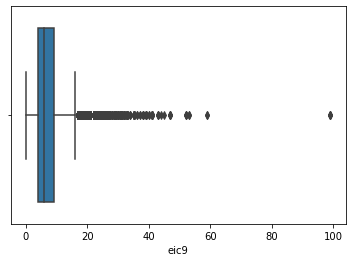

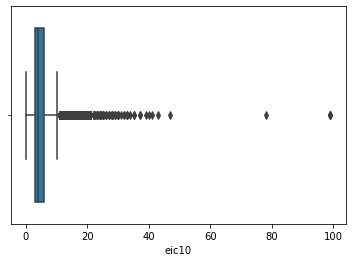

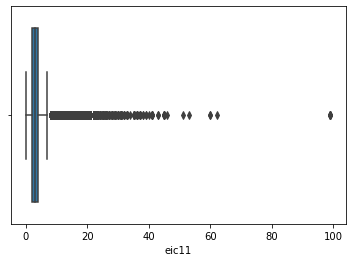

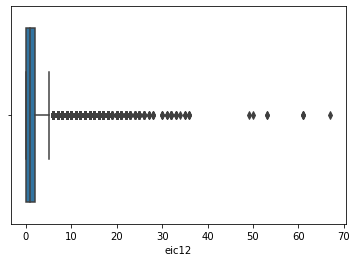

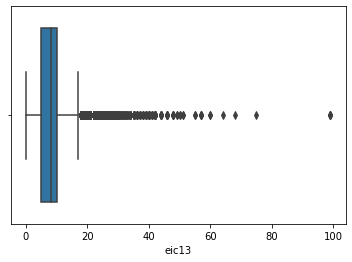

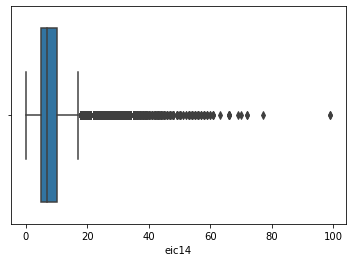

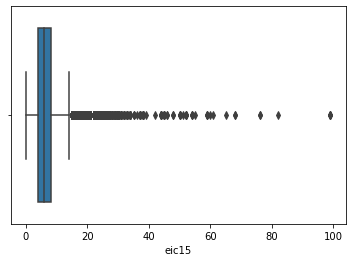

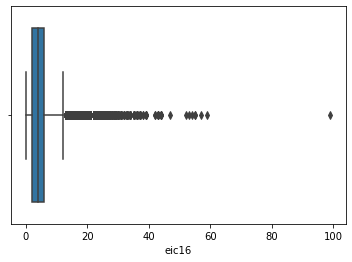

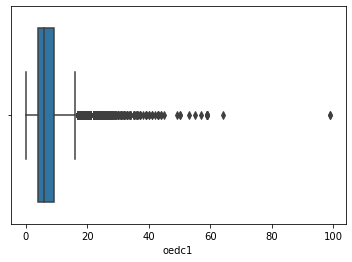

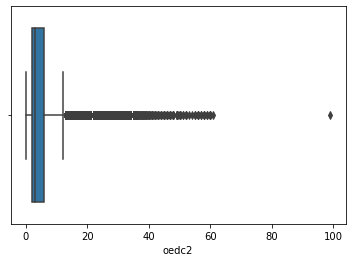

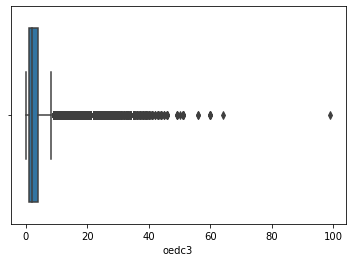

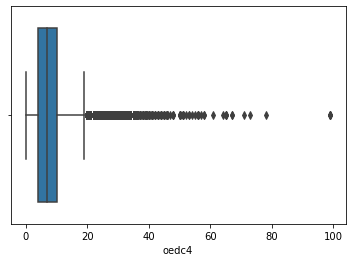

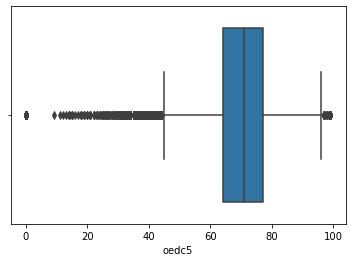

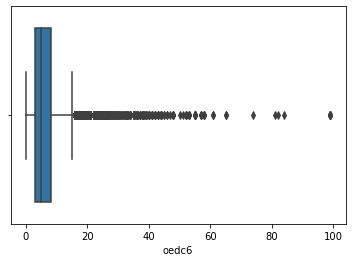

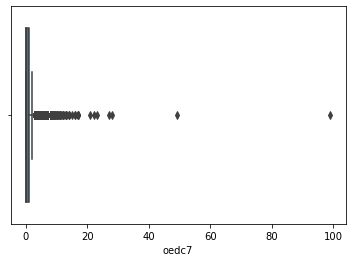

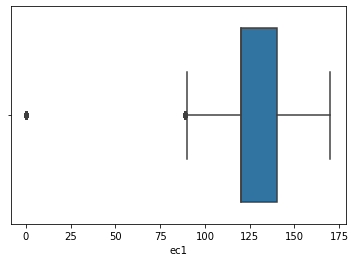

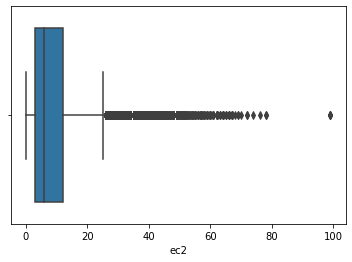

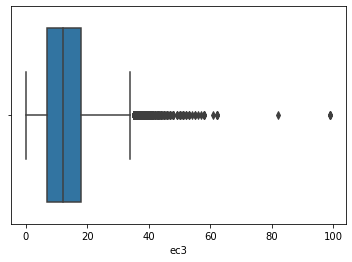

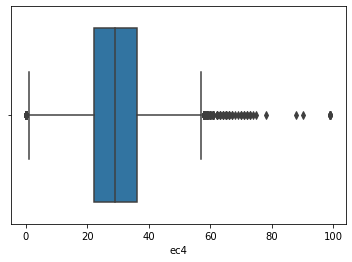

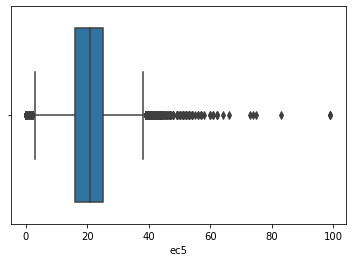

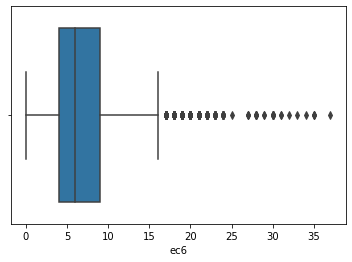

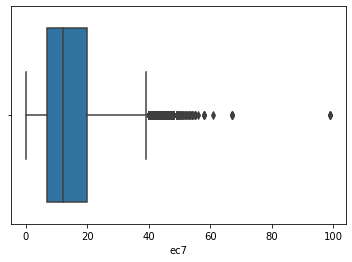

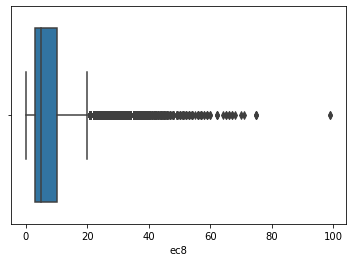

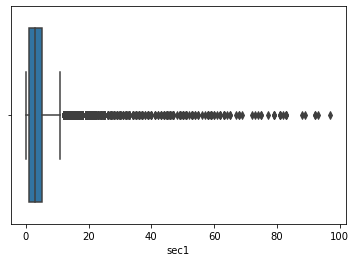

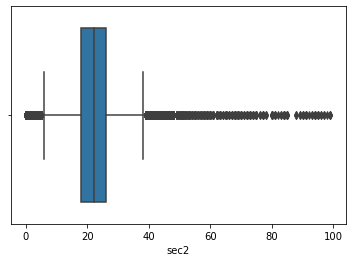

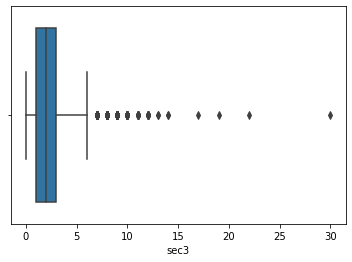

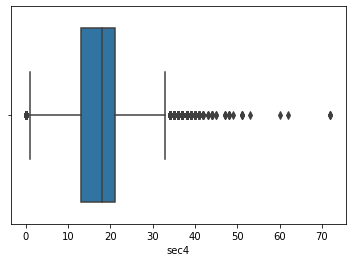

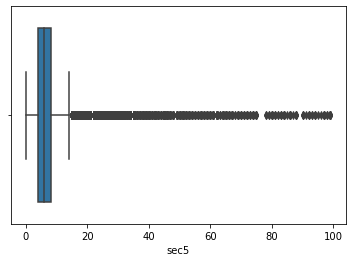

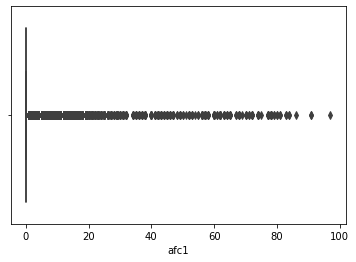

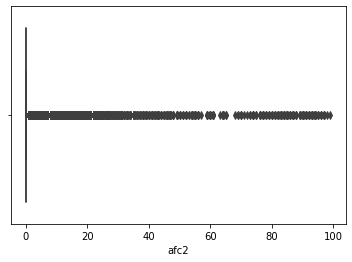

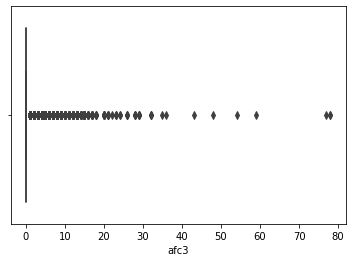

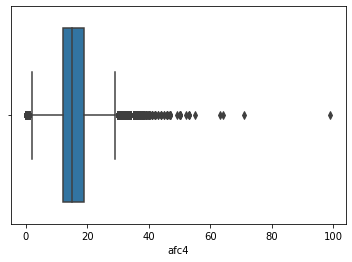

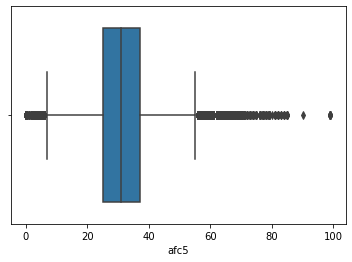

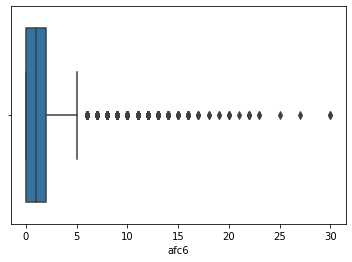

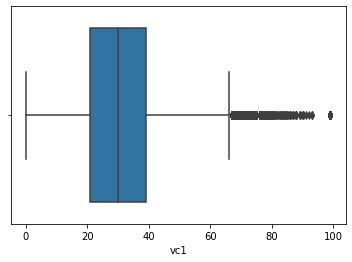

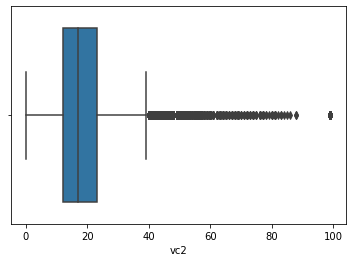

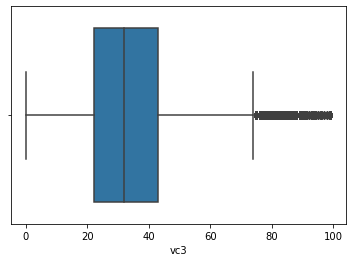

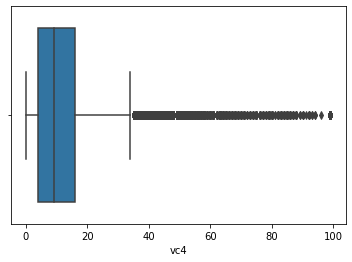

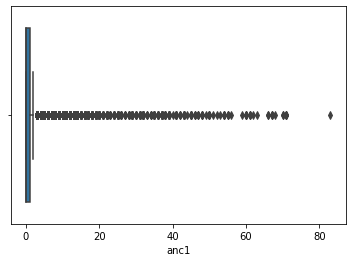

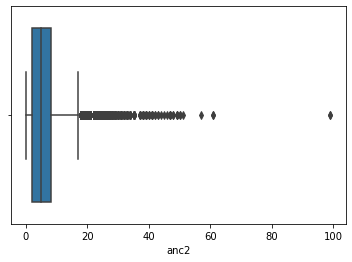

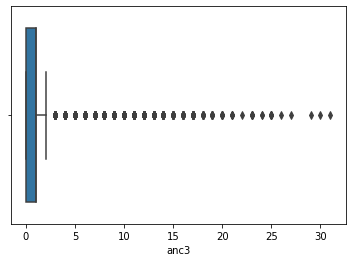

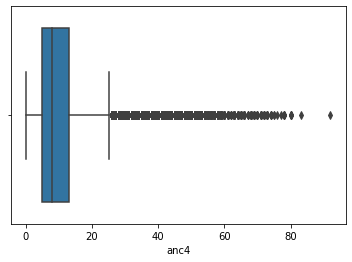

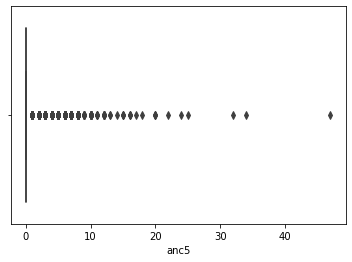

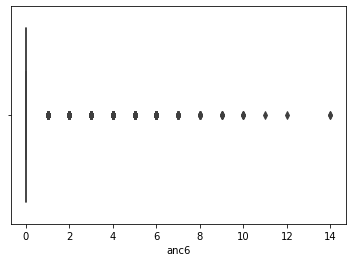

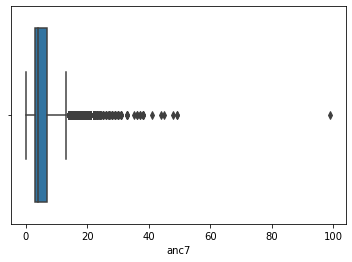

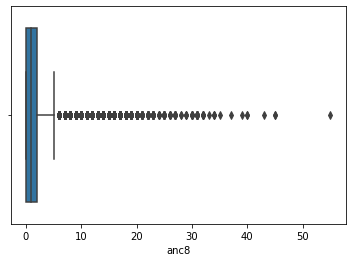

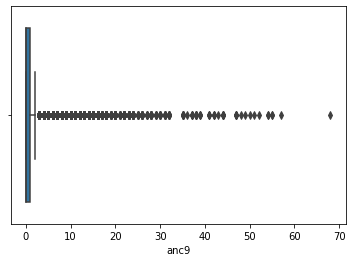

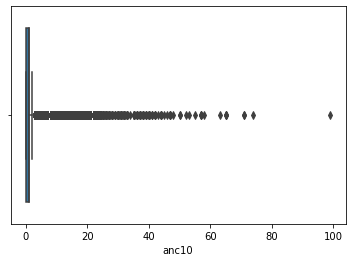

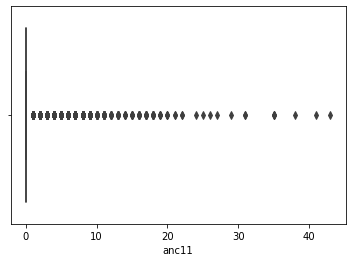

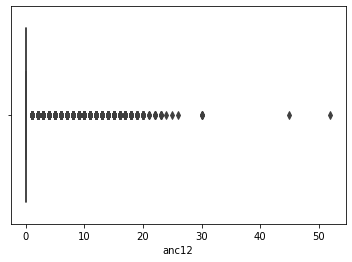

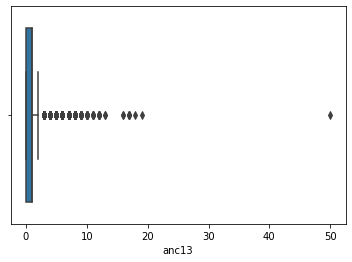

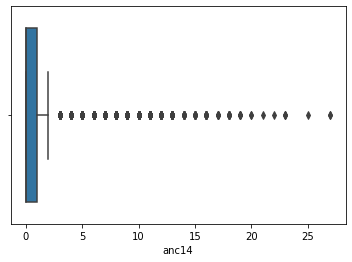

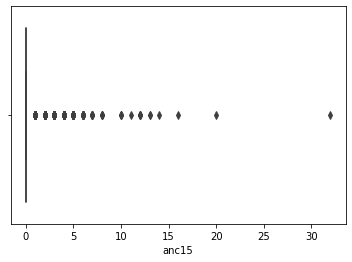

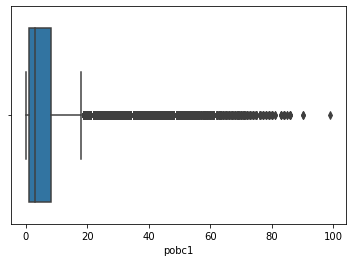

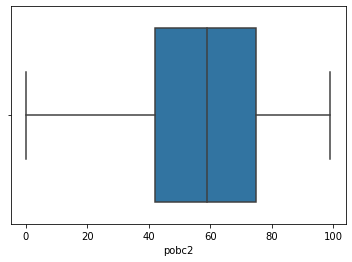

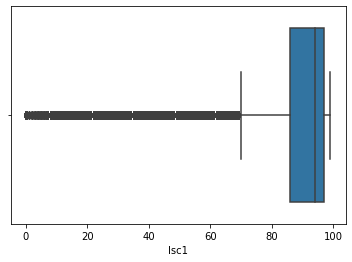

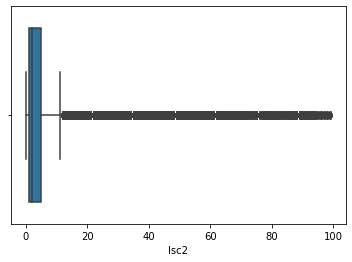

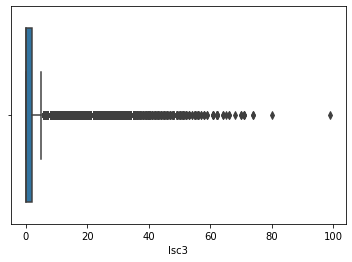

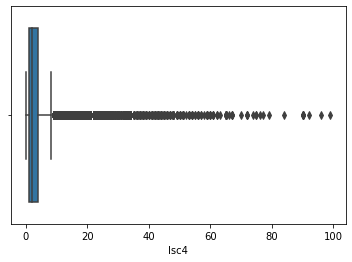

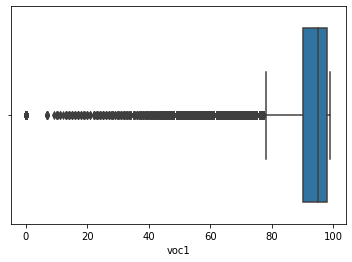

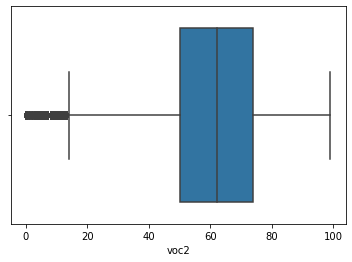

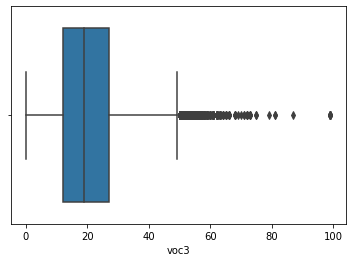

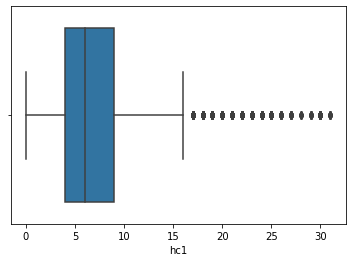

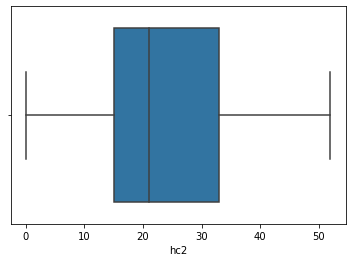

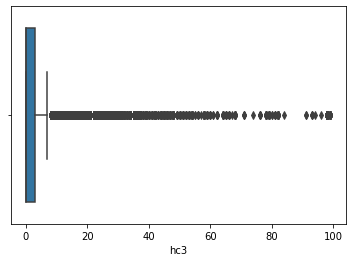

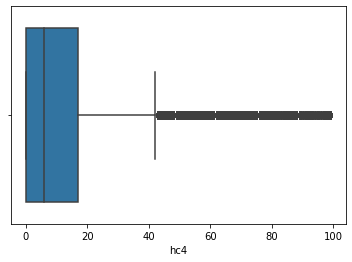

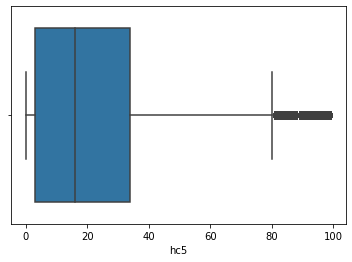

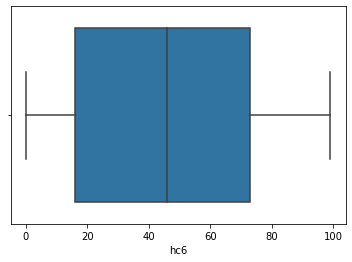

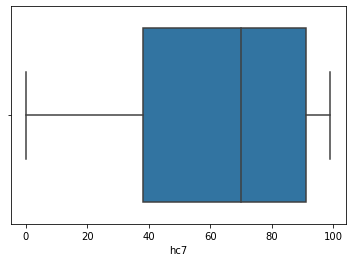

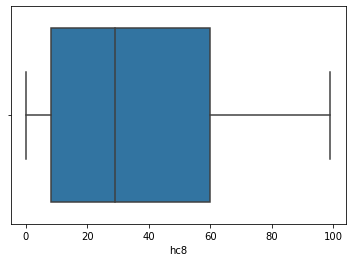

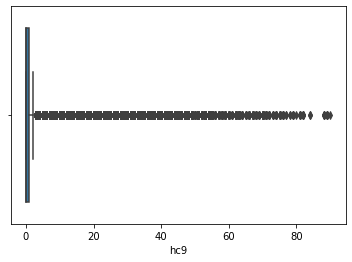

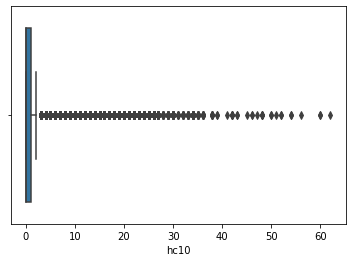

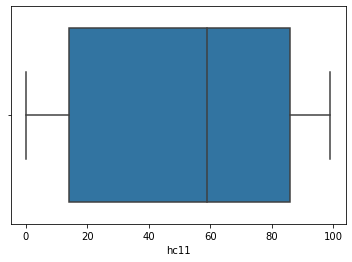

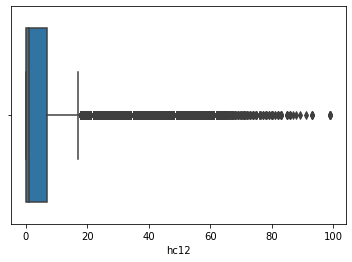

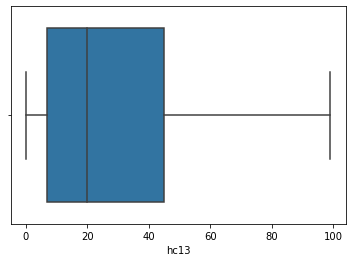

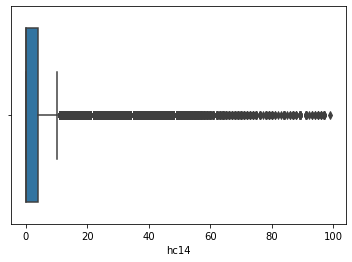

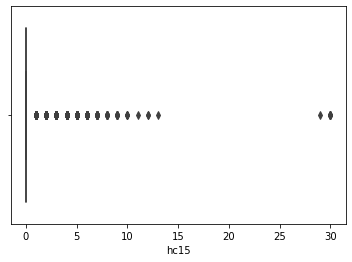

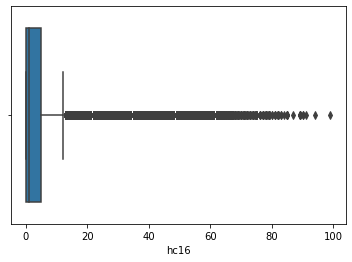

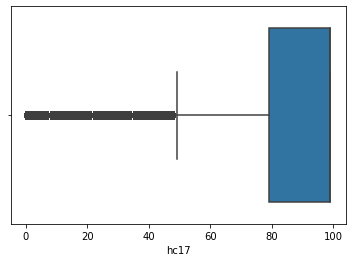

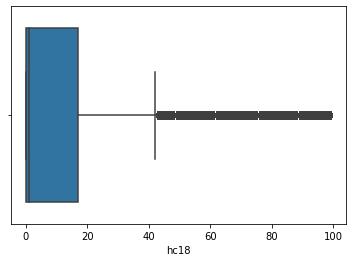

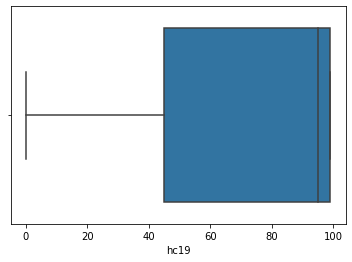

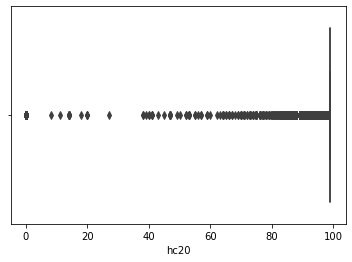

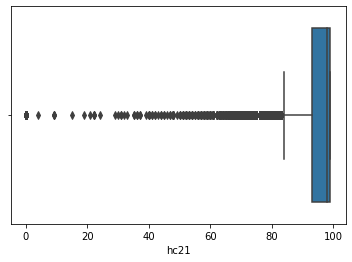

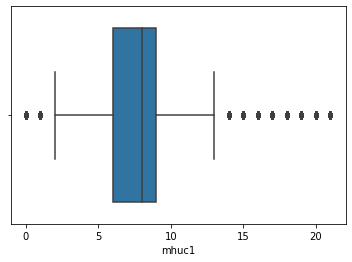

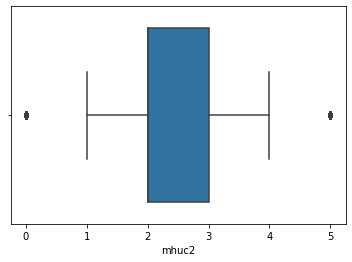

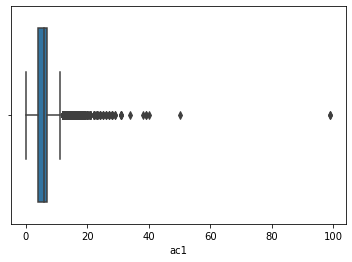

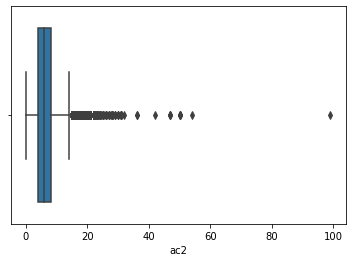

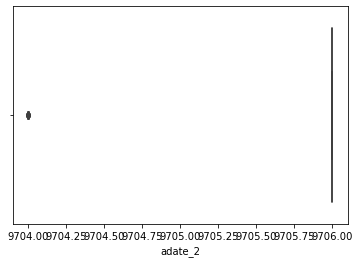

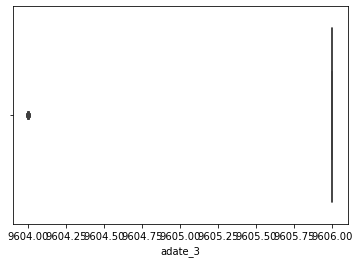

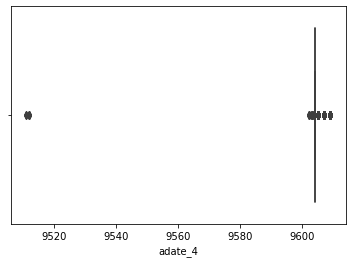

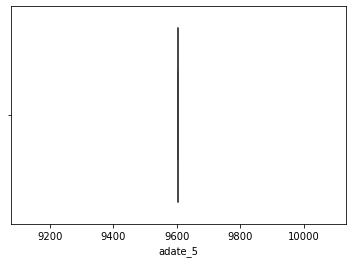

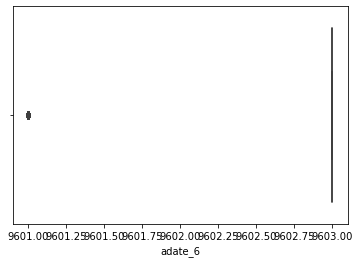

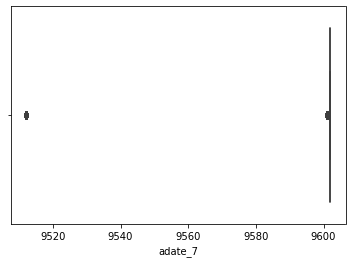

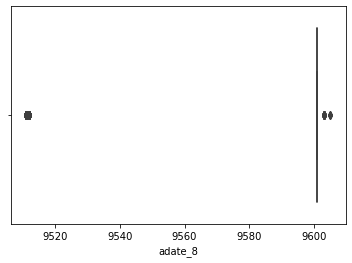

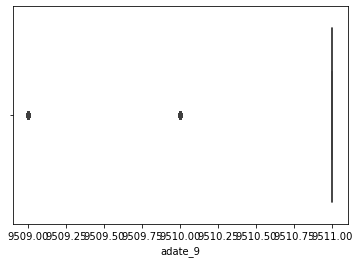

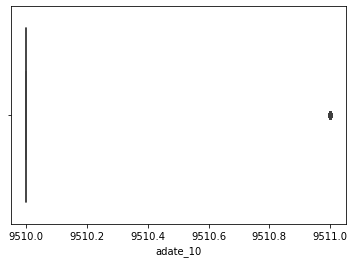

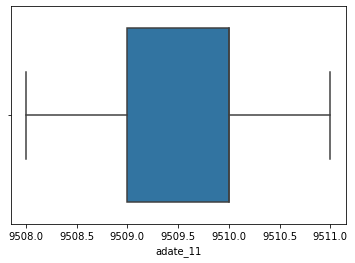

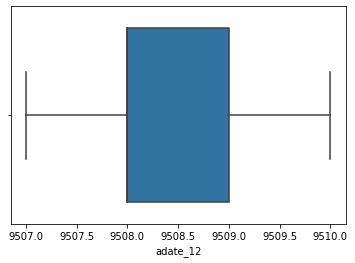

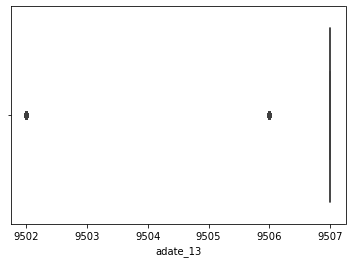

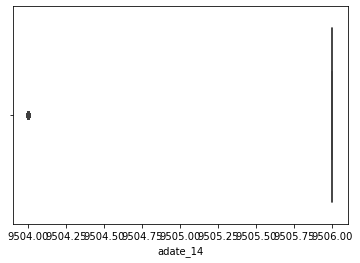

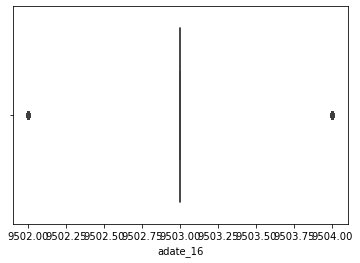

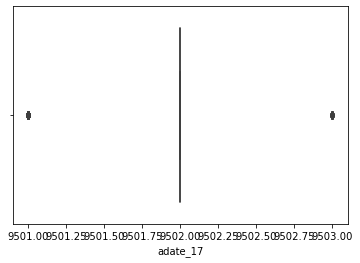

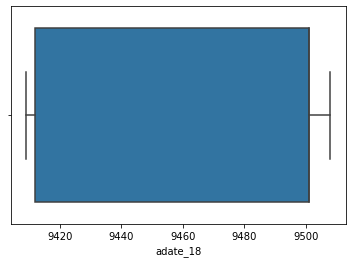

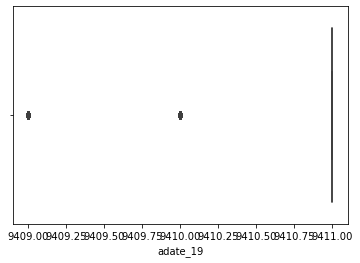

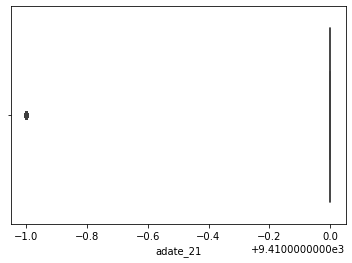

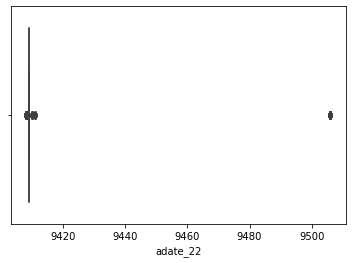

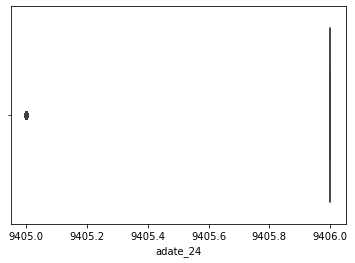

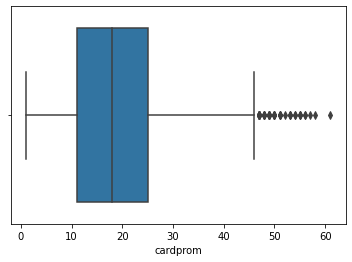

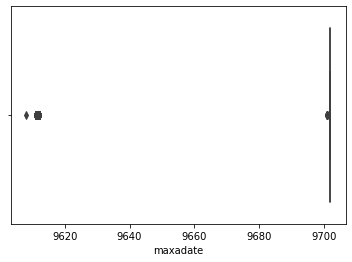

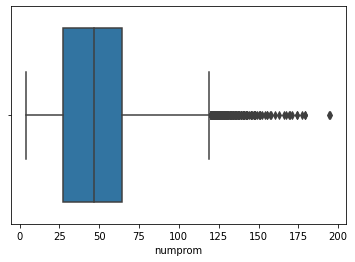

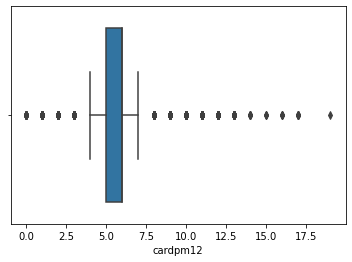

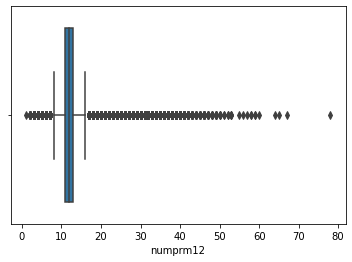

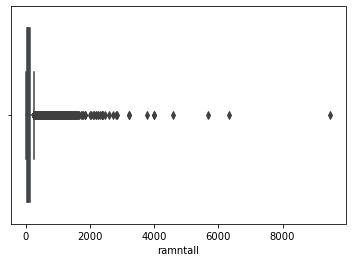

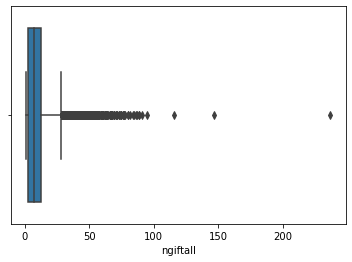

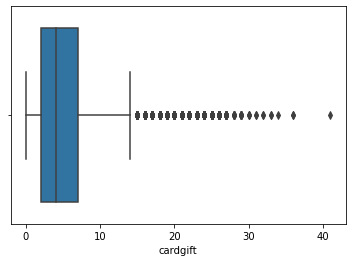

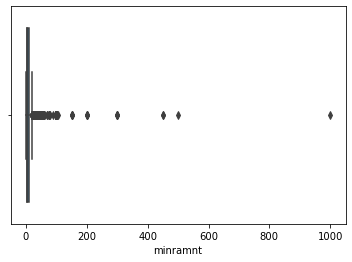

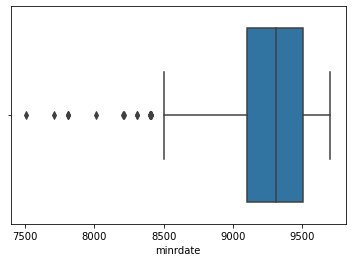

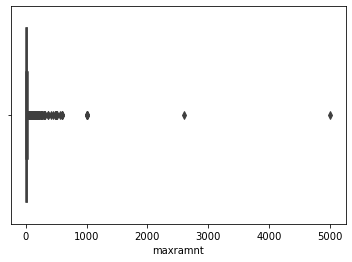

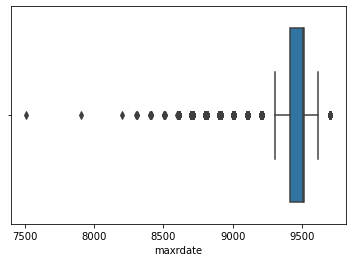

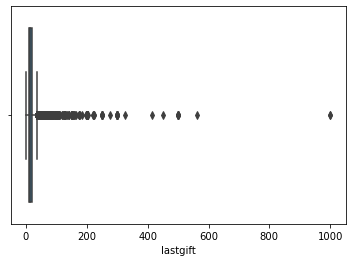

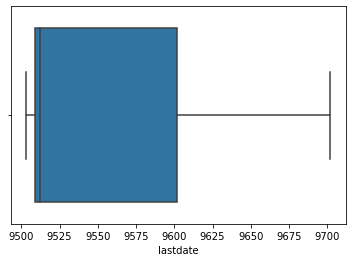

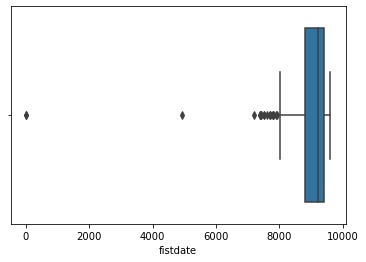

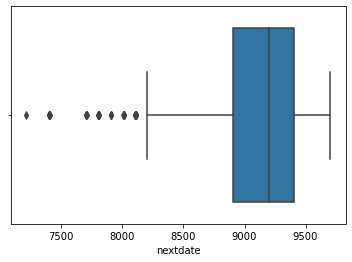

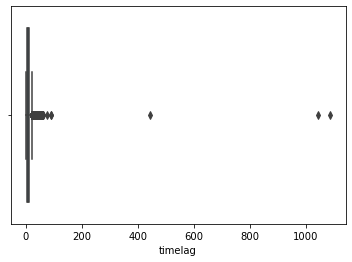

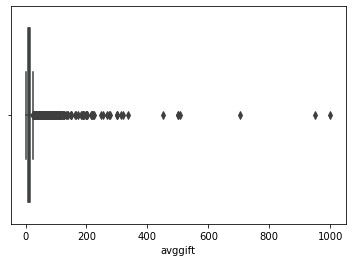

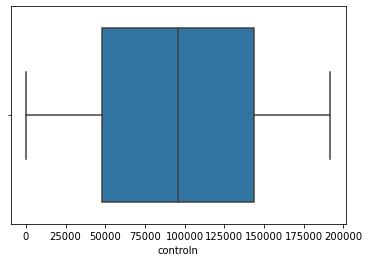

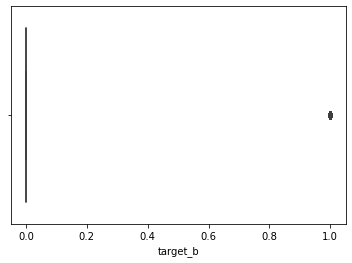

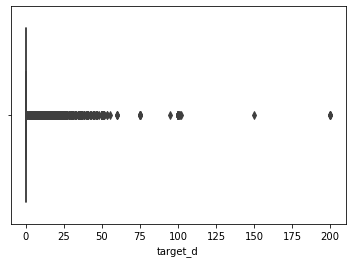

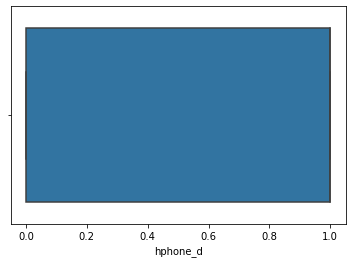

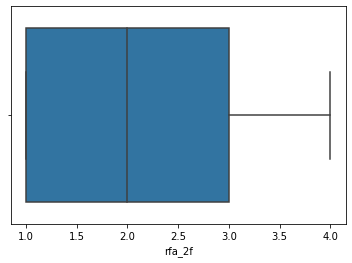

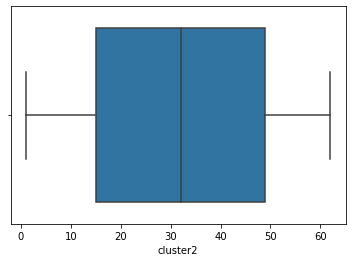

In [75]:
for col in numerical:
    sns.boxplot(data[col])
    plt.show()

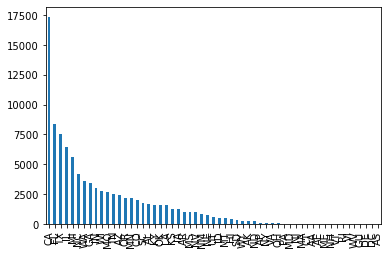

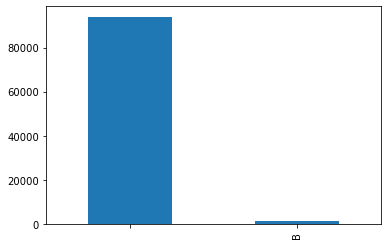

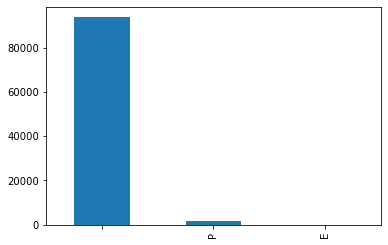

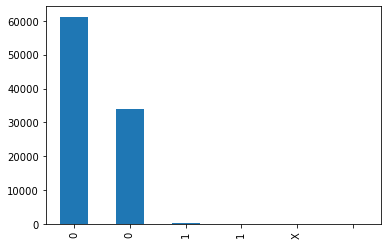

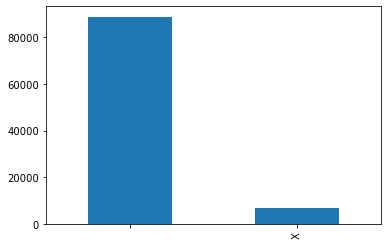

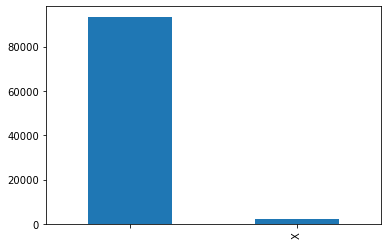

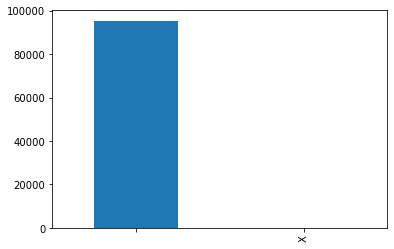

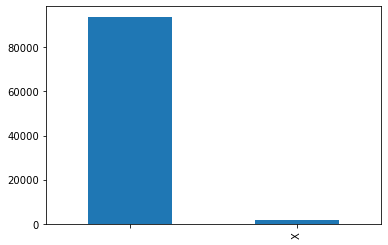

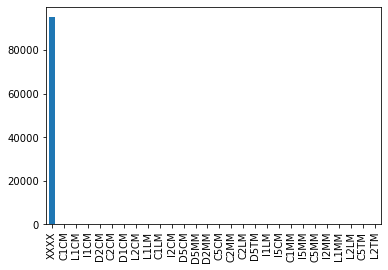

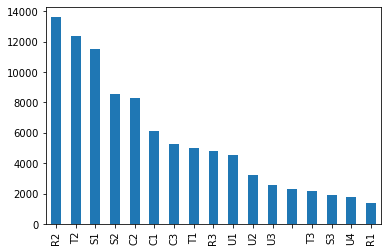

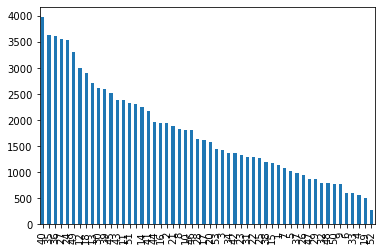

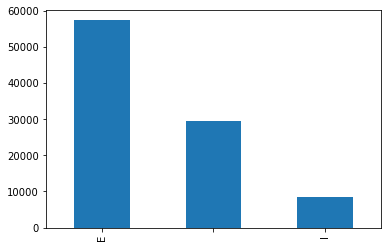

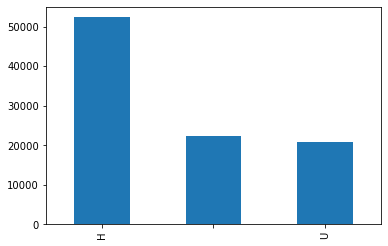

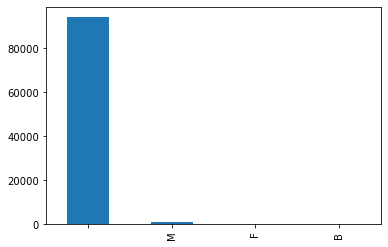

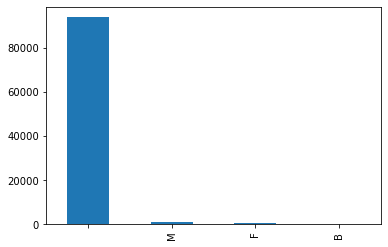

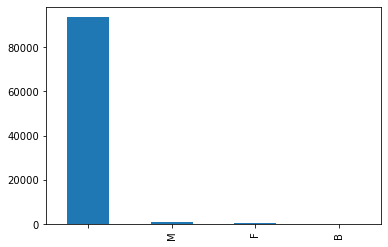

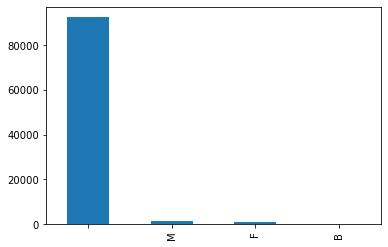

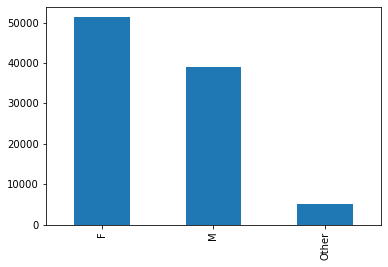

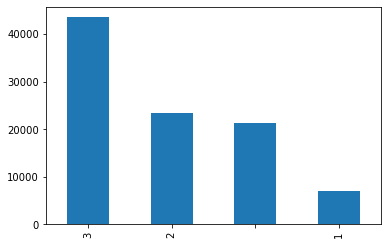

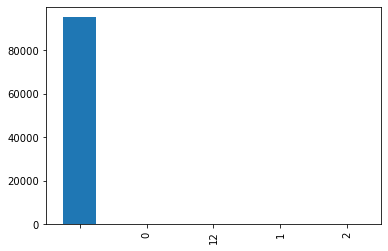

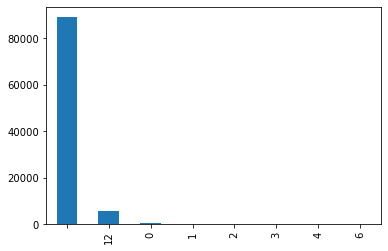

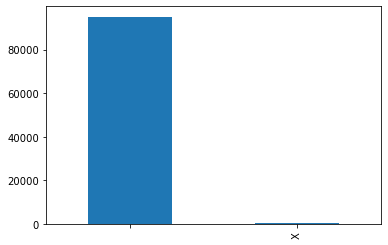

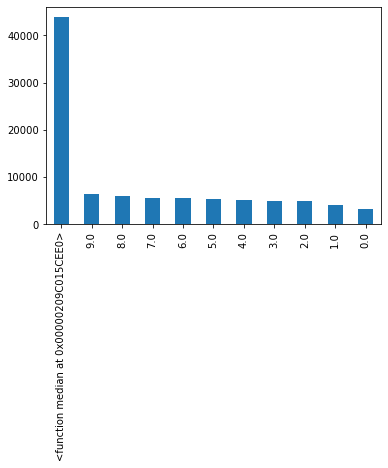

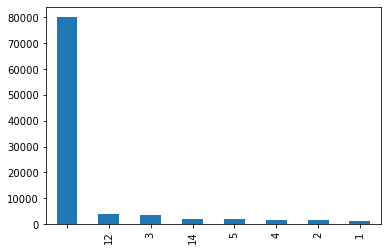

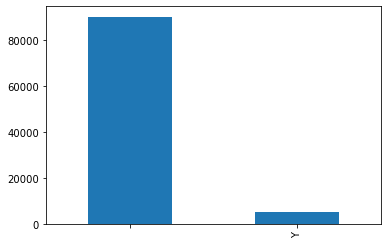

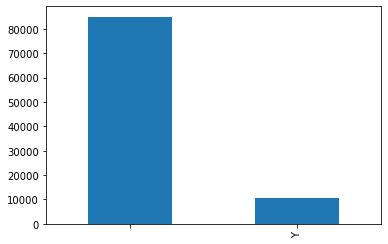

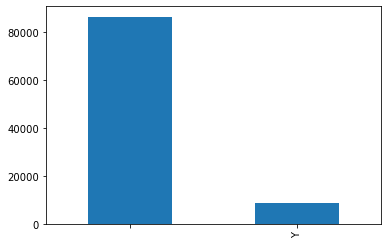

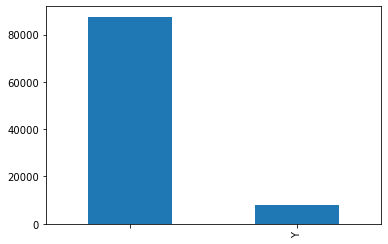

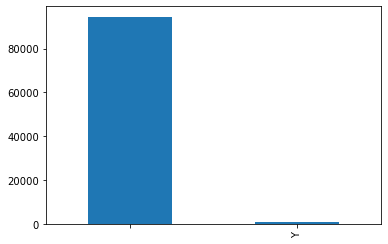

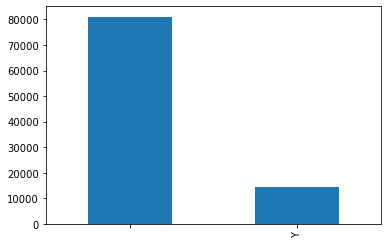

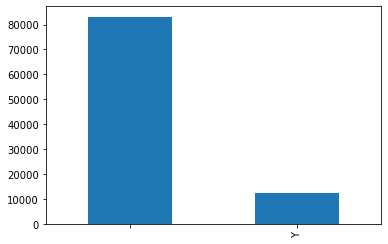

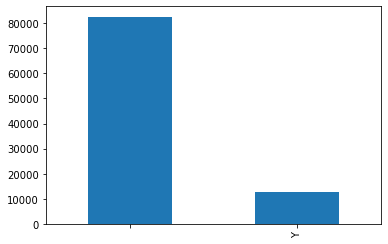

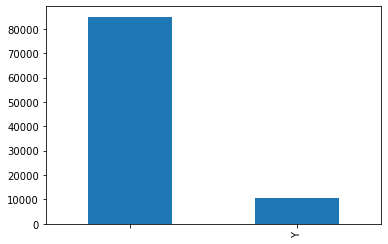

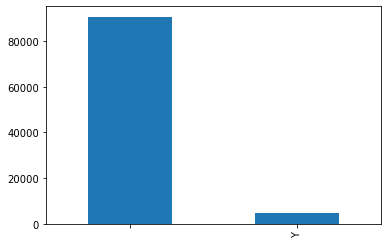

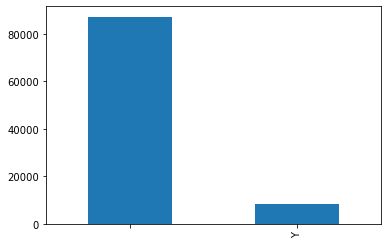

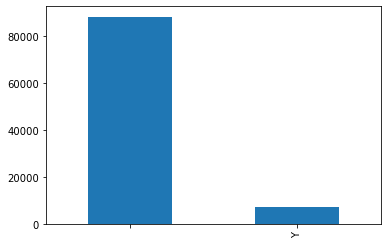

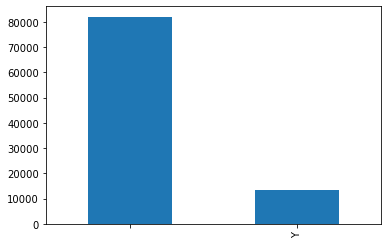

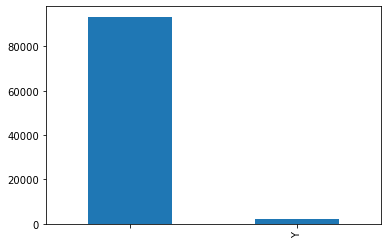

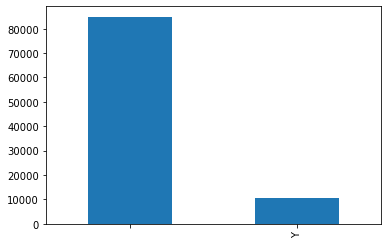

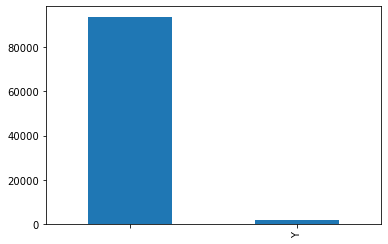

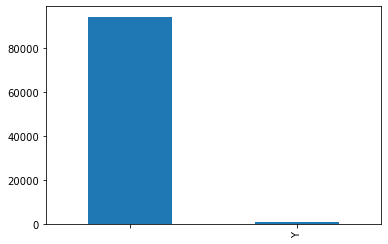

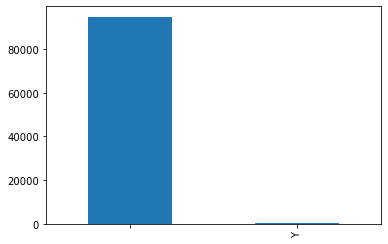

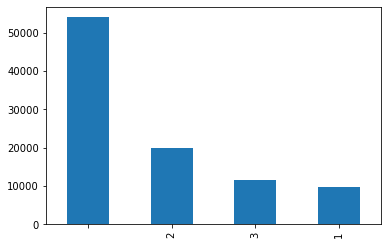

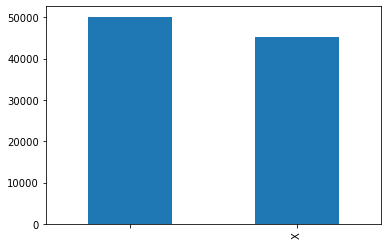

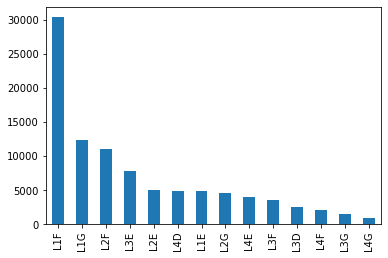

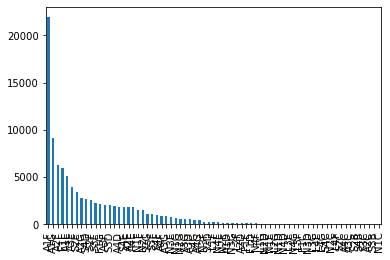

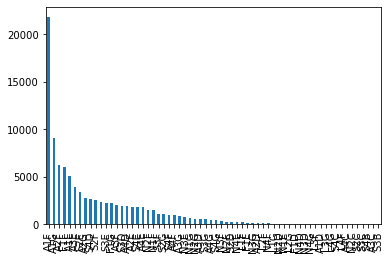

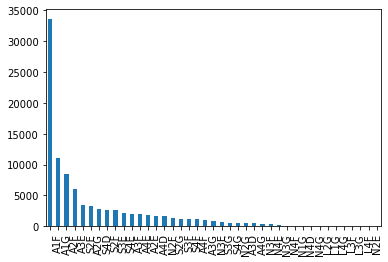

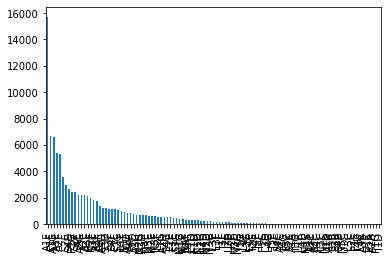

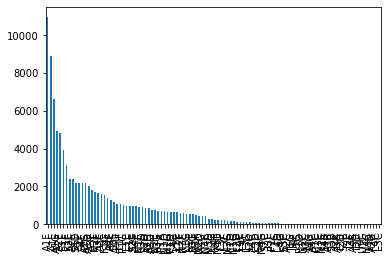

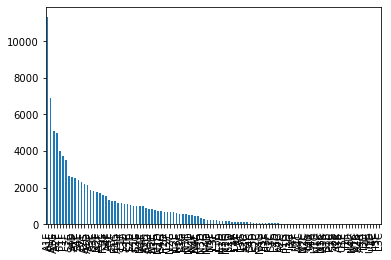

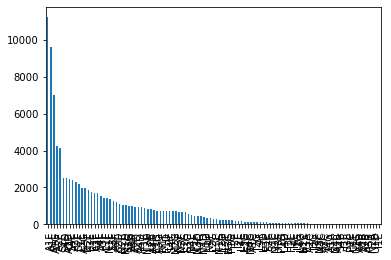

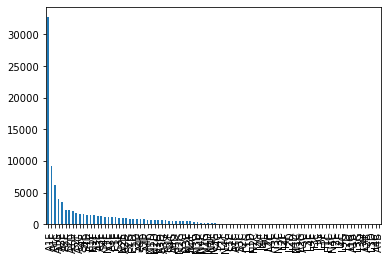

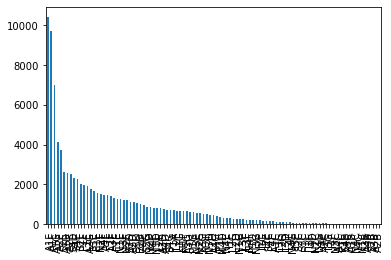

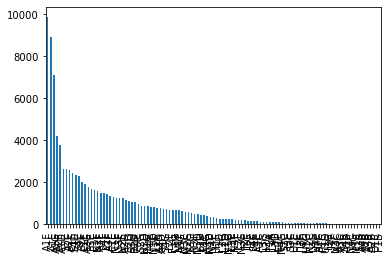

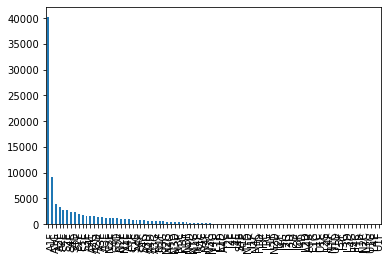

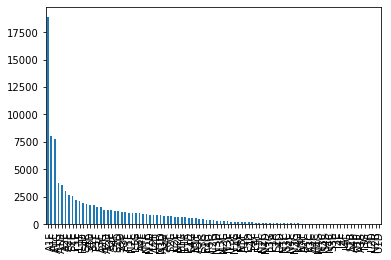

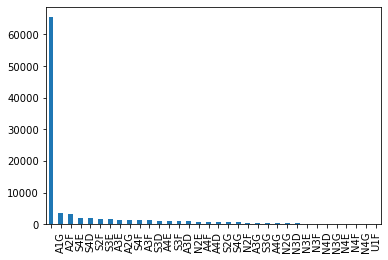

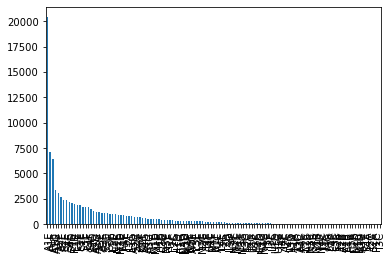

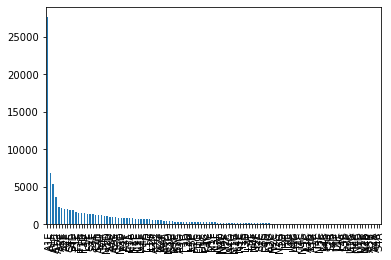

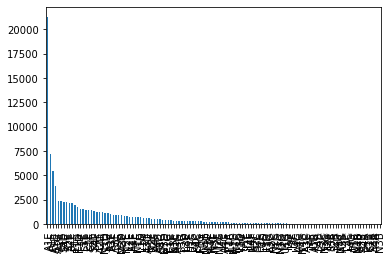

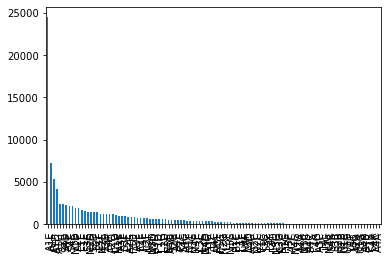

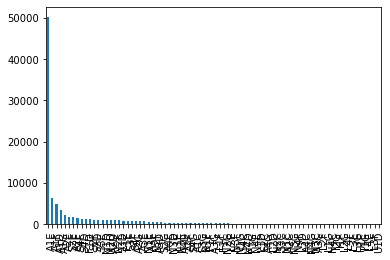

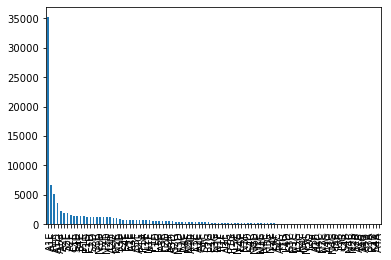

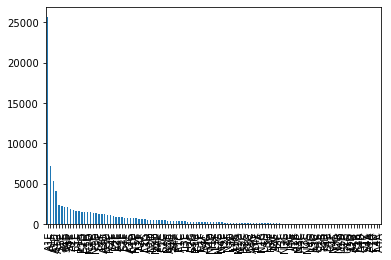

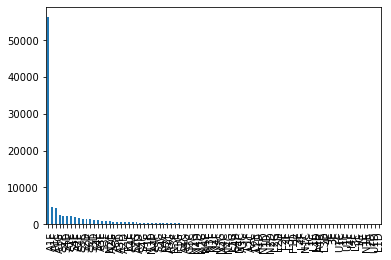

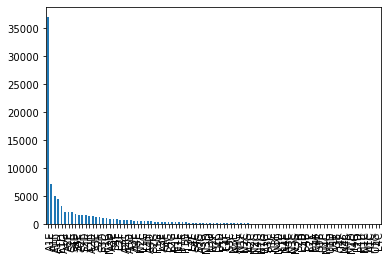

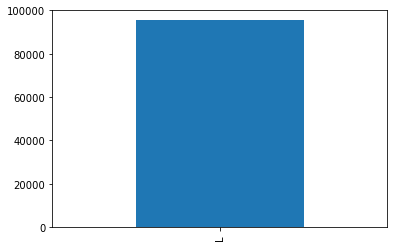

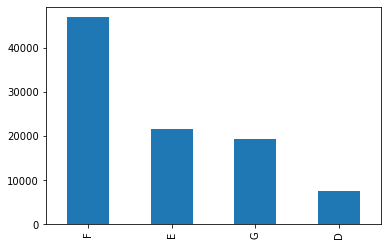

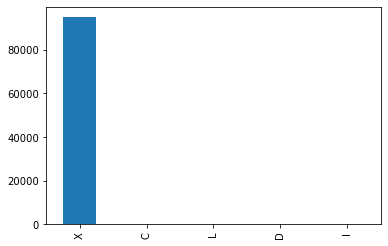

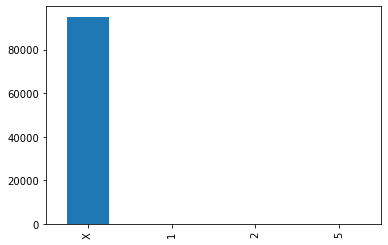

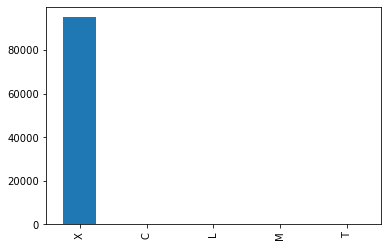

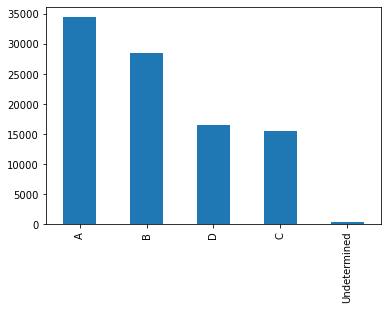

In [81]:
categorical = data.select_dtypes(object)
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()

What is clear after performing some data visualization of the DF´s features is that is it not possible to work with some many columns when doing this part of EDA (and EDA in general), because it takes some minutes to load and the oucome is not clearly visible. When having to deal with so many features, it becomes necessary to first reduce the number of columns by doing feature selection, or work with other more powerful tool(s) than a Jupyter Notebook.